<a href="https://colab.research.google.com/github/PrajsPrabs/UpgradBACaseStudy/blob/main/EComm1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [977]:
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Reading the Data

In [978]:
EleData = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/E-Commerce Capstone Dataset/ConsumerElectronics.csv")


# Data Understanding

In [979]:
EleData = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/E-Commerce Capstone Dataset/ConsumerElectronics.csv")

In [980]:
EleData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648824 entries, 0 to 1648823
Data columns (total 20 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   fsn_id                           1648824 non-null  object 
 1   order_date                       1648824 non-null  object 
 2   Year                             1648824 non-null  int64  
 3   Month                            1648824 non-null  int64  
 4   order_id                         1648824 non-null  float64
 5   order_item_id                    1648824 non-null  float64
 6   gmv                              1648824 non-null  object 
 7   units                            1648824 non-null  int64  
 8   deliverybdays                    1648824 non-null  object 
 9   deliverycdays                    1648824 non-null  object 
 10  s1_fact.order_payment_type       1648824 non-null  object 
 11  sla                              1648824 non-null 

In [981]:
## correct the datatypes
EleData['order_date']=pd.to_datetime(EleData['order_date'])
EleData['Year']=EleData['Year'].astype(str)
EleData['Month']=EleData['Month'].astype(str)

In [982]:
##  MMM is on subcategories : 'Camera','HomeAudio','GamingAccessory' hence dropping other rows
EleData.product_analytic_sub_category.value_counts()
EleData = EleData.loc[EleData.product_analytic_sub_category.isin(['Camera','HomeAudio','GamingAccessory'])]
EleData.product_analytic_sub_category.value_counts()


GamingAccessory    201899
HomeAudio          124860
Camera             101172
Name: product_analytic_sub_category, dtype: int64

In [983]:
## dates between July 2015 to June 2016
EleData=EleData.loc[(EleData.order_date >= '2015-07-01') &(EleData.order_date<'2016-07-01')]

In [984]:
EleData.describe()

order_id  order_item_id          units            sla  \
count  4.277750e+05   4.277750e+05  427775.000000  427775.000000   
mean   2.845230e+15   1.321295e+16       1.021941       5.469492   
std    1.268358e+15   5.458201e+16       0.222356       2.658440   
min    1.528676e+08   2.072001e+08       1.000000       0.000000   
25%    1.600075e+15   1.603993e+15       1.000000       4.000000   
50%    2.611817e+15   2.618906e+15       1.000000       5.000000   
75%    3.610341e+15   4.397844e+15       1.000000       7.000000   
max    4.641665e+15   3.000373e+17      19.000000      60.000000   

         product_mrp  product_procurement_sla  
count  427775.000000            427775.000000  
mean     8297.878123                 2.578220  
std     13781.504587                 1.960068  
min         0.000000                -1.000000  
25%       900.000000                 1.000000  
50%      2000.000000                 2.000000  
75%      6900.000000                 3.000000  
max    280000.000000                15.000000

In [985]:
## removing duplicate order items records
EleData= EleData.drop_duplicates(subset=["order_id","order_item_id"],keep='first')

In [986]:
# EleData.info()
Ele_obj_columns=[]
for i in EleData.columns:
  if EleData[i].dtype=='object':
    Ele_obj_columns.append(i)

In [987]:
## removing duplicates using strip and lower and keep first instance
Ele_obj_columns
EleData[Ele_obj_columns]=EleData[Ele_obj_columns].apply(lambda x : x.astype(str).str.strip())
EleData[Ele_obj_columns]=EleData[Ele_obj_columns].apply(lambda x : x.astype(str).str.lower())
EleData= EleData.drop_duplicates(keep='first')
EleData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396689 entries, 1598 to 1542378
Data columns (total 20 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   fsn_id                           396689 non-null  object        
 1   order_date                       396689 non-null  datetime64[ns]
 2   Year                             396689 non-null  object        
 3   Month                            396689 non-null  object        
 4   order_id                         396689 non-null  float64       
 5   order_item_id                    396689 non-null  float64       
 6   gmv                              396689 non-null  object        
 7   units                            396689 non-null  int64         
 8   deliverybdays                    396689 non-null  object        
 9   deliverycdays                    396689 non-null  object        
 10  s1_fact.order_payment_type       396689 

In [988]:
EleData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396689 entries, 1598 to 1542378
Data columns (total 20 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   fsn_id                           396689 non-null  object        
 1   order_date                       396689 non-null  datetime64[ns]
 2   Year                             396689 non-null  object        
 3   Month                            396689 non-null  object        
 4   order_id                         396689 non-null  float64       
 5   order_item_id                    396689 non-null  float64       
 6   gmv                              396689 non-null  object        
 7   units                            396689 non-null  int64         
 8   deliverybdays                    396689 non-null  object        
 9   deliverycdays                    396689 non-null  object        
 10  s1_fact.order_payment_type       396689 

# Data Cleaning

In [989]:
EleData.columns

Index(['fsn_id', 'order_date', 'Year', 'Month', 'order_id', 'order_item_id',
       'gmv', 'units', 'deliverybdays', 'deliverycdays',
       's1_fact.order_payment_type', 'sla', 'cust_id', 'pincode',
       'product_analytic_super_category', 'product_analytic_category',
       'product_analytic_sub_category', 'product_analytic_vertical',
       'product_mrp', 'product_procurement_sla'],
      dtype='object')

In [990]:
## Year and Month

print(EleData.Year.value_counts())
print(EleData.Month.value_counts())

2016    217241
2015    179448
Name: Year, dtype: int64
10    52752
12    43314
1     41236
2     39987
3     38840
5     37301
11    35110
4     31092
6     28785
9     25571
7     22667
8        34
Name: Month, dtype: int64


In [991]:
## gmv
# EleData.gmv.isna().sum()
# print(EleData.loc[EleData.gmv==''].count())
# # # trying to impute using mrp

EleData=EleData[(EleData.gmv!='')]
EleData.gmv=EleData.gmv.astype(float)

In [992]:
# deliverybdays
EleData[EleData.deliverybdays=='\\N']
EleData.deliverybdays.replace('\\N','NA',inplace=True)
EleData.info()
EleData[EleData.deliverycdays=='\\N']
EleData.deliverycdays.replace('\\N','NA',inplace=True)
EleData.deliverybdays.value_counts()[0]/EleData.shape[0]
# --78% values are NA so dropping this column
EleData.deliverycdays.value_counts()[0]/EleData.shape[0]
# --78% values are NA so dropping this column
EleData.drop(["deliverybdays","deliverycdays"],1,inplace=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 395657 entries, 1598 to 1542378
Data columns (total 20 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   fsn_id                           395657 non-null  object        
 1   order_date                       395657 non-null  datetime64[ns]
 2   Year                             395657 non-null  object        
 3   Month                            395657 non-null  object        
 4   order_id                         395657 non-null  float64       
 5   order_item_id                    395657 non-null  float64       
 6   gmv                              395657 non-null  float64       
 7   units                            395657 non-null  int64         
 8   deliverybdays                    395657 non-null  object        
 9   deliverycdays                    395657 non-null  object        
 10  s1_fact.order_payment_type       395657 

In [993]:
# order_paymeny_type
EleData["s1_fact.order_payment_type"].value_counts()
EleData.rename(columns={"s1_fact.order_payment_type":"order_payment_type"},inplace=True)
EleData.order_payment_type.value_counts()

cod        279237
prepaid    116420
Name: order_payment_type, dtype: int64

In [994]:
# sla
EleData.sla=EleData.sla.astype(int)
EleData[EleData.sla==0].shape[0]/EleData.shape[0]
## impute with median
EleData[EleData.sla==0]['sla'] = EleData.sla.median()


In [995]:
EleData.pincode.value_counts()
## Too many groups , plus format isnt correct so drooping it
EleData.drop(["pincode"],1,inplace=True)

In [996]:
## product analytics category , sub category and vertical

print(EleData.product_analytic_category.value_counts())
print(EleData.product_analytic_sub_category.value_counts())
print(EleData.product_analytic_vertical.value_counts())
##droppning supercategory as its having only 1 value
EleData.drop(['product_analytic_super_category'],1,inplace=True)

gaminghardware        185057
entertainmentsmall    114716
camera                 95884
Name: product_analytic_category, dtype: int64
gamingaccessory    185057
homeaudio          114716
camera              95884
Name: product_analytic_sub_category, dtype: int64
homeaudiospeaker         79638
gamingheadset            59564
dslr                     54956
gamepad                  52821
point & shoot            35422
gamingmouse              34741
fmradio                  25315
gamingaccessorykit        7613
tvoutcableaccessory       6644
gamingkeyboard            6226
gamingmemorycard          5939
gamingmousepad            4173
voicerecorder             3402
gamingadapter             3037
joystickgamingwheel       2672
boombox                   2456
instant cameras           2415
sportsandaction           2171
dock                      1889
hifisystem                1400
motioncontroller          1039
camcorders                 920
gamingspeaker              496
dockingstation            

In [997]:
## vertical grouping
print(EleData[['product_analytic_sub_category','product_analytic_vertical']].value_counts().reset_index().sort_values(by=['product_analytic_sub_category',0]))
vertical1=(EleData.product_analytic_vertical.value_counts()<20000)[EleData.product_analytic_vertical.value_counts()<20000].index
EleData.product_analytic_vertical.value_counts()<20000

   product_analytic_sub_category product_analytic_vertical      0
21                        camera                camcorders    920
17                        camera           sportsandaction   2171
16                        camera           instant cameras   2415
4                         camera             point & shoot  35422
2                         camera                      dslr  54956
31               gamingaccessory          gamecontrolmount      1
29               gamingaccessory                 gaminggun      3
27               gamingaccessory     gamingchargingstation     43
26               gamingaccessory                coolingpad     45
22               gamingaccessory             gamingspeaker    496
20               gamingaccessory          motioncontroller   1039
14               gamingaccessory       joystickgamingwheel   2672
13               gamingaccessory             gamingadapter   3037
11               gamingaccessory            gamingmousepad   4173
10        

homeaudiospeaker         False
gamingheadset            False
dslr                     False
gamepad                  False
point & shoot            False
gamingmouse              False
fmradio                  False
gamingaccessorykit        True
tvoutcableaccessory       True
gamingkeyboard            True
gamingmemorycard          True
gamingmousepad            True
voicerecorder             True
gamingadapter             True
joystickgamingwheel       True
boombox                   True
instant cameras           True
sportsandaction           True
dock                      True
hifisystem                True
motioncontroller          True
camcorders                True
gamingspeaker             True
dockingstation            True
djcontroller              True
soundmixer                True
coolingpad                True
gamingchargingstation     True
slingbox                  True
gaminggun                 True
karaokeplayer             True
gamecontrolmount          True
Name: pr

In [998]:
EleData["product_analytic_vertical_derived"]=EleData.product_analytic_vertical.replace(vertical1,"Others")

In [999]:
## product MRP
EleData.product_mrp.astype(float)


1598        3999.0
1599        3999.0
1600        3999.0
1601        3999.0
1602        3999.0
            ...   
1542374    10500.0
1542375    10500.0
1542376    10500.0
1542377    10500.0
1542378    10500.0
Name: product_mrp, Length: 395657, dtype: float64

# Data Analysis and feature extraction

In [1000]:
EleData.Year=EleData.Year.astype(object)
EleData.Month=EleData.Month.astype(object)
EleData.columns


Index(['fsn_id', 'order_date', 'Year', 'Month', 'order_id', 'order_item_id',
       'gmv', 'units', 'order_payment_type', 'sla', 'cust_id',
       'product_analytic_category', 'product_analytic_sub_category',
       'product_analytic_vertical', 'product_mrp', 'product_procurement_sla',
       'product_analytic_vertical_derived'],
      dtype='object')

In [1001]:
## Deleting columns which wont be required
EleData2=EleData.drop(['fsn_id','cust_id','product_analytic_vertical','order_id'],1)


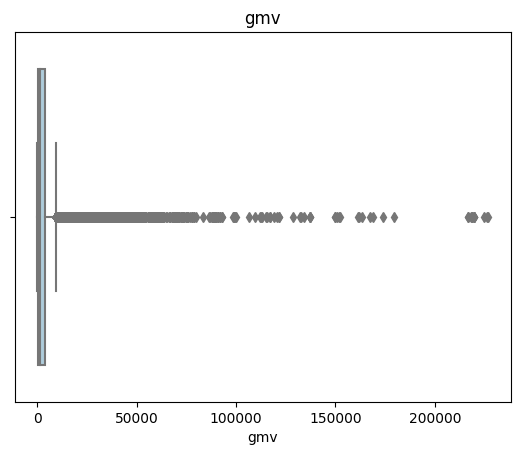

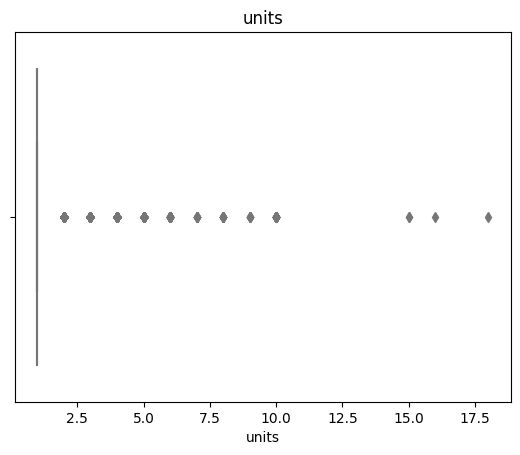

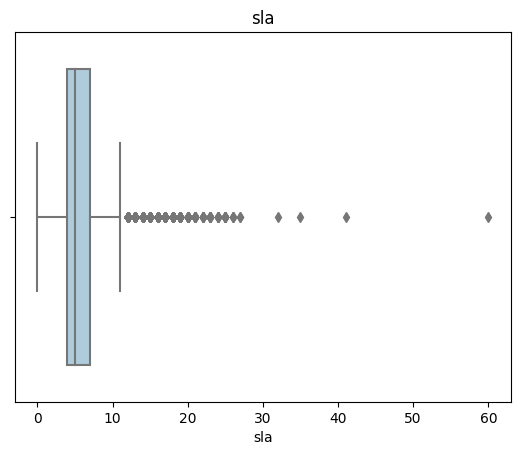

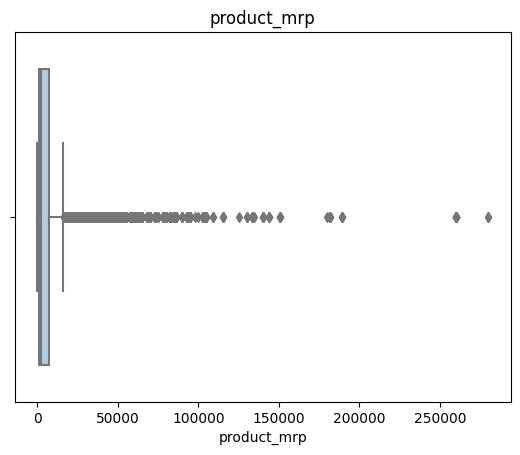

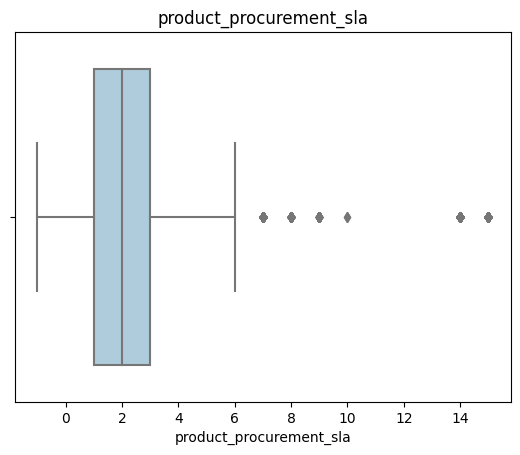

In [1002]:
## integer column handling
num=[]
obj=[]
for i in EleData2.columns:
  if EleData2[i].dtype=='float64':
    num.append(i)
  if EleData2[i].dtype=='int64':
    num.append(i)
  if EleData2[i].dtype=='object':
    obj.append(i)


num.remove('order_item_id')

x=1
for i in num:
  plt.title(i)
  sns.boxplot(x=EleData2[i])
  plt.show()
  x=x+1

## we will treat outliers later based on sub categories

In [1003]:
EleData2.columns
EleData2.order_date=EleData2['order_date'].dt.date

In [1004]:
## Week
EleData2['week']=((pd.to_datetime(EleData2['order_date'])-pd.to_datetime('2015-07-01'))/7)
EleData2['week']=EleData2['week'].apply(lambda x: x.days+1)
EleData2.loc[:,['order_date','week']]
EleData2.week.value_counts()

16    28442
44    13958
19    13225
30    12482
36    12240
25    12165
34    12092
48    11047
26     9762
32     9499
37     9451
23     9406
28     9009
35     9000
24     8572
27     8469
31     8251
33     8234
46     8168
17     8003
18     7957
47     7703
29     7569
22     7442
45     7425
49     7367
40     7159
41     7121
38     7101
50     6966
39     6799
20     6576
51     6530
3      6431
10     6342
15     6243
2      6205
52     6198
13     6141
21     5921
4      5691
12     5595
11     5593
14     5520
42     5282
43     2532
5      2531
53     1724
1      1578
9       933
6         4
8         2
7         1
Name: week, dtype: int64

In [1005]:
# 2. Listing Price and Pricing Discounts
EleData2=EleData2[EleData.product_mrp!=0]
EleData2['gmv']=EleData2.gmv.astype(float)
EleData2['listing_price'] = ((EleData2.gmv)/EleData2.units).round(2)
EleData2['discount_per']=(((EleData2['product_mrp']-EleData2['listing_price'])/EleData2['product_mrp'])).round(2)
EleData2.discount_per.describe()
EleData2[EleData2.product_mrp < EleData2.listing_price]
EleData2=EleData2[EleData2.product_mrp >= EleData2.listing_price]

In [1006]:
## joining rest of the data and calculating other variables from it
# ProdList
# Investment
# MonthlyNPS
# SalesCal
# Ont2015
# Ont2016


In [1007]:
# ## Sales
SalesCal = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/E-Commerce Capstone Dataset/Media data and other information.xlsx",sheet_name="Special Sale Calendar")

# SalesCal.head(20)

SalesCal1=pd.DataFrame(['2015-07-18','2015-07-19','2015-08-15','2015-08-16','2015-08-17','2015-08-28','2015-08-29','2015-08-30',
                        '2015-10-15','2015-10-16','2015-10-17','2015-11-07','2015-11-08','2015-11-09','2015-11-10','2015-11-11','2015-11-12',
                        '2015-11-13','2015-11-14','2015-12-25','2015-12-26','2015-12-27','2015-12-28','2015-12-29','2015-12-30','2015-12-31',
                        '2016-01-01','2016-01-02','2016-01-03','2016-01-20','2016-01-21','2016-01-22','2016-02-01','2016-02-02','2016-02-20','2016-02-21',
                       '2016-02-14','2016-02-15','2016-03-07','2016-03-08','2016-03-09','2016-05-25','2016-05-26','2016-05-27'],columns=["sale_date"])

# SalesCal1=SalesCal1[0].to_list()
# SalesCal1
EleData2.order_date=EleData2.order_date.apply(lambda x :str(x).strip())
EleData2=pd.merge(EleData2,SalesCal1,left_on='order_date',right_on='sale_date',how='left')
# # test[~test["date"].isna()]
# EleData2['sale_date'].value_counts()

In [1008]:
### Weather infomation canada
Ont2015=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/E-Commerce Capstone Dataset/ONTARIO-2015.xlsx",header=24)
Ont2016=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/E-Commerce Capstone Dataset/ONTARIO-2016.xlsx",header=24)
Ont_Weather = pd.concat([Ont2015,Ont2016])
Ont_Weather=Ont_Weather.loc[(Ont_Weather['Date/Time']>='2015-07-01') &(Ont_Weather['Date/Time']<'2016-07-01')]

# Ont2015['Max Temp Flag'].value_counts()
todrop= (Ont_Weather.isnull().sum()/Ont_Weather.shape[0]).reset_index()
todrop
req=todrop.loc[todrop[0]<0.50,:]['index'].to_list()
Ont_Weather=Ont_Weather[req]
Ont_Weather =Ont_Weather.drop(['Total Precip (mm)','Snow on Grnd (cm)','Data Quality'],1)

# Ont_Weather
Ont_Weather['week']=((pd.to_datetime(Ont_Weather['Date/Time'])-pd.to_datetime('2015-07-01'))/7)
Ont_Weather['week']=Ont_Weather['week'].apply(lambda x: x.days+1)
Ont_Weather['Date/Time']=Ont_Weather['Date/Time'].dt.date
weekly_kpis=Ont_Weather.groupby('week').mean().reset_index()

In [1009]:
weekly_kpis.head()
weekly_kpis.drop(['Year','Month'],1,inplace=True)

In [1010]:

weekly_kpis=weekly_kpis.sort_values(by='week')
Ont_Weather.info()
weekly_kpis.rename(columns={"Max Temp (°C)":"max_temp_c","Min Temp (°C)":"mon_temp_c","Mean Temp (°C)":"mean_temp_c",
                            "Heat Deg Days (°C)":"heat_deg_c","Cool Deg Days (°C)":"cool_deg_c","Total Rain (mm)":"total_rain",
                            "Total Snow (cm)":"total_snow"},inplace=True)
## filling missing values with fronyfill method as temp is time series
weekly_kpis.ffill(inplace=True)
weekly_kpis.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 181 to 181
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date/Time           366 non-null    object 
 1   Year                366 non-null    int64  
 2   Month               366 non-null    int64  
 3   Day                 366 non-null    int64  
 4   Max Temp (°C)       208 non-null    float64
 5   Min Temp (°C)       191 non-null    float64
 6   Mean Temp (°C)      191 non-null    float64
 7   Heat Deg Days (°C)  191 non-null    float64
 8   Cool Deg Days (°C)  191 non-null    float64
 9   Total Rain (mm)     215 non-null    float64
 10  Total Snow (cm)     215 non-null    float64
 11  week                366 non-null    int64  
dtypes: float64(7), int64(4), object(1)
memory usage: 37.2+ KB


week           0
Day            0
max_temp_c     0
mon_temp_c     0
mean_temp_c    0
heat_deg_c     0
cool_deg_c     0
total_rain     0
total_snow     0
dtype: int64

In [1011]:
# MonthlyNPS
MonthlyNPS = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/E-Commerce Capstone Dataset/Media data and other information.xlsx",sheet_name="Monthly NPS Score")
# ?pd.melt
MonthlyNPS.head()
NPS = pd.melt(MonthlyNPS,id_vars="Unnamed: 0",value_vars=["July'15","Aug'15","Sept'15","Oct'15","Nov'15",
                                                  "Dec'15","Jan'16","Feb'16","Mar'16","Apr'16",
                                                  "May'16","June'16"],).reset_index()
# ?pd.pivot
NPS.rename(columns={"Unnamed: 0":"Header","variable":"Month1","value":"Value"},inplace=True)
# NPS
# NPS
NPS['Month']=0
NPS.loc[NPS["Month1"].str.startswith("July"), "Month"] = 7
NPS.loc[NPS["Month1"].str.startswith("Aug"), "Month"] = 8
NPS.loc[NPS["Month1"].str.startswith("Sept"), "Month"] = 9
NPS.loc[NPS["Month1"].str.startswith("Oct"), "Month"] = 10
NPS.loc[NPS["Month1"].str.startswith("Nov"), "Month"] = 11
NPS.loc[NPS["Month1"].str.startswith("Dec"), "Month"] = 12
NPS.loc[NPS["Month1"].str.startswith("Jan"), "Month"] = 1
NPS.loc[NPS["Month1"].str.startswith("Feb"), "Month"] = 2
NPS.loc[NPS["Month1"].str.startswith("Mar"), "Month"] = 3
NPS.loc[NPS["Month1"].str.startswith("Apr"), "Month"] = 4
NPS.loc[NPS["Month1"].str.startswith("May"), "Month"] = 5
NPS.loc[NPS["Month1"].str.startswith("June"), "Month"] = 6
NPS['Year'] = pd.Series([2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016])
NPS['Month']=NPS['Month'].astype(str)
NPS.drop("index",1,inplace=True)

# print(NPS)
# print(NPS)
NPS


Header   Month1        Value Month  Year
0           NPS  July'15    54.599588     7  2015
1   Stock Index  July'15  1177.000000     7  2015
2           NPS   Aug'15    59.987101     8  2015
3   Stock Index   Aug'15  1206.000000     8  2015
4           NPS  Sept'15    46.925419     9  2015
5   Stock Index  Sept'15  1101.000000     9  2015
6           NPS   Oct'15    44.398389    10  2015
7   Stock Index   Oct'15  1210.000000    10  2015
8           NPS   Nov'15    47.000000    11  2015
9   Stock Index   Nov'15  1233.000000    11  2015
10          NPS   Dec'15    45.800000    12  2015
11  Stock Index   Dec'15  1038.000000    12  2015
12          NPS   Jan'16    47.093031     1  2016
13  Stock Index   Jan'16  1052.000000     1  2016
14          NPS   Feb'16    50.327406     2  2016
15  Stock Index   Feb'16  1222.000000     2  2016
16          NPS   Mar'16    49.020550     3  2016
17  Stock Index   Mar'16  1015.000000     3  2016
18          NPS   Apr'16    51.827605     4  2016
19  Stock Index   Apr'16  1242.000000     4  2016
20          NPS   May'16    47.306951     5  2016
21  Stock Index   May'16  1228.000000     5  2016
22          NPS  June'16    50.516687     6  2016
23  Stock Index  June'16  1194.000000     6  2016

In [1012]:
EleData2.rename(columns={"Year_x":"Year","Month_x":"Month"},inplace=True)
EleData2=pd.merge(EleData2,NPS.loc[NPS['Header']=='Stock Index'],how='left',on='Month')
EleData2=pd.merge(EleData2,NPS.loc[NPS['Header']=='NPS'],how='left',on='Month')
# EleData2['Year_x'].count()
EleData2.rename(columns={"Value_x":"Stock_Index","Value_y":"NPS"},inplace=True)


In [1013]:
# lets clean the frame with _x _y coluumns
# EleData2.columns
EleData2['Year']=EleData2['Year_x']
# EleData2['week']=EleData2['week_x']

col=[]
for i in EleData2.columns:
  if (str(i).endswith("_x")) | (str(i).endswith("_y") | (str(i)=='key_0')):
    col.append(i)

EleData2.drop(col,1,inplace=True)


In [1014]:
EleData2.columns

Index(['order_date', 'Month', 'order_item_id', 'gmv', 'units',
       'order_payment_type', 'sla', 'product_analytic_category',
       'product_analytic_sub_category', 'product_mrp',
       'product_procurement_sla', 'product_analytic_vertical_derived', 'week',
       'listing_price', 'discount_per', 'sale_date', 'Stock_Index', 'NPS',
       'Year'],
      dtype='object')

In [1015]:
### Investments

Investment = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/E-Commerce Capstone Dataset/Media data and other information.xlsx",header=2,sheet_name="Media Investment")
Investment.isna().sum()
Investment.fillna(0,inplace=True)
Investment.drop(["Unnamed: 0"],1,inplace=True)
Investment=Investment.loc[Investment.Year!=0]
Investment.head()
Investment['month_start'] = pd.to_datetime(Investment[['Year', 'Month']].assign(DAY=1))
Investment.set_index('month_start',inplace=True)


In [1016]:
# Investment.info()
july=Investment.index[-1] + pd.offsets.MonthBegin(1)
july

Timestamp('2016-07-01 00:00:00')

In [1017]:
Investment =Investment.append(Investment.iloc[[-1]].rename({Investment.index[-1]: july}))
Inv2=Investment.resample("W").ffill().reset_index()
Inv2.set_index('month_start',inplace=True)
# Inv2=Inv2.iloc[:-1]
# EleData2['week'].value_counts()
Inv2.head()
Inv2.rename(columns={' Affiliates':'Affiliates'},inplace=True)


In [1018]:
Inv2['Total Investment'] = Inv2['Total Investment']/Inv2.resample('MS')['Total Investment'].transform('size')
Inv2['TV'] = Inv2['TV']/Inv2.resample('MS')['TV'].transform('size')
Inv2['Digital'] = Inv2['Digital'] /Inv2.resample('MS')['Digital'].transform('size')
Inv2['Sponsorship'] = Inv2['Sponsorship']/Inv2.resample('MS')['Sponsorship'].transform('size')
Inv2['Content Marketing'] = Inv2['Content Marketing']/Inv2.resample('MS')['Content Marketing'].transform('size')
Inv2['Online marketing'] = Inv2['Online marketing']/ Inv2.resample('MS')['Online marketing'].transform('size')
Inv2['Affiliates'] = Inv2['Affiliates']/ Inv2.resample('MS')['Affiliates'].transform('size')
Inv2['SEM'] = Inv2['SEM']/Inv2.resample('MS')['SEM'].transform('size')
Inv2['Radio'] = Inv2['Radio']/Inv2.resample('MS')['Radio'].transform('size')
Inv2['Other'] = Inv2['Other']/Inv2.resample('MS')['Other'].transform('size')



In [1019]:
## aDstock
# EleData3.columns
# considering 0.5 decay
ad = ['Total Investment', 'TV', 'Digital','Sponsorship', 'Content Marketing', 'Online marketing', ' Affiliates','SEM', 'Radio', 'Other']
def adstock(channel):
  Inv_ad=[]
  for i in range(0,(len(Inv2))):
    if i==0:
      Inv_ad.append(Inv2.iloc[i][channel].round(2))
    else:
      Inv_ad.append((Inv2.iloc[i][channel]+ (0.5 * Inv2.iloc[i-1][channel])).round(2))
  return Inv_ad


In [1020]:
Inv2['Total_Investment_AD']=adstock("Total Investment")
Inv2['TV_AD']=adstock("TV")
Inv2['Digital_AD']=adstock("Digital")
Inv2['Content_Marketing_AD']=adstock("Content Marketing")
Inv2['Sponsorship_AD']=adstock("Sponsorship")
Inv2['Online_marketing_AD']=adstock("Online marketing")
Inv2['Affiliates_AD']=adstock("Affiliates")
Inv2['SEM_AD']=adstock("SEM")
Inv2['Radio_AD']=adstock("Radio")
Inv2['Other_AD']=adstock("Other")


In [1021]:
Inv2['week']=nm.arange(1,54)
weekly_kpis=pd.merge(weekly_kpis,Inv2,on='week')

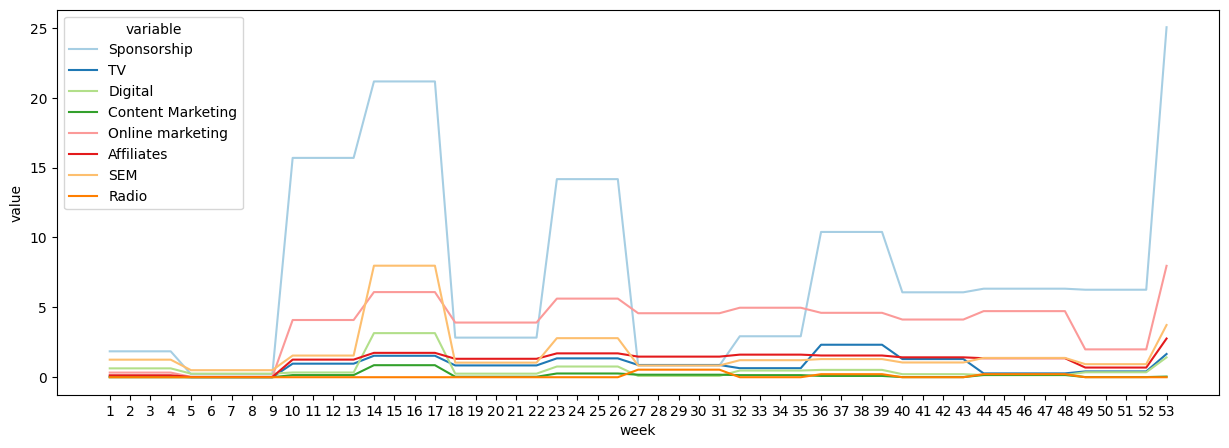

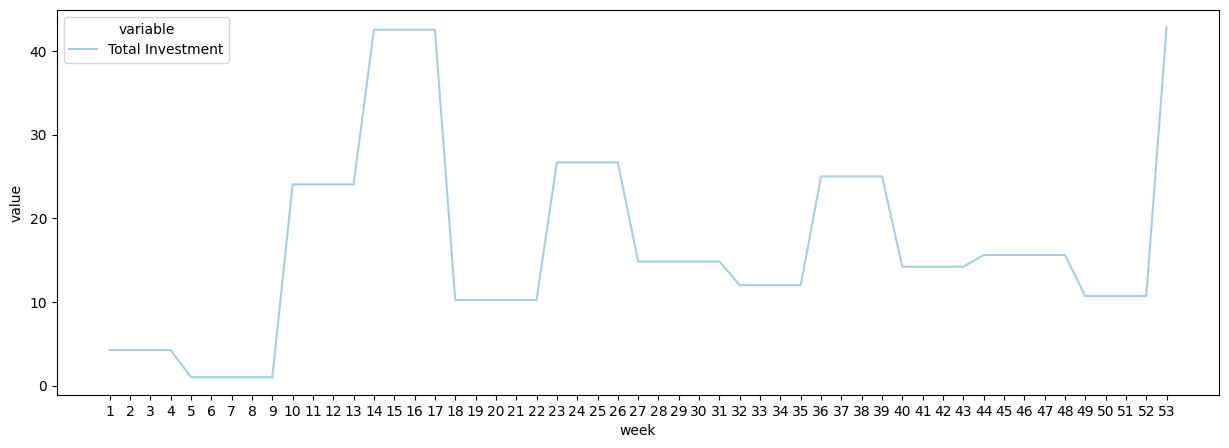

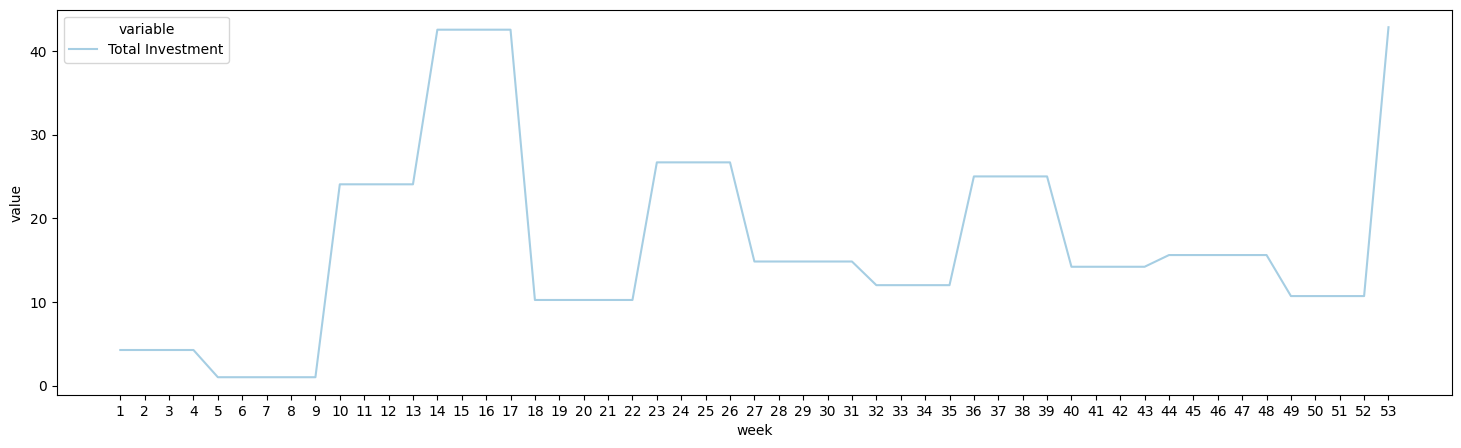

In [1022]:
markinv = ['week', 'Sponsorship','TV','Digital', 'Content Marketing', 'Online marketing','Affiliates', 'SEM', 'Radio']

plt.figure(figsize=(15,5))
sns.lineplot(x='week',y='value',data=pd.melt(Inv2[markinv],['week']),hue='variable')
plt.xticks(Inv2['week'])
plt.show()

plt.figure(figsize=(15,5))
sns.lineplot(x='week',y='value',data=pd.melt(Inv2[['Total Investment','week']],['week']),hue='variable')
plt.xticks(Inv2['week'])
plt.show()

plt.figure(figsize=(18,5))
sns.lineplot(x='week',y='value',data=pd.melt(Inv2[['Total Investment','week']],['week']),hue='variable')
plt.xticks(Inv2['week'])
plt.show()



In [1023]:
## Pay Date 1st and 15th
EleData2.order_date=pd.to_datetime(EleData2.order_date).dt.date
EleData2["pay_date_flag"]=EleData2['order_date'].apply(lambda x : 1 if ((x).day==15)|(pd.to_datetime(x).is_month_end) else 0)


In [1024]:
# holiday flag
import holidays
holidays=pd.DataFrame(pd.Series(holidays.CA(prov='ON',years=[2015,2016]))).reset_index()
holidays=holidays.rename(columns={'index':'Holiday_flag'})
holidays=holidays.drop(0,axis=1)
holidays['Holiday_flag']=pd.to_datetime(holidays['Holiday_flag'], dayfirst=True)
holidays.info()
holidays['Holiday_flag']=holidays['Holiday_flag'].dt.date


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Holiday_flag  18 non-null     datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 272.0 bytes


In [1025]:
EleData3=pd.merge(EleData2,holidays,how='left',left_on='order_date',right_on='Holiday_flag').fillna(0)

In [1026]:
## payment type
EleData3.order_payment_type= EleData3.order_payment_type.apply(lambda x : 1 if x=='cod' else 0)


In [1027]:
EleData3.pay_date_flag.value_counts()

0    362012
1     23984
Name: pay_date_flag, dtype: int64

In [1028]:
df_prod=EleData3.groupby(['product_analytic_sub_category','product_analytic_vertical_derived'])['gmv'].sum()
df_prod=pd.DataFrame(df_prod.reset_index())
# df_prod.rename(columns={0:"count"},inplace=True)

In [1029]:
df_prod

product_analytic_sub_category product_analytic_vertical_derived  \
0                        camera                            Others   
1                        camera                              dslr   
2                        camera                     point & shoot   
3               gamingaccessory                            Others   
4               gamingaccessory                           gamepad   
5               gamingaccessory                     gamingheadset   
6               gamingaccessory                       gamingmouse   
7                     homeaudio                            Others   
8                     homeaudio                           fmradio   
9                     homeaudio                  homeaudiospeaker   

            gmv  
0  4.568340e+07  
1  1.378907e+09  
2  2.587350e+08  
3  3.530583e+07  
4  6.082473e+07  
5  3.145047e+07  
6  2.561555e+07  
7  2.799037e+07  
8  1.871460e+07  
9  1.938923e+08

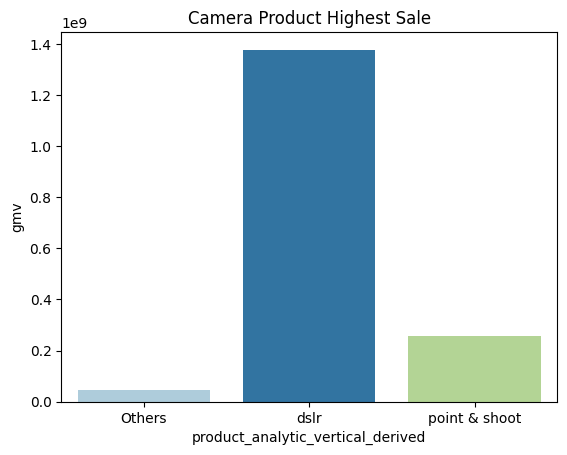

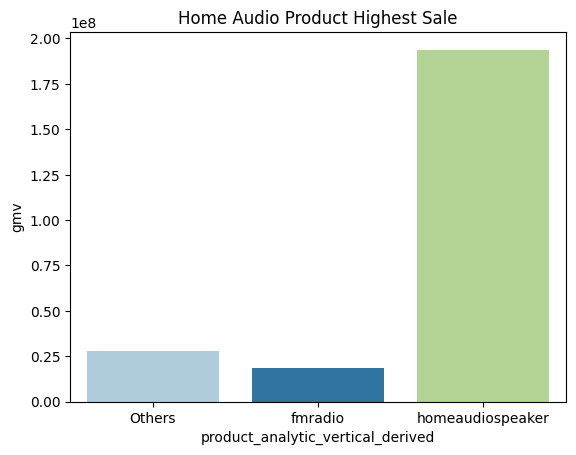

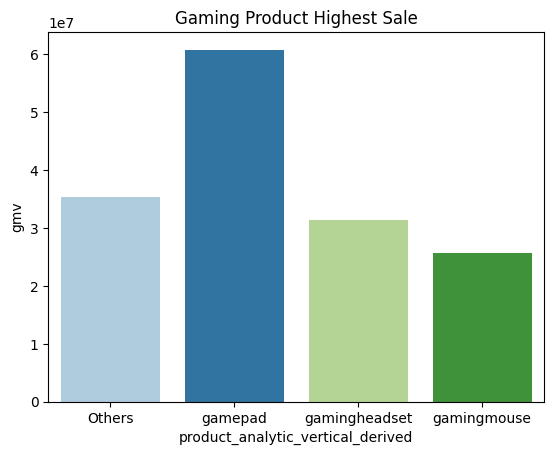

In [1030]:
# df_prod.sort_values('product_analytic_sub_category')
sns.set_palette("Paired")
sns.barplot(data = df_prod[df_prod.product_analytic_sub_category=='camera'] , x='product_analytic_vertical_derived' ,y='gmv')
plt.title("Camera Product Highest Sale")
plt.show()

sns.set_palette("Paired")
sns.barplot(data = df_prod[df_prod.product_analytic_sub_category=='homeaudio'] , x='product_analytic_vertical_derived',y='gmv' )
plt.title("Home Audio Product Highest Sale")
plt.show()

sns.set_palette("Paired")
sns.barplot(data = df_prod[df_prod.product_analytic_sub_category=='gamingaccessory'] , x='product_analytic_vertical_derived',y='gmv')
plt.title("Gaming Product Highest Sale")
plt.show()

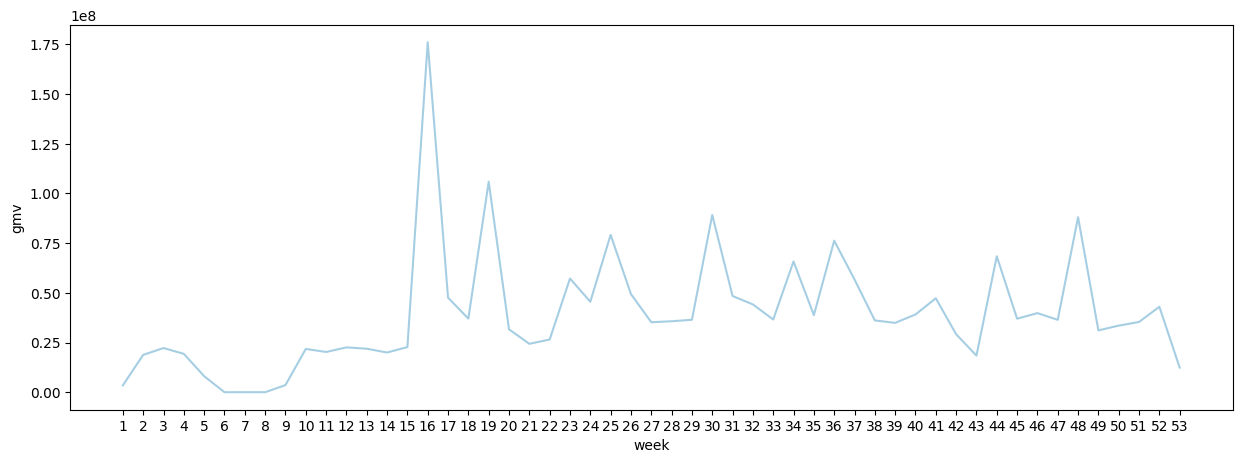

In [1031]:
wowgmv=EleData3.groupby('week')['gmv'].sum().reset_index()
plt.figure(figsize=(15,5))
sns.lineplot(x=wowgmv.week,y=wowgmv.gmv)
plt.xticks(wowgmv['week'])
plt.show()


In [1032]:
EleData3.columns

Index(['order_date', 'Month', 'order_item_id', 'gmv', 'units',
       'order_payment_type', 'sla', 'product_analytic_category',
       'product_analytic_sub_category', 'product_mrp',
       'product_procurement_sla', 'product_analytic_vertical_derived', 'week',
       'listing_price', 'discount_per', 'sale_date', 'Stock_Index', 'NPS',
       'Year', 'pay_date_flag', 'Holiday_flag'],
      dtype='object')

# Data Aggregation and analysis

Camera Analysis

In [1033]:
##
camera=EleData3[EleData3.product_analytic_sub_category=='camera']
# camera.discount_per

In [1034]:
camera.columns


Index(['order_date', 'Month', 'order_item_id', 'gmv', 'units',
       'order_payment_type', 'sla', 'product_analytic_category',
       'product_analytic_sub_category', 'product_mrp',
       'product_procurement_sla', 'product_analytic_vertical_derived', 'week',
       'listing_price', 'discount_per', 'sale_date', 'Stock_Index', 'NPS',
       'Year', 'pay_date_flag', 'Holiday_flag'],
      dtype='object')

In [1035]:
cam_dummies = pd.get_dummies(camera['product_analytic_vertical_derived'])
camera=pd.concat([camera,cam_dummies],axis=1)


In [1036]:
camera.drop(["product_analytic_sub_category","product_analytic_category"],1,inplace=True)

In [1037]:
num
num.append('discount_per')
num.append('listing_price')

In [1038]:
camera[num].describe()

gmv         units           sla    product_mrp  \
count   94706.000000  94706.000000  94706.000000   94706.000000   
mean    17774.221234      1.011816      4.694370   27114.656505   
std     11423.619524      0.143116      2.399058   16922.490081   
min         0.000000      1.000000      0.000000     599.000000   
25%      6599.000000      1.000000      3.000000    8000.000000   
50%     19490.000000      1.000000      4.000000   34950.000000   
75%     24990.000000      1.000000      6.000000   40000.000000   
max    226947.000000      9.000000     35.000000  280000.000000   

       product_procurement_sla  discount_per  listing_price  
count             94706.000000  94706.000000   94706.000000  
mean                  2.777754      0.321185   17615.696167  
std                   2.490936      0.133102   11240.653746  
min                  -1.000000      0.000000       0.000000  
25%                   1.000000      0.210000    6552.000000  
50%                   3.000000      0.350000   19490.000000  
75%                   4.000000      0.430000   24990.000000  
max                  15.000000      1.000000  226947.000000

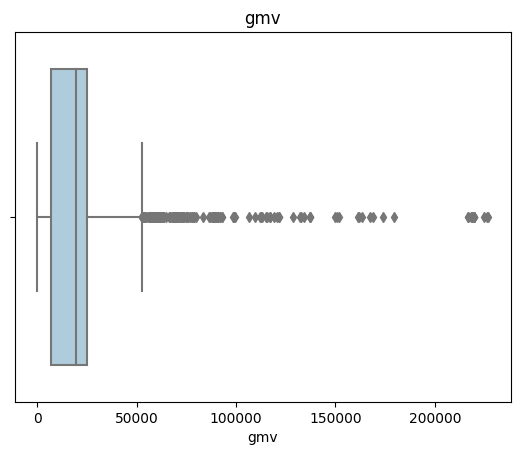

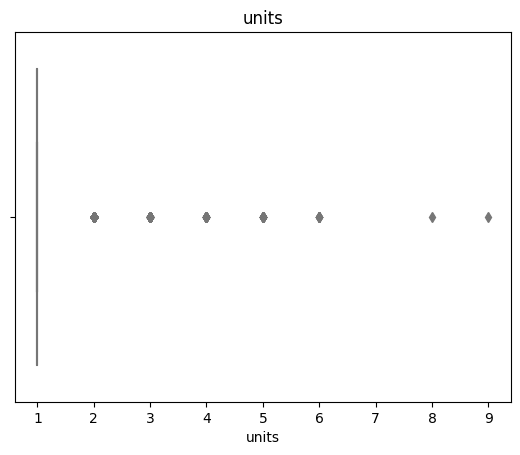

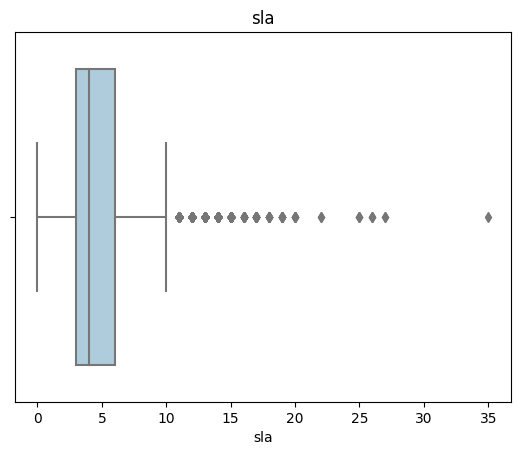

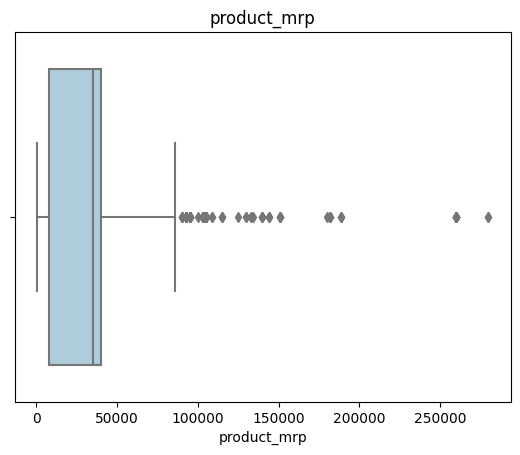

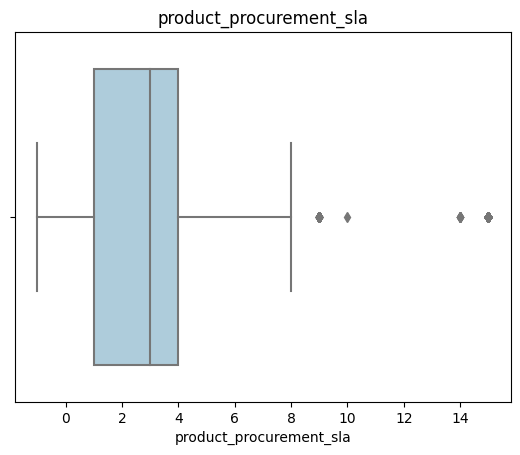

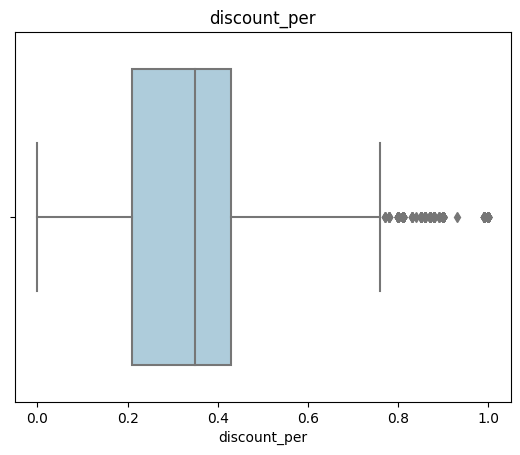

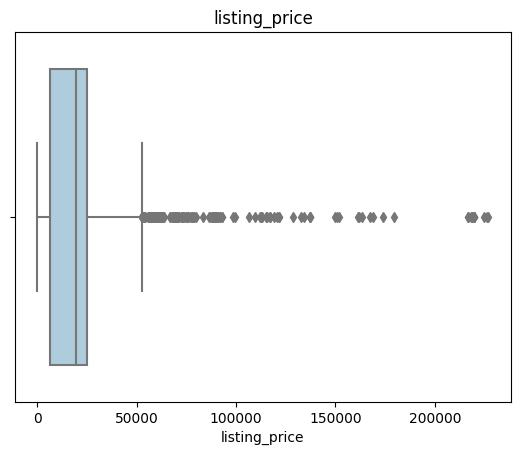

In [1039]:
for i in num:
  sns.boxplot(x=camera[i])
  plt.title(i)
  plt.show()

In [1040]:
q1=camera['product_mrp'].quantile(0.25)
q3=camera['product_mrp'].quantile(0.75)
iqr=q3-q1
lw=q1-iqr*1.5
up=q3+iqr*1.5
print(lw," ",up)
# camera[camera['product_mrp']>112000]
camera.loc[camera['product_mrp']>up,'product_mrp']=up
camera.loc[camera['product_mrp']<lw,'product_mrp']=lw

-40000.0   88000.0


In [1041]:
q1=camera['gmv'].quantile(0.25)
q3=camera['gmv'].quantile(0.75)
iqr=q3-q1
lw=q1-iqr*1.5
up=q3+iqr*1.5
print(lw," ",up)
camera[camera['gmv']>72373.5]
camera.loc[camera['gmv']>up,'gmv']=up
camera.loc[camera['gmv']<lw,'gmv']=lw

-20987.5   52576.5


In [1042]:
q1=camera['listing_price'].quantile(0.25)
q3=camera['listing_price'].quantile(0.75)
iqr=q3-q1
lw=q1-iqr*1.5
up=q3+iqr*1.5
print(lw," ",up)
# camera[camera['listing_price']>72373.5]
camera.loc[camera['listing_price']>up,'listing_price']=up
camera.loc[camera['listing_price']<lw,'listing_price']=lw

-21105.0   52647.0


In [1043]:
camera['product_mrp'].describe()

count    94706.000000
mean     27064.036122
std      16561.439902
min        599.000000
25%       8000.000000
50%      34950.000000
75%      40000.000000
max      88000.000000
Name: product_mrp, dtype: float64

In [1153]:
q1=camera['discount_per'].quantile(0.25)
q3=camera['discount_per'].quantile(0.75)
iqr=q3-q1
lw=q1-iqr*1.5
up=q3+iqr*1.5
print(lw," ",up)
camera[camera['discount_per']>1.39]
camera.loc[camera['discount_per']>up,'discount_per']=up
camera.loc[camera['discount_per']<lw,'discount_per']=lw


q1=camera['sla'].quantile(0.25)
q3=camera['sla'].quantile(0.75)
iqr=q3-q1
lw=q1-iqr*1.5
up=q3+iqr*1.5
print(lw," ",up)
camera.loc[camera['sla']>up,'sla']=up
camera.loc[camera['sla']<lw,'sla']=lw

q1=camera['product_procurement_sla'].quantile(0.25)
q3=camera['product_procurement_sla'].quantile(0.75)
iqr=q3-q1
lw=q1-iqr*1.5
up=q3+iqr*1.5
print(lw," ",up)
camera.loc[camera['product_procurement_sla']>up,'product_procurement_sla']=up
camera.loc[camera['product_procurement_sla']<lw,'product_procurement_sla']=lw

-0.12000000000000002   0.76
-1.5   10.5
-3.5   8.5


In [1045]:
camera.columns

Index(['order_date', 'Month', 'order_item_id', 'gmv', 'units',
       'order_payment_type', 'sla', 'product_mrp', 'product_procurement_sla',
       'product_analytic_vertical_derived', 'week', 'listing_price',
       'discount_per', 'sale_date', 'Stock_Index', 'NPS', 'Year',
       'pay_date_flag', 'Holiday_flag', 'Others', 'dslr', 'point & shoot'],
      dtype='object')

In [1154]:
camera_wk=camera.groupby(['week']).agg({"order_item_id":"nunique",'gmv':'sum','units':'sum','order_payment_type':'sum','sla':'mean',
                                        'product_mrp':'sum','product_procurement_sla':'mean','listing_price':'sum',
                                         'discount_per':'sum','Stock_Index':'max','NPS':'max','pay_date_flag':'max',
                                          "Holiday_flag": "nunique",'sale_date':"nunique","Others":"sum","dslr":"sum","point & shoot":"sum"}).round(2)

camera_wk=pd.merge(camera_wk,weekly_kpis,on='week')

camera_wk.rename(columns={"sales_date":"num_of_sales"},inplace=True)

In [1155]:
camera_wk.drop(['heat_deg_c','mon_temp_c','Year','Month','Day'],1,inplace=True)

In [1156]:
camera_wk.order_payment_type.value_counts()
camera_wk.rename(columns={'order_item_id':'order_count',"order_payment_type":"order_payment_cod",'mon_temp_c':"min_temp_c","pay_date_flag":"pay_day_in_wk"},inplace=True)
camera_wk["cod_per"]=camera_wk["order_payment_cod"]/camera_wk["order_count"]
camera_wk.drop("order_payment_cod",1,inplace=True)
camera_wk.rename(columns={'sale_date':"num_of_sales"},inplace=True)


In [1157]:
camera_wk.num_of_sales=camera_wk.num_of_sales-1
# camera_wk.head()

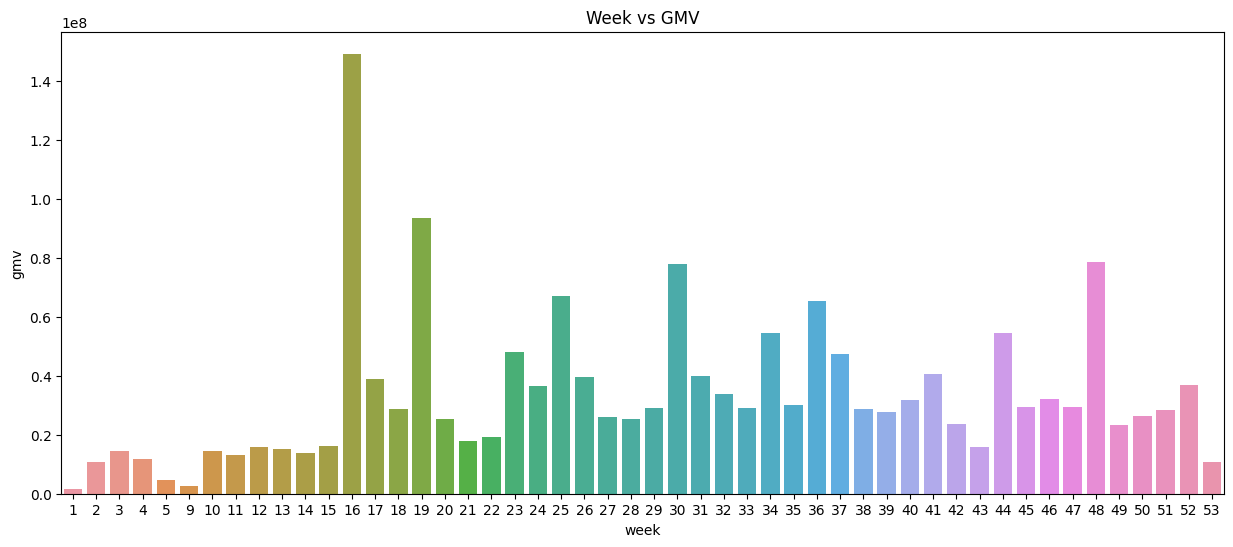

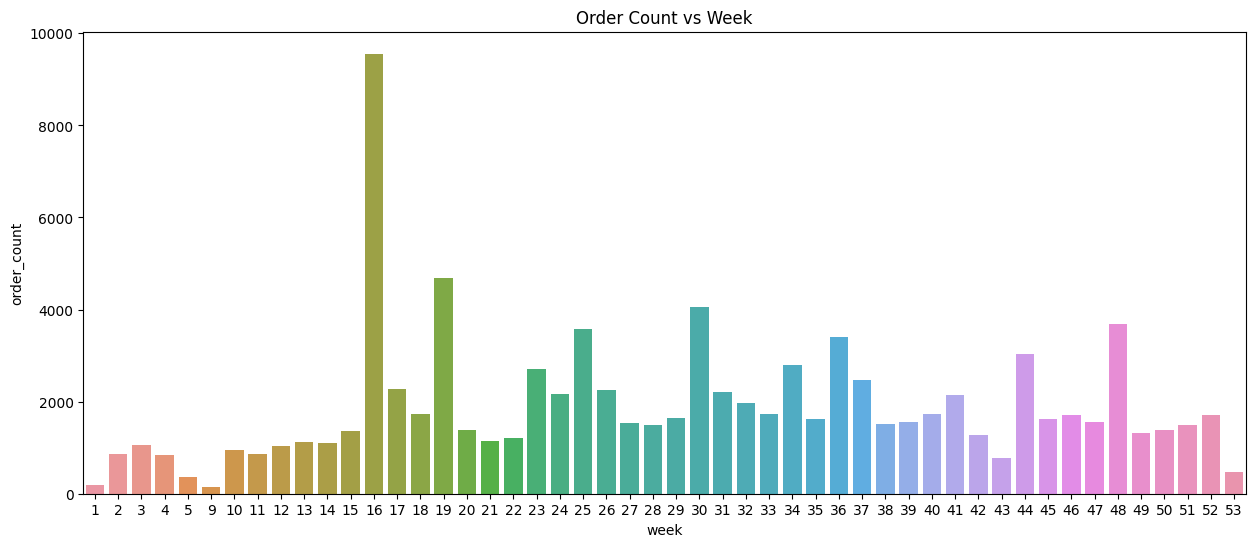

In [1123]:


plt.figure(figsize=(15,6))
sns.barplot(x=camera_wk['week'],y=camera_wk['gmv'])
plt.title("Week vs GMV")
plt.show()
# On an avverage 3 sales a week giving better result


plt.figure(figsize=(15,6))
sns.barplot(x=camera_wk['week'],y=camera_wk['order_count'])
plt.title("Order Count vs Week")
plt.show()

## On week 16 , 19, 25, 30,36,44 and 48 sales was good

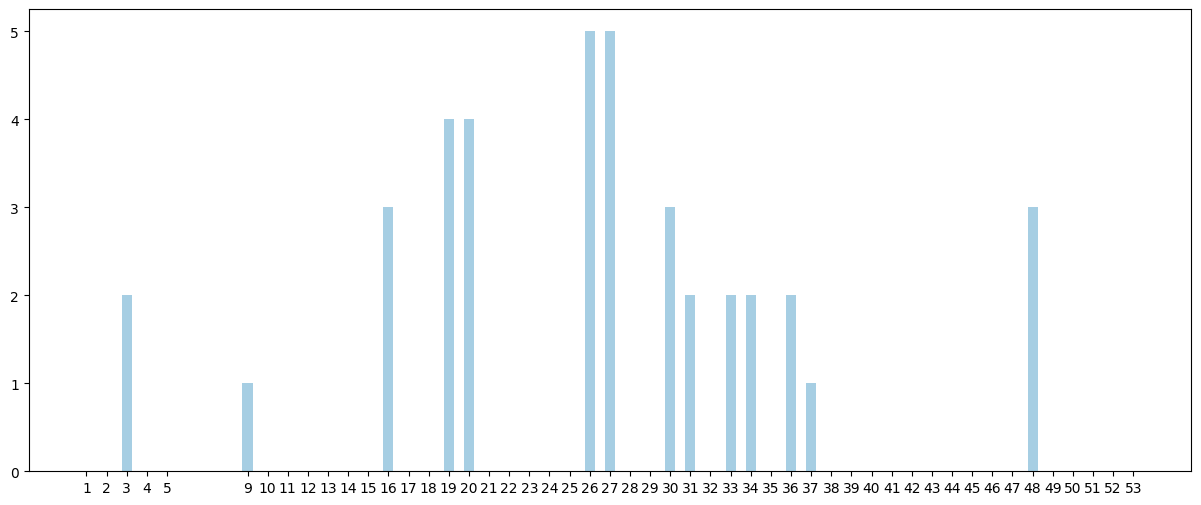

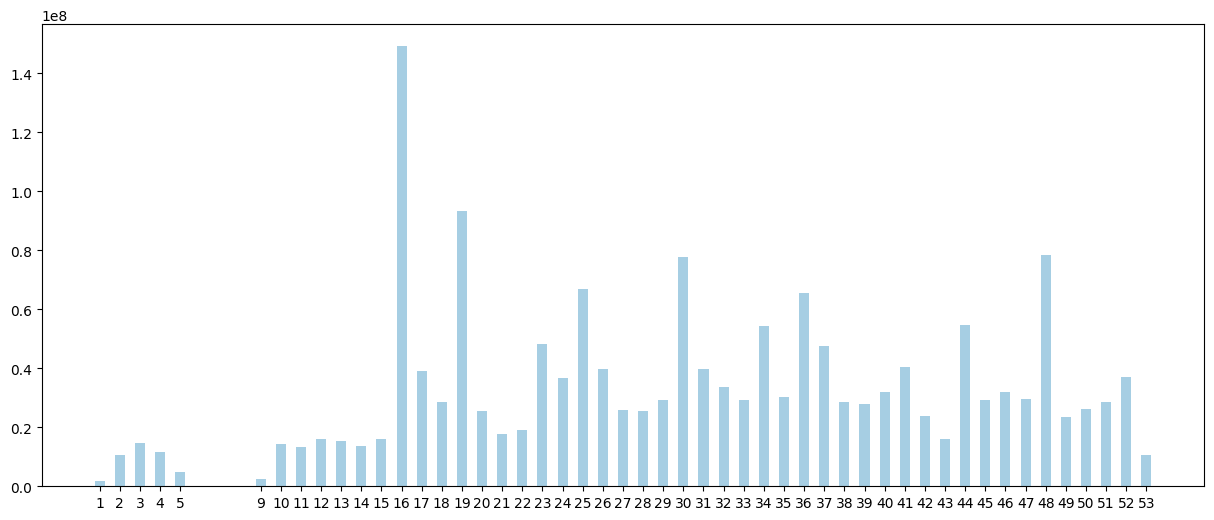

In [1052]:
plt.figure(figsize=(15,6))
width=0.5
plt.bar(x=camera_wk['week'],height=camera_wk['num_of_sales'],width=width)
plt.xticks(camera_wk['week'])
plt.show()
plt.figure(figsize=(15,6))
plt.bar(x=camera_wk['week'],height=camera_wk['gmv'],width=width)
plt.xticks(camera_wk['week'])
plt.show()

##  week 16th had 3 days of sale and it improved its gmv, similarly for week 48, 19 and 30
# But in Week 26 27 5 days were sale days bt id didnt improve the GMV much

# Week 16, 19 , 30 , 34,36 and 48 : has impact because has good gmv and number of sales

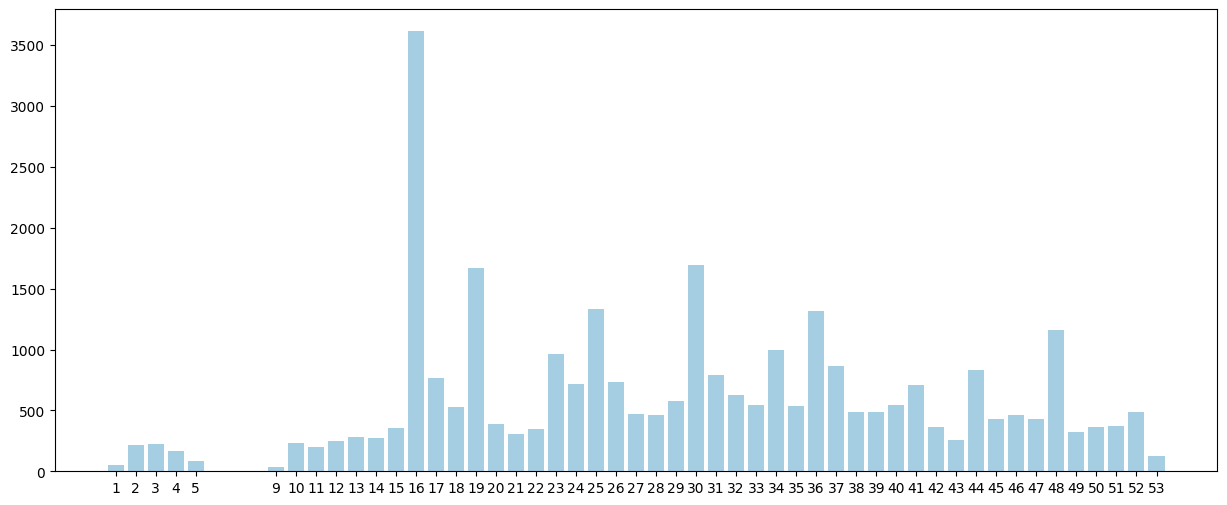

In [1053]:
plt.figure(figsize=(15,6))
plt.bar(x=camera_wk['week'],height=camera_wk['discount_per'])
plt.xticks(camera_wk['week'])
plt.show()

### Now week 25th may not have any sale but disocunts were given for most items and hence GMV was improved which makes sense

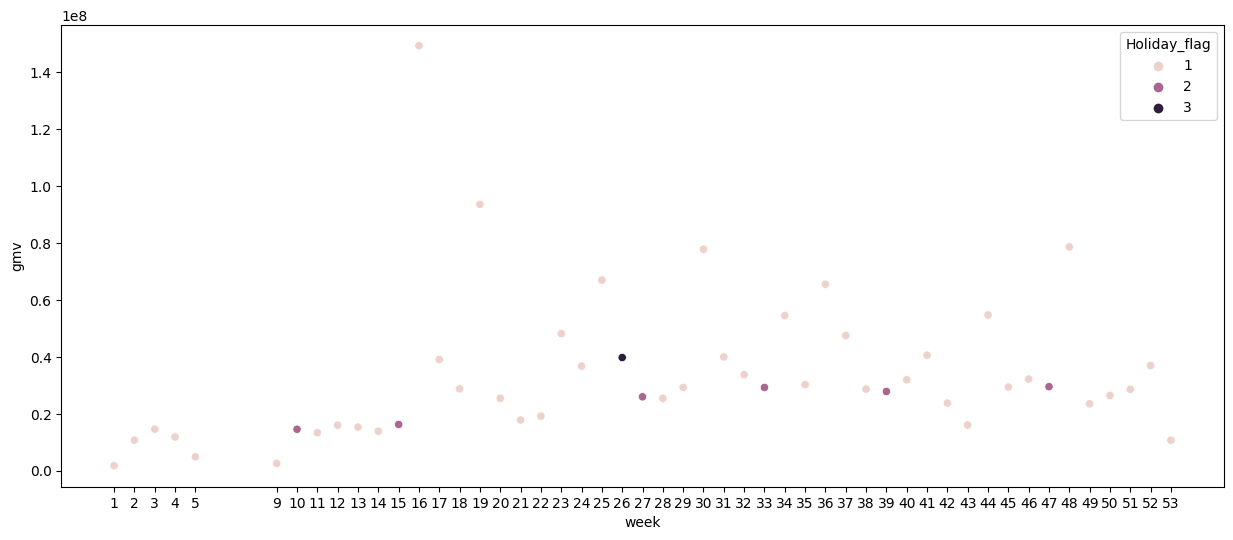

In [1054]:
plt.figure(figsize=(15,6))
sns.scatterplot(x=camera_wk['week'],y=camera_wk['gmv'],hue=camera_wk['Holiday_flag'])
plt.xticks(camera_wk['week'])
plt.show()

# Week 26, 15, 27 33 39 47


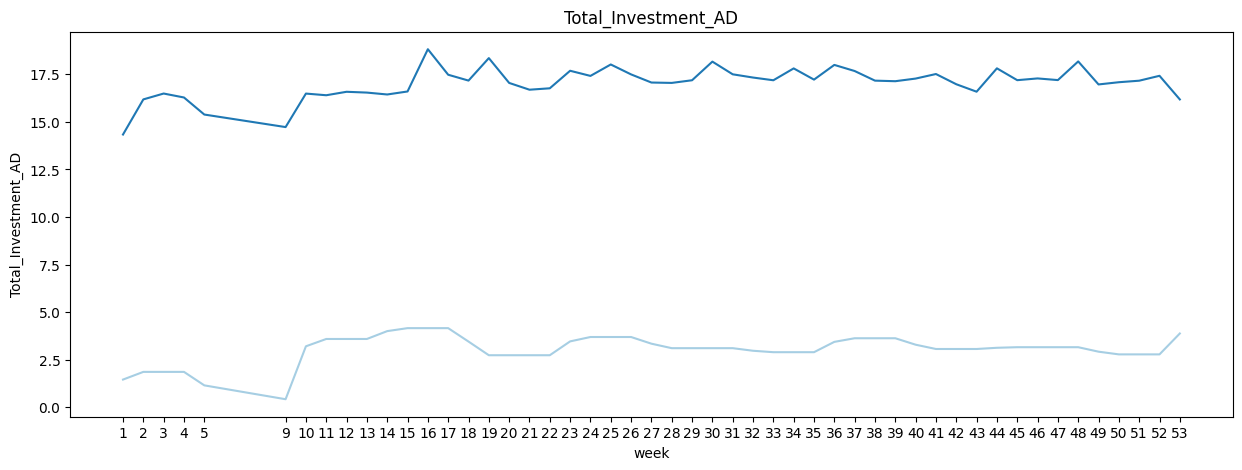

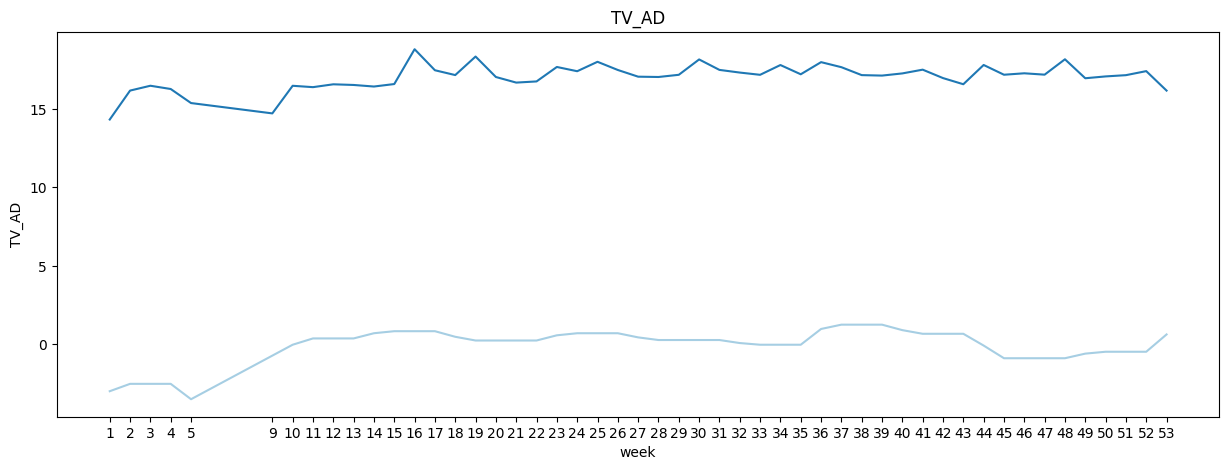

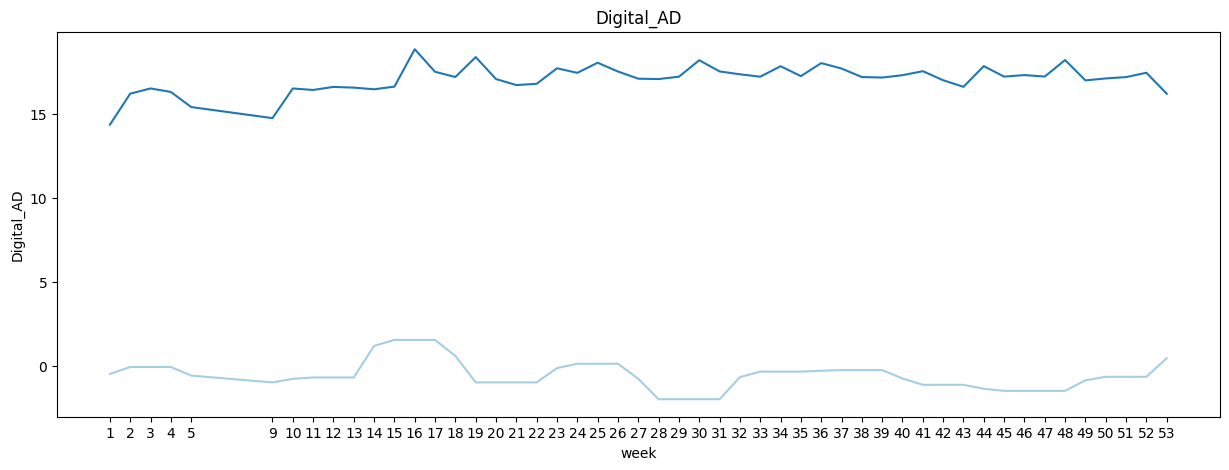

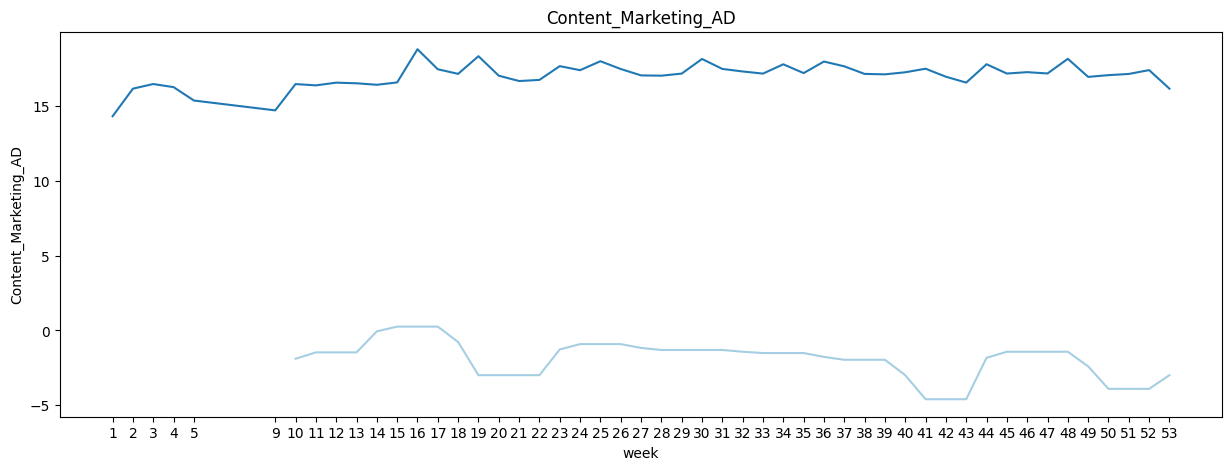

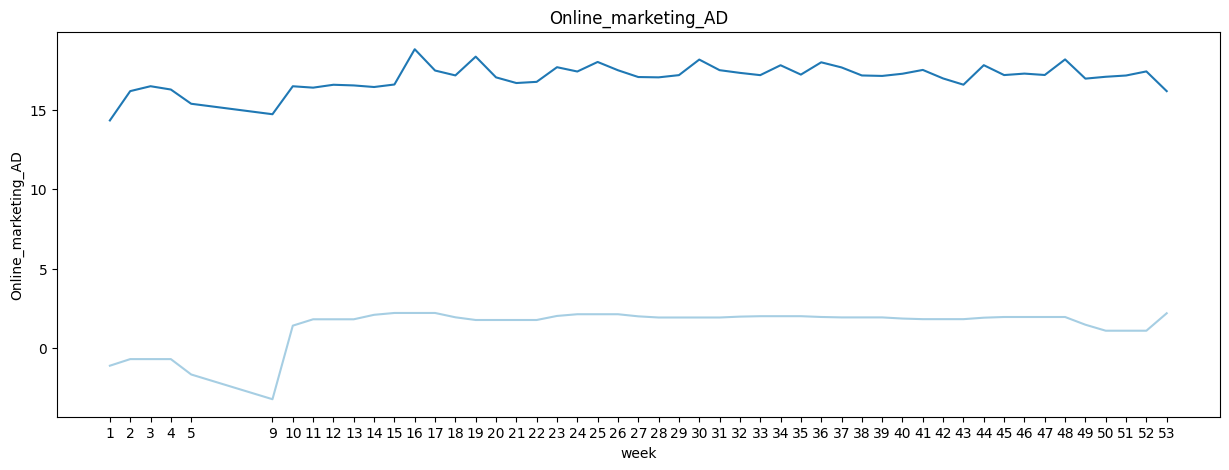

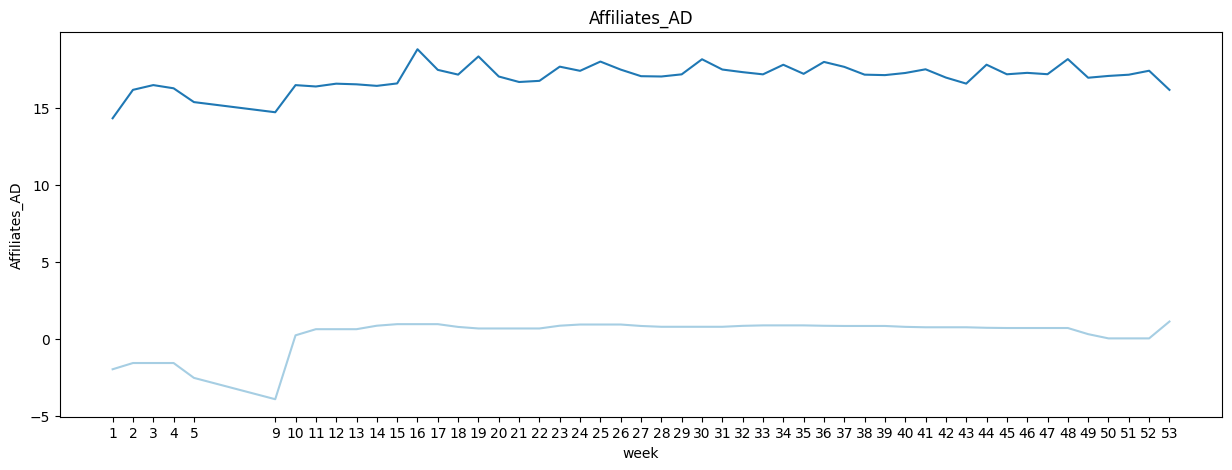

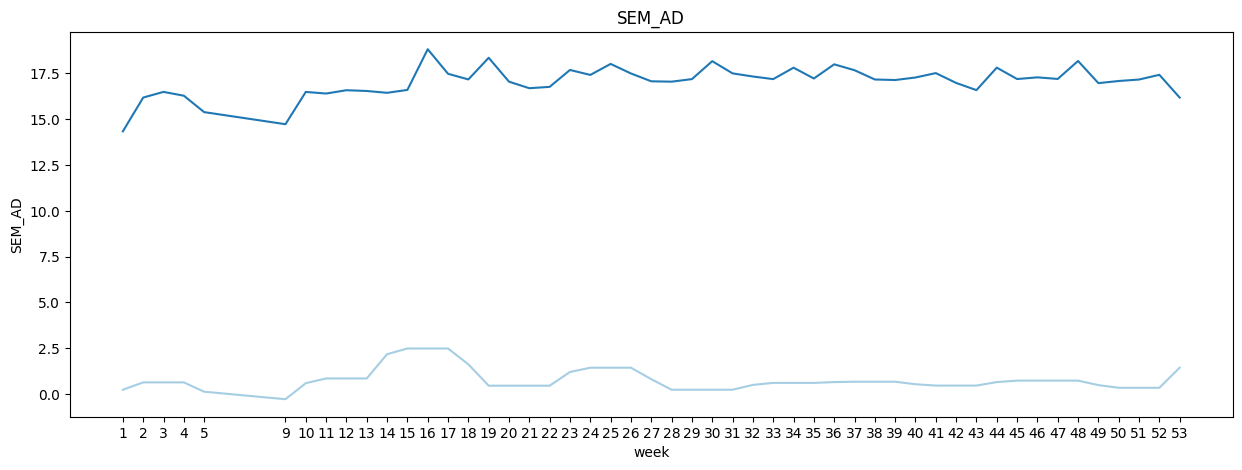

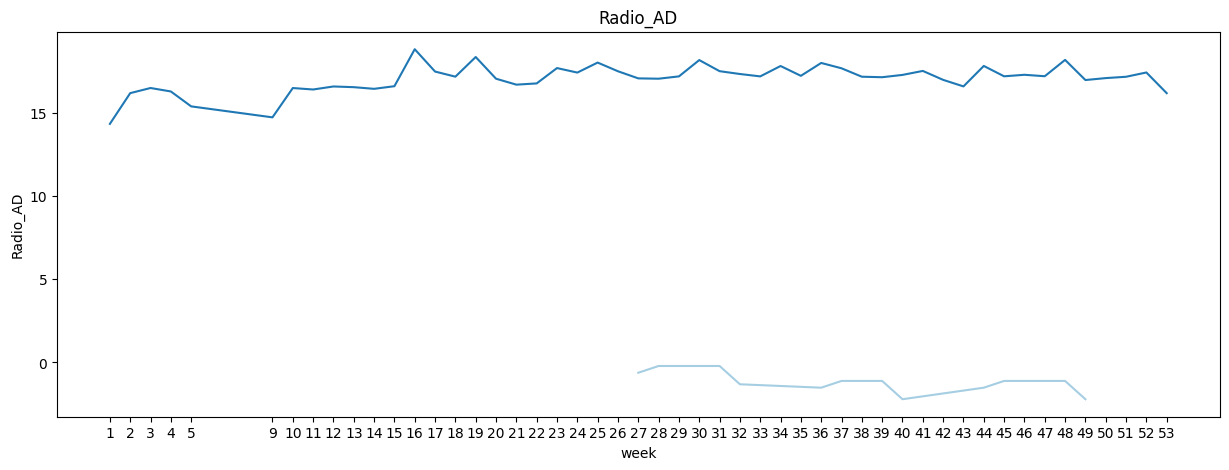

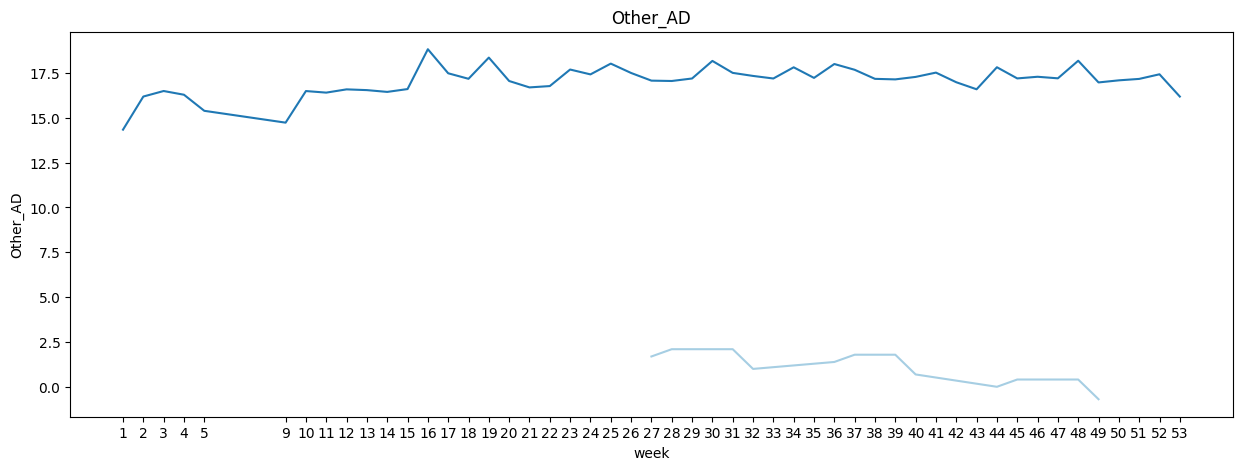

In [1055]:
camera.columns
markinv = ['Total_Investment_AD', 'TV_AD','Digital_AD', 'Content_Marketing_AD', 'Online_marketing_AD','Affiliates_AD', 'SEM_AD', 'Radio_AD', 'Other_AD','gmv']

# average_sale_per_week
# plt.figure(figsize=(25, 19))
x=1
for i in markinv:
  if i != 'gmv':
    # plt.subplot(9,1,x)
    plt.figure(figsize=(15, 5))
    plt.title(i)
    sns.lineplot(x=camera_wk['week'],y=nm.log(camera_wk[i]))
    sns.lineplot(x=camera_wk['week'],y=nm.log(camera_wk['gmv']))
    plt.xticks(camera_wk['week'])
    x=x+1
    plt.show()



# tv , online marketing , affliates , radio and other doesnt seems impacting the sales much

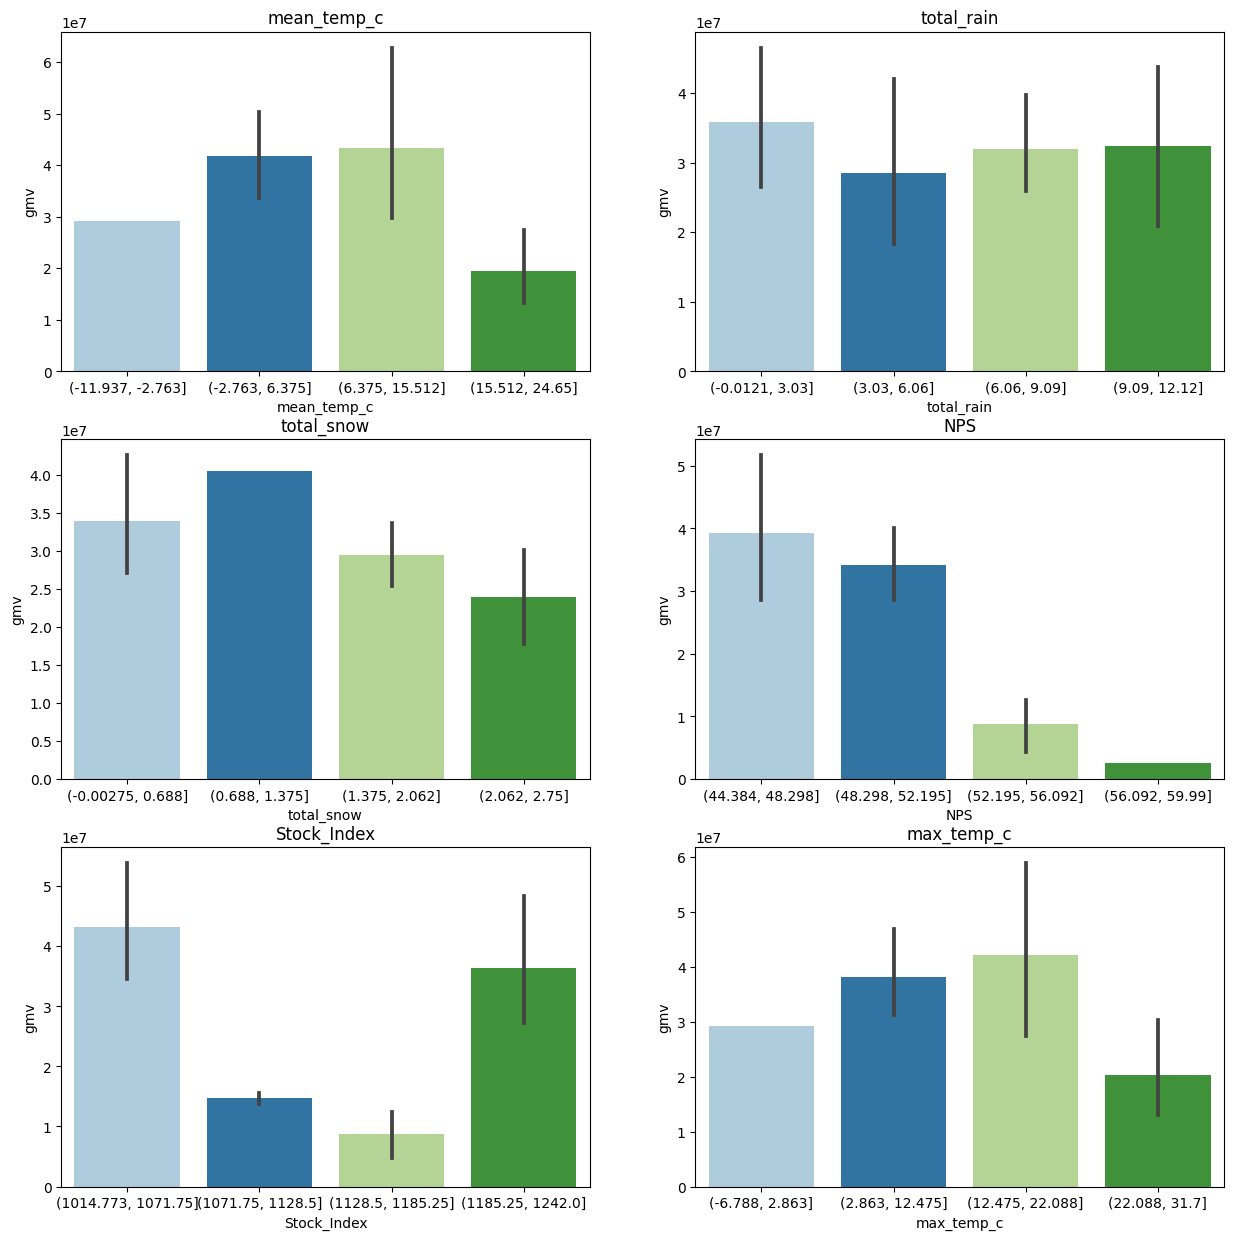

In [1056]:
wc = ['mean_temp_c', 'total_rain', 'total_snow','NPS',"Stock_Index",'max_temp_c']

plt.figure(figsize=(15, 15))
x=1
for i in wc:
  plt.subplot(3,2,x)
  plt.title(i)
  sns.barplot(y=camera_wk['gmv'],x=pd.cut(camera_wk[i],bins=4))
  x=x+1

## total rain , stock index looks no pattern

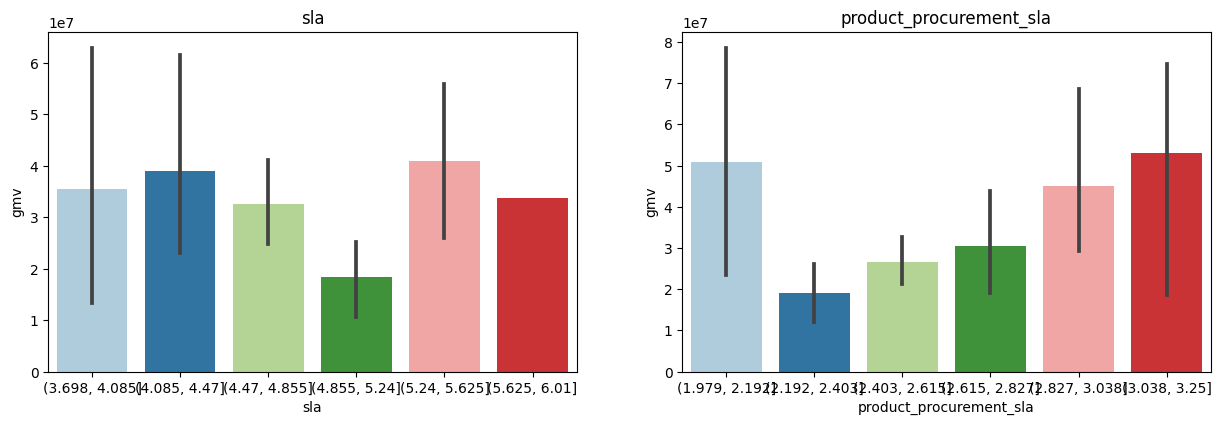

In [1057]:
wc = ['sla','product_procurement_sla']

plt.figure(figsize=(15, 15))
x=1
for i in wc:
  plt.subplot(3,2,x)
  plt.title(i)
  sns.barplot(y=camera_wk['gmv'],x=pd.cut(camera_wk[i],bins=6))
  x=x+1

# product procurement sla has a pattern , less days probably are cheap products and getting sold out at high number and then high priced product
# taking high procurement time and high gmv
# but doesnt look like a reason of impact

In [1158]:
camera_wk['sales_per']=(camera_wk['num_of_sales'])/7
camera_wk.drop('num_of_sales',1,inplace=True)

<Axes: >

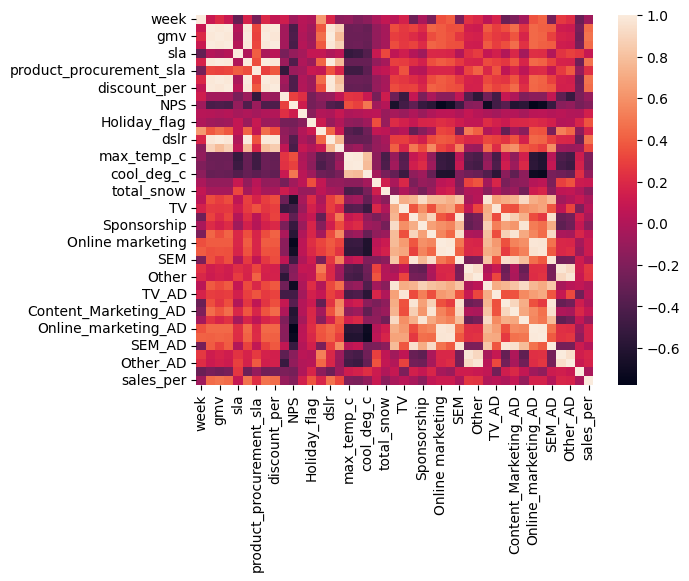

In [890]:
# camera_wk.corr()[camera_wk.corr()>0.5]

sns.heatmap(camera_wk.corr())


In [1159]:
camera_wk.columns
camera_wk.drop([ 'Total Investment', 'TV', 'Digital',
       'Sponsorship', 'Content Marketing', 'Online marketing', 'Affiliates',
       'SEM', 'Radio', 'Other'],1,inplace=True)

Camera Modeling


In [1160]:

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


In [546]:
camera_wk.isnull().sum()
# camera_wk.drop(['NPS'],1,inplace=True)

week                       0
order_count                0
gmv                        0
units                      0
sla                        0
product_mrp                0
product_procurement_sla    0
listing_price              0
discount_per               0
Stock_Index                0
NPS                        0
pay_day_in_wk              0
Holiday_flag               0
num_of_sales               0
Others                     0
dslr                       0
point & shoot              0
max_temp_c                 0
mean_temp_c                0
cool_deg_c                 0
total_rain                 0
total_snow                 0
Total_Investment_AD        0
TV_AD                      0
Digital_AD                 0
Content_Marketing_AD       0
Sponsorship_AD             0
Online_marketing_AD        0
Affiliates_AD              0
SEM_AD                     0
Radio_AD                   0
Other_AD                   0
cod_per                    0
dtype: int64

In [1161]:
camera_wk.drop(['units','order_count','product_mrp','week'],1,inplace=True)

In [1162]:
## dropping other variables who doesnt look like havong an impact from analysis done above
# total rain, nps,tv , online marketing , affliates , radio and other ads doesnt seems impacting the sales much
camera_wk.drop(['Other_AD','total_rain','listing_price','Others'],1,inplace=True)

In [1163]:
camera_wk.drop('Holiday_flag',1,inplace=True)
camera_wk.drop('cool_deg_c',1,inplace=True)

In [1164]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(camera_wk, train_size = 0.7, test_size = 0.3, random_state = 100)

In [1165]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

df_train[df_train.columns]=scaler.fit_transform(df_train[df_train.columns])
# df_train

In [1166]:
X_train=df_train.drop('gmv',1)
y_train=df_train['gmv']
# X_train

In [1132]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [1133]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary

def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [1167]:
## as variables are more than observations check RFE method
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=15, step=1)

In [1168]:
selector.fit(X_train, y_train)

# print(selector.support_)
# print(selector.ranking_)
df=pd.DataFrame(list(zip(X_train.columns,selector.support_,selector.ranking_)))
features =X_train.columns[selector.support_]
features


Index(['sla', 'product_procurement_sla', 'discount_per', 'Stock_Index', 'NPS',
       'pay_day_in_wk', 'dslr', 'point & shoot', 'TV_AD', 'Digital_AD',
       'Content_Marketing_AD', 'Online_marketing_AD', 'SEM_AD', 'cod_per',
       'sales_per'],
      dtype='object')

In [1070]:
list(features)

['discount_per',
 'Stock_Index',
 'NPS',
 'pay_day_in_wk',
 'dslr',
 'point & shoot',
 'max_temp_c',
 'mean_temp_c',
 'TV_AD',
 'Digital_AD',
 'Content_Marketing_AD',
 'Online_marketing_AD',
 'SEM_AD',
 'cod_per',
 'sales_per']

In [1169]:
x_train_m =build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     3575.
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           1.62e-29
Time:                        11:21:11   Log-Likelihood:                 146.23
No. Observations:                  35   AIC:                            -260.5
Df Residuals:                      19   BIC:                            -235.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features     VIF
2              discount_per  624.91
6                      dslr  383.03
12                   SEM_AD  230.22
9                Digital_AD  141.23
10     Content_Marketing_AD   93.75
11      Online_marketing_AD   92.30
7             point & shoot   60.14
8                     TV_AD   21.52
1   product_procurement_sla   20.44
13                  cod_per   20.01
3               Stock_Index   17.96
0                       sla   13.58
4                       NPS   12.43
5             pay_day_in_wk    2.85
14                sales_per    2.16

In [1170]:
features=features.drop('dslr',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     89.66
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           6.62e-15
Time:                        11:21:15   Log-Likelihood:                 79.893
No. Observations:                  35   AIC:                            -129.8
Df Residuals:                      20   BIC:                            -106.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features     VIF
11                   SEM_AD  206.09
8                Digital_AD  136.10
10      Online_marketing_AD   82.86
9      Content_Marketing_AD   80.19
2              discount_per   22.97
7                     TV_AD   21.01
6             point & shoot   19.83
3               Stock_Index   17.85
1   product_procurement_sla   17.18
12                  cod_per   15.34
0                       sla   13.12
4                       NPS   11.52
5             pay_day_in_wk    2.84
13                sales_per    2.16

In [1171]:

features=features.drop('SEM_AD')
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])



                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     89.10
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           2.39e-15
Time:                        11:21:27   Log-Likelihood:                 77.671
No. Observations:                  35   AIC:                            -127.3
Df Residuals:                      21   BIC:                            -105.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
10      Online_marketing_AD  72.08
9      Content_Marketing_AD  57.02
8                Digital_AD  39.76
7                     TV_AD  20.13
3               Stock_Index  17.81
2              discount_per  17.58
1   product_procurement_sla  17.16
6             point & shoot  15.28
11                  cod_per  14.67
4                       NPS  10.83
0                       sla   9.79
5             pay_day_in_wk   2.72
12                sales_per   2.14

In [1172]:
features=features.drop('Stock_Index',1)
X_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])



                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     100.7
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           2.39e-16
Time:                        11:21:44   Log-Likelihood:                 77.606
No. Observations:                  35   AIC:                            -129.2
Df Residuals:                      22   BIC:                            -109.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
8      Content_Marketing_AD  48.45
9       Online_marketing_AD  35.58
7                Digital_AD  31.24
2              discount_per  17.31
5             point & shoot  15.26
10                  cod_per  14.40
6                     TV_AD  12.61
1   product_procurement_sla  11.57
0                       sla   9.79
3                       NPS   7.53
4             pay_day_in_wk   2.66
11                sales_per   2.13

In [1173]:
features=features.drop('Digital_AD')
X_train_m==build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     114.4
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           2.26e-17
Time:                        11:21:55   Log-Likelihood:                 77.535
No. Observations:                  35   AIC:                            -131.1
Df Residuals:                      23   BIC:                            -112.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
8       Online_marketing_AD  22.46
2              discount_per  16.93
9                   cod_per  14.30
5             point & shoot  14.03
1   product_procurement_sla  10.96
0                       sla   9.30
6                     TV_AD   8.70
7      Content_Marketing_AD   4.98
3                       NPS   4.46
4             pay_day_in_wk   2.45
10                sales_per   2.10

In [1174]:
features=features.drop('cod_per')
X_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     120.0
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           5.47e-18
Time:                        11:22:03   Log-Likelihood:                 75.985
No. Observations:                  35   AIC:                            -130.0
Df Residuals:                      24   BIC:                            -112.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
8      Online_marketing_AD  17.46
2             discount_per  14.31
5            point & shoot  12.79
1  product_procurement_sla  10.13
0                      sla   9.24
6                    TV_AD   8.46
7     Content_Marketing_AD   4.95
3                      NPS   3.02
4            pay_day_in_wk   2.45
9                sales_per   2.08

In [1175]:
features=features.drop('product_procurement_sla')
X_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])



                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     117.9
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           3.27e-18
Time:                        11:22:14   Log-Likelihood:                 73.179
No. Observations:                  35   AIC:                            -126.4
Df Residuals:                      25   BIC:                            -110.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0438 

Features    VIF
7   Online_marketing_AD  16.90
4         point & shoot  11.40
1          discount_per  10.70
5                 TV_AD   6.99
0                   sla   6.29
6  Content_Marketing_AD   4.92
2                   NPS   2.81
3         pay_day_in_wk   2.43
8             sales_per   2.08

In [1176]:
features=features.drop('pay_day_in_wk')
X_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])



                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     137.9
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           2.67e-19
Time:                        11:22:20   Log-Likelihood:                 73.179
No. Observations:                  35   AIC:                            -128.4
Df Residuals:                      26   BIC:                            -114.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0439 

Features    VIF
6   Online_marketing_AD  16.06
3         point & shoot  10.67
1          discount_per   9.83
4                 TV_AD   6.37
0                   sla   6.29
5  Content_Marketing_AD   4.81
2                   NPS   2.53
7             sales_per   1.95

In [1177]:
features=features.drop('NPS')
X_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])



                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     163.4
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           2.05e-20
Time:                        11:22:31   Log-Likelihood:                 73.145
No. Observations:                  35   AIC:                            -130.3
Df Residuals:                      27   BIC:                            -117.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0518 

Features    VIF
5   Online_marketing_AD  15.73
1          discount_per   9.44
2         point & shoot   9.38
3                 TV_AD   6.37
0                   sla   5.43
4  Content_Marketing_AD   3.79
6             sales_per   1.94

In [1178]:
features=features.drop('sales_per')
X_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])



                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     195.7
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           1.58e-21
Time:                        11:22:42   Log-Likelihood:                 72.975
No. Observations:                  35   AIC:                            -131.9
Df Residuals:                      28   BIC:                            -121.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0516 

Features    VIF
5   Online_marketing_AD  15.23
2         point & shoot   9.37
1          discount_per   8.64
3                 TV_AD   6.21
0                   sla   5.40
4  Content_Marketing_AD   3.64

In [1179]:
features=features.drop('point & shoot')
X_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])



                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     231.5
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           1.93e-22
Time:                        11:22:48   Log-Likelihood:                 72.125
No. Observations:                  35   AIC:                            -132.3
Df Residuals:                      29   BIC:                            -122.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0424 

Features    VIF
4   Online_marketing_AD  14.82
2                 TV_AD   6.20
0                   sla   5.07
3  Content_Marketing_AD   2.90
1          discount_per   2.83

In [1180]:
lm = sm.OLS(y_train,X_train[features]).fit() # fitting the model
print(lm.summary()) # model summary
y_train_pred=lm.predict(X_train[features])


                                 OLS Regression Results                                
Dep. Variable:                    gmv   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              458.7
Date:                Sun, 08 Oct 2023   Prob (F-statistic):                    2.23e-27
Time:                        11:22:54   Log-Likelihood:                          68.584
No. Observations:                  35   AIC:                                     -127.2
Df Residuals:                      30   BIC:                                     -119.4
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

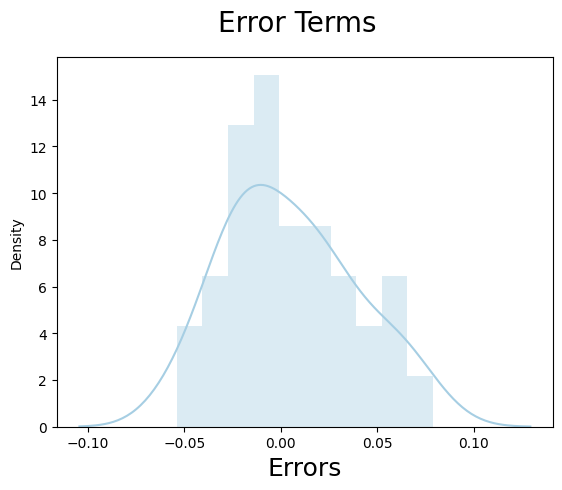

In [1181]:
fig=plt.figure()
sns.distplot((y_train-y_train_pred),bins=10)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()


Text(0, 0.5, 'y_pred')

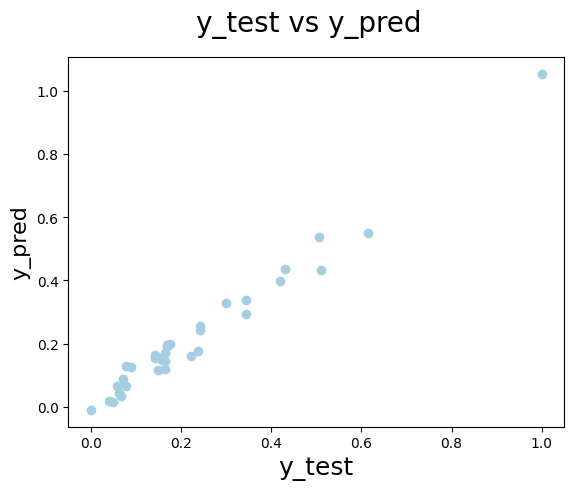

In [1182]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_train ,y_train_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

In [1183]:
## on test
df_test[df_train.columns]=scaler.fit_transform(df_test[df_train.columns])
X_test=df_test.drop('gmv',1)
y_test=df_test['gmv']
X_test=sm.add_constant(X_test)
X_test=X_test[features]

In [1184]:
y_test_pred=lm.predict(X_test)

Text(0, 0.5, 'y_test_pred')

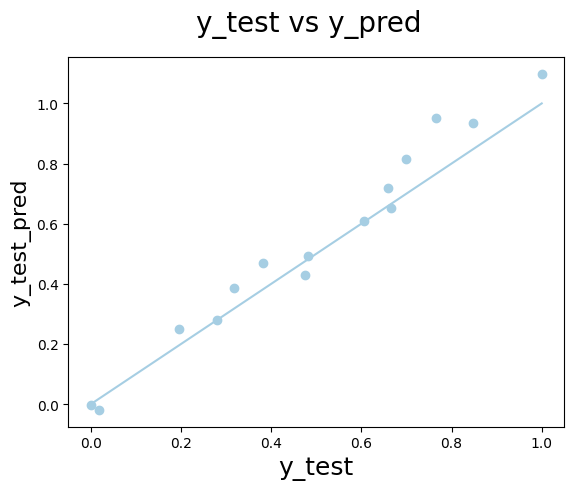

In [1185]:
# Plotting y_test and y_pred to understand the spread

fig,ax = plt.subplots()
ax.scatter(y_test, y_test_pred )
fig.suptitle('y_test vs y_pred', fontsize = 20)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])#,  lw=1)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

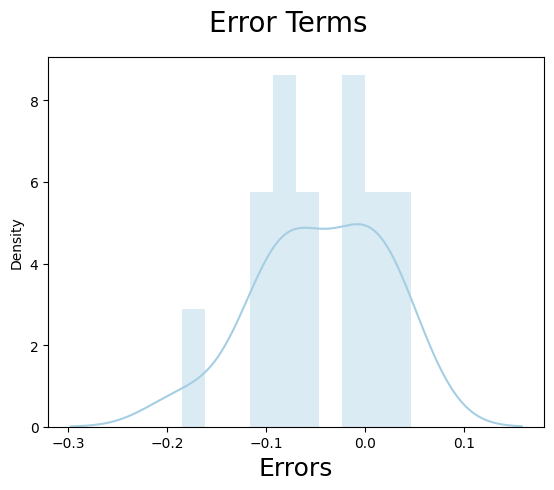

In [1186]:
fig=plt.figure()
sns.distplot((y_test-y_test_pred),bins=10)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()


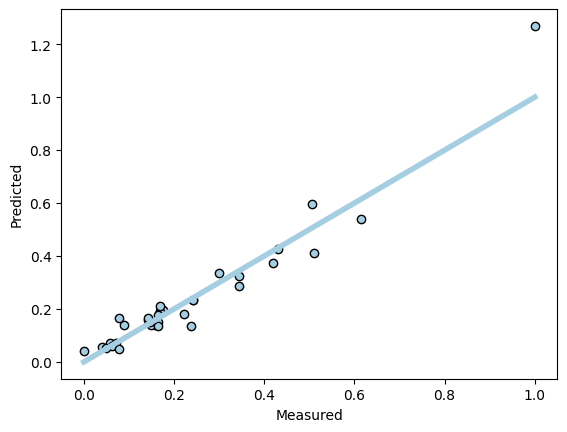

In [1187]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

f = KFold(n_splits = 10, shuffle = True, random_state = 100)
lm=LinearRegression()
scores = cross_val_score(lm, X_train[features], y_train, scoring='r2', cv=f)
scores
y_pred = cross_val_predict(lm, X_train[features], y_train, cv=f)



fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],  lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

Multiplicative

In [113]:

# camera_wk=camera.groupby(['week']).agg({"order_item_id":"nunique",'gmv':'sum','units':'sum','order_payment_type':'sum','sla':'mean',
#                                         'product_mrp':'sum','product_procurement_sla':'mean','listing_price':'sum',
#                                          'discount_per':'sum','Stock_Index':'max','NPS':'max','pay_date_flag':'max',
#                                           'sale_date':"nunique"}).round(2)

# camera_wk=pd.merge(camera_wk,weekly_kpis,on='week')


# camera_wk.drop(['heat_deg_c','mon_temp_c','Year','Month','Day','Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing',
#        'Online marketing', 'Affiliates', 'SEM', 'Radio', 'Other'],1,inplace=True)

# # camera_wk.sale_date.value_counts()
# camera_wk.rename(columns={'order_item_id':'order_count',"order_payment_type":"order_payment_cod",'mon_temp_c':"min_temp_c","pay_date_flag":"pay_day_in_wk"},inplace=True)
# camera_wk["cod_per"]=camera_wk["order_payment_cod"]/camera_wk["order_count"]
# camera_wk.drop("order_payment_cod",1,inplace=True)
# camera_wk.rename(columns={"sale_date":"num_of_sales"},inplace=True)
# camera_wk['sales_per']=((camera_wk['num_of_sales']-1)/7)*100
# camera_wk.drop('num_of_sales',1,inplace=True)

In [114]:

# camera_wk.drop(['units','order_count','product_mrp'],1,inplace=True)
# camera_wk.drop(['Other_AD','Radio_AD','Online_marketing_AD','Affiliates_AD','total_rain','NPS'],1,inplace=True)
# camera_wk.drop(['sla','product_procurement_sla'],1,inplace=True)
# camera_wk.drop('cool_deg_c',1,inplace=True)

In [1188]:
camera_wk[camera_wk.columns]=nm.log(camera_wk[camera_wk.columns])
# camera_wk.columns

In [1189]:
camera_wk.describe()

camera_wk=camera_wk.replace([nm.inf, -nm.inf], 0)
camera_wk=camera_wk.fillna(0)



In [1229]:
df_train, df_test = train_test_split(camera_wk, train_size = 0.7, test_size = 0.3, random_state = 100)

In [1230]:
df_train[df_train.columns]=scaler.fit_transform(df_train[df_train.columns])
X_train=df_train.drop('gmv',1)
y_train=df_train['gmv']
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=15, step=1)
selector.fit(X_train, y_train)
# X_train.columns
#
df=pd.DataFrame(list(zip(X_train.columns,selector.support_,selector.ranking_)))
features =X_train.columns[selector.support_]
features


Index(['sla', 'product_procurement_sla', 'discount_per', 'NPS', 'dslr',
       'point & shoot', 'mean_temp_c', 'TV_AD', 'Digital_AD',
       'Content_Marketing_AD', 'Online_marketing_AD', 'Affiliates_AD',
       'Radio_AD', 'cod_per', 'sales_per'],
      dtype='object')

In [1231]:
m1=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     374.3
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           3.17e-20
Time:                        11:31:14   Log-Likelihood:                 105.90
No. Observations:                  35   AIC:                            -179.8
Df Residuals:                      19   BIC:                            -154.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features       VIF
11            Affiliates_AD  19407.54
10      Online_marketing_AD  17042.18
2              discount_per   1178.33
4                      dslr   1007.31
7                     TV_AD    262.63
5             point & shoot     76.28
13                  cod_per     57.28
9      Content_Marketing_AD     28.45
0                       sla     26.09
1   product_procurement_sla     17.73
3                       NPS     17.16
6               mean_temp_c     15.04
14                sales_per     10.28
8                Digital_AD      9.84
12                 Radio_AD      9.63

In [1232]:
features=features.drop('Affiliates_AD',1)
m1=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     420.3
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           1.56e-21
Time:                        11:31:20   Log-Likelihood:                 105.82
No. Observations:                  35   AIC:                            -181.6
Df Residuals:                      20   BIC:                            -158.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features      VIF
2              discount_per  1174.74
4                      dslr  1003.61
10      Online_marketing_AD   210.39
7                     TV_AD   167.14
5             point & shoot    76.26
12                  cod_per    54.71
0                       sla    25.47
9      Content_Marketing_AD    25.00
1   product_procurement_sla    17.72
6               mean_temp_c    12.18
8                Digital_AD     9.74
13                sales_per     9.64
11                 Radio_AD     8.74
3                       NPS     7.94

In [1233]:
features=features.drop('dslr',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     239.8
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           8.70e-20
Time:                        11:31:28   Log-Likelihood:                 93.908
No. Observations:                  35   AIC:                            -159.8
Df Residuals:                      21   BIC:                            -138.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features     VIF
9       Online_marketing_AD  188.88
6                     TV_AD  166.75
2              discount_per   61.24
4             point & shoot   49.79
11                  cod_per   39.38
8      Content_Marketing_AD   20.73
0                       sla   20.52
1   product_procurement_sla   16.74
5               mean_temp_c   12.14
7                Digital_AD    9.68
12                sales_per    9.60
10                 Radio_AD    8.43
3                       NPS    6.30

In [1234]:
features=features.drop('sales_per',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     272.1
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           5.12e-21
Time:                        11:31:47   Log-Likelihood:                 93.906
No. Observations:                  35   AIC:                            -161.8
Df Residuals:                      22   BIC:                            -141.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features     VIF
9       Online_marketing_AD  185.86
6                     TV_AD  159.96
4             point & shoot   49.33
2              discount_per   49.28
11                  cod_per   35.62
8      Content_Marketing_AD   20.21
1   product_procurement_sla   16.61
0                       sla   15.66
5               mean_temp_c   12.13
7                Digital_AD    9.62
10                 Radio_AD    8.37
3                       NPS    6.16

In [1235]:
features=features.drop('point & shoot',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     309.3
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           2.91e-22
Time:                        11:32:06   Log-Likelihood:                 93.849
No. Observations:                  35   AIC:                            -163.7
Df Residuals:                      23   BIC:                            -145.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features     VIF
8       Online_marketing_AD  182.75
5                     TV_AD  158.70
10                  cod_per   33.01
7      Content_Marketing_AD   19.89
2              discount_per   19.30
1   product_procurement_sla   16.12
0                       sla   12.54
4               mean_temp_c    9.44
6                Digital_AD    9.25
9                  Radio_AD    8.24
3                       NPS    4.70

In [1236]:
features=features.drop('Radio_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     350.4
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           1.75e-23
Time:                        11:32:15   Log-Likelihood:                 93.620
No. Observations:                  35   AIC:                            -165.2
Df Residuals:                      24   BIC:                            -148.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features     VIF
8      Online_marketing_AD  180.05
5                    TV_AD  157.95
9                  cod_per   29.81
7     Content_Marketing_AD   19.72
2             discount_per   18.84
1  product_procurement_sla   16.00
0                      sla   12.50
4              mean_temp_c    9.44
6               Digital_AD    8.52
3                      NPS    4.53

In [1237]:
features=features.drop('TV_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     395.3
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           1.14e-24
Time:                        11:32:33   Log-Likelihood:                 93.178
No. Observations:                  35   AIC:                            -166.4
Df Residuals:                      25   BIC:                            -150.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
8                  cod_per  29.76
7      Online_marketing_AD  29.16
2             discount_per  16.75
6     Content_Marketing_AD  14.46
0                      sla  12.48
1  product_procurement_sla   9.99
4              mean_temp_c   9.26
5               Digital_AD   6.35
3                      NPS   4.52

In [1238]:
features=features.drop('product_procurement_sla',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     423.0
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           1.61e-25
Time:                        11:32:43   Log-Likelihood:                 91.625
No. Observations:                  35   AIC:                            -165.3
Df Residuals:                      26   BIC:                            -151.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1689 

Features    VIF
7               cod_per  29.71
6   Online_marketing_AD  29.14
1          discount_per  14.91
5  Content_Marketing_AD  13.92
0                   sla  11.74
3           mean_temp_c   8.17
4            Digital_AD   6.16
2                   NPS   4.42

In [1239]:
features=features.drop('Content_Marketing_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     455.6
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           2.52e-26
Time:                        11:32:57   Log-Likelihood:                 89.943
No. Observations:                  35   AIC:                            -163.9
Df Residuals:                      27   BIC:                            -151.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2130    

Features    VIF
5  Online_marketing_AD  24.55
6              cod_per  23.61
1         discount_per  13.79
0                  sla  10.23
3          mean_temp_c   8.17
4           Digital_AD   4.83
2                  NPS   4.42

In [1241]:
lm_m = sm.OLS(y_train,X_train[features]).fit() # fitting the model
print(lm_m.summary()) # model summary
y_train_pred=lm_m.predict(X_train[features])
features


                                 OLS Regression Results                                
Dep. Variable:                    gmv   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                              2333.
Date:                Sun, 08 Oct 2023   Prob (F-statistic):                    5.45e-37
Time:                        11:33:21   Log-Likelihood:                          81.758
No. Observations:                  35   AIC:                                     -149.5
Df Residuals:                      28   BIC:                                     -138.6
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

Index(['sla', 'discount_per', 'NPS', 'mean_temp_c', 'Digital_AD',
       'Online_marketing_AD', 'cod_per'],
      dtype='object')

Mean_Squared_Error : 0.0005477077333654981
r_square_value : 0.986600212043675


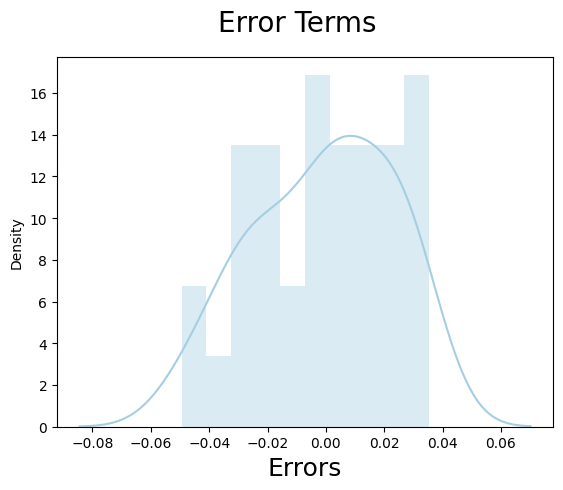

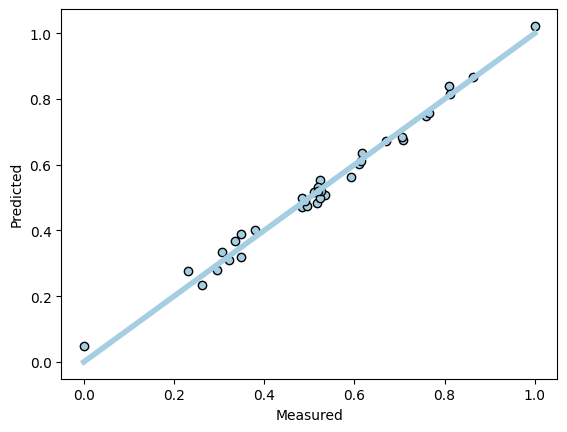

In [1242]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_train, y_train_pred)
r_squared = r2_score(y_train, y_train_pred)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

fig=plt.figure()
sns.distplot((y_train-y_train_pred),bins=10)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()


fig, ax = plt.subplots()
ax.scatter(y_train, y_train_pred, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],  lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [1243]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

f = KFold(n_splits = 10, shuffle = True, random_state = 100)
lm=LinearRegression()
scores = cross_val_score(lm, X_train[features], y_train, scoring='r2', cv=f)
scores
y_pred = cross_val_predict(lm, X_train[features], y_train, cv=f)
scores


array([0.59440914, 0.99032149, 0.97240786, 0.96776134, 0.9877075 ,
       0.82396576, 0.97023196, 0.97251027, 0.96655574, 0.9851865 ])

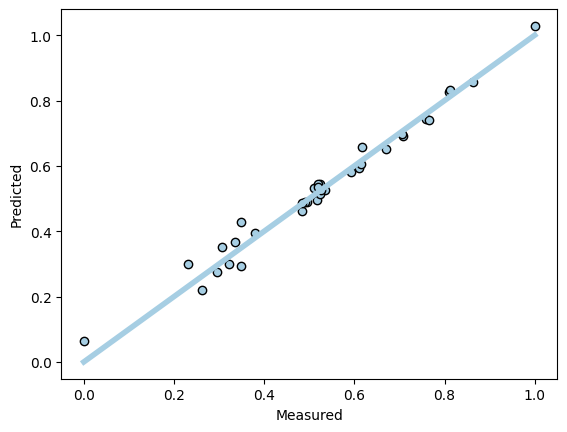

In [1244]:

fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],  lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [1245]:
df_test[df_test.columns]=scaler.fit_transform(df_test[df_test.columns])
X_test=df_test.drop('gmv',1)
y_test=df_test['gmv']


In [1249]:
y_test_pred= lm_m.predict(X_test[features])

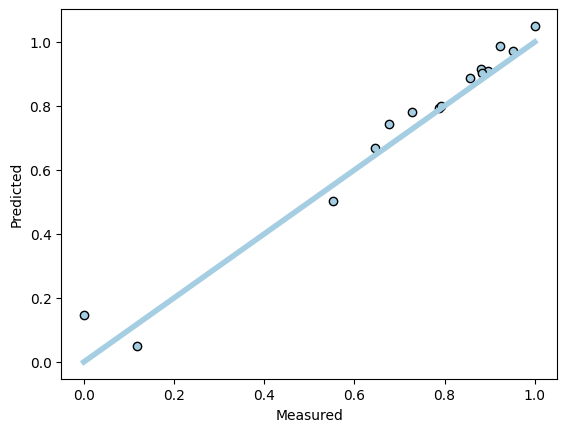

In [1250]:
y_test.min()
y_test.max()
fig, ax = plt.subplots()
ax.scatter(y_test, y_test_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

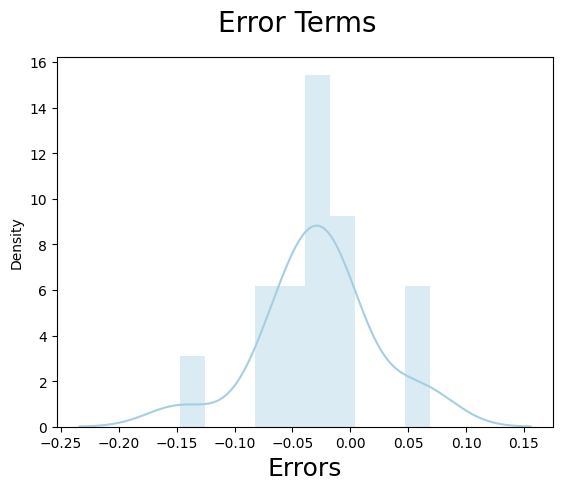

In [1251]:
fig=plt.figure()
sns.distplot((y_test-y_test_pred),bins=10)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()

In [1252]:
cam_features =features
cam_features

Index(['sla', 'discount_per', 'NPS', 'mean_temp_c', 'Digital_AD',
       'Online_marketing_AD', 'cod_per'],
      dtype='object')

# Home Audio

In [1253]:
##
ha=EleData3[EleData3.product_analytic_sub_category=='homeaudio']
# camera.discount_per
# EleData3.product_analytic_sub_category.value_counts()

In [ ]:
+

In [1254]:
ha.isnull().sum()
## analysis and all pending
ha_dummies=pd.get_dummies(ha.product_analytic_vertical_derived)
ha=pd.concat([ha,ha_dummies],axis=1)

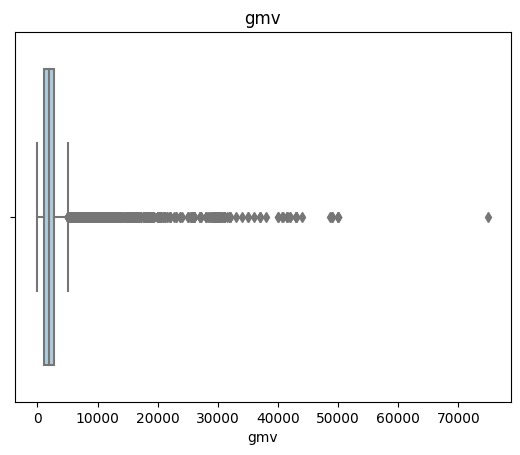

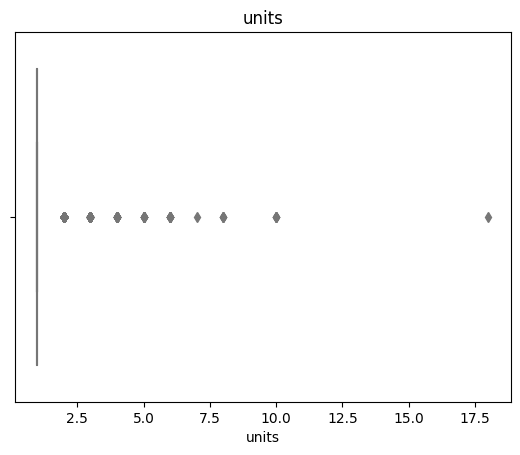

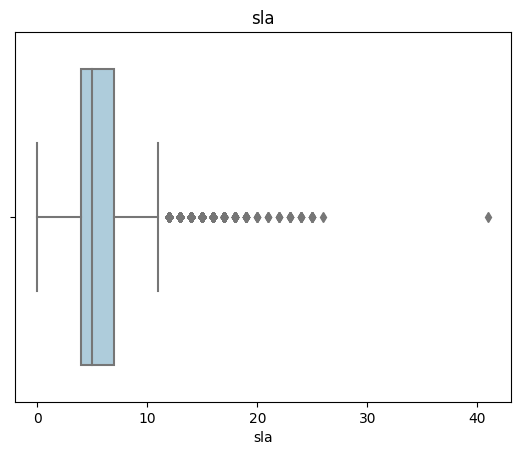

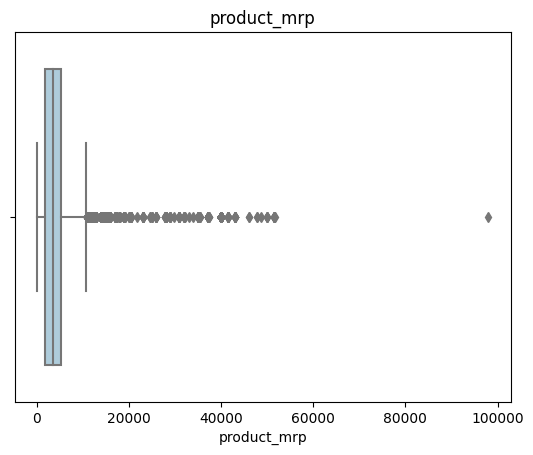

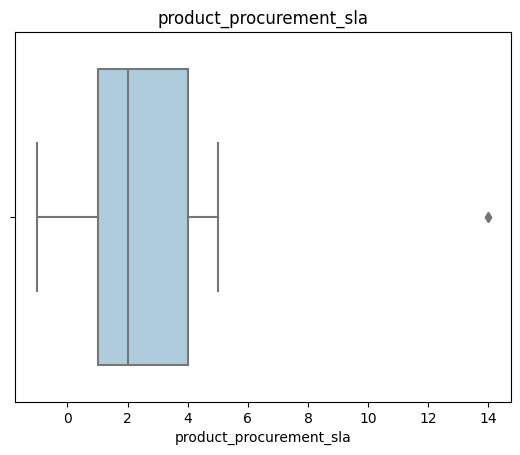

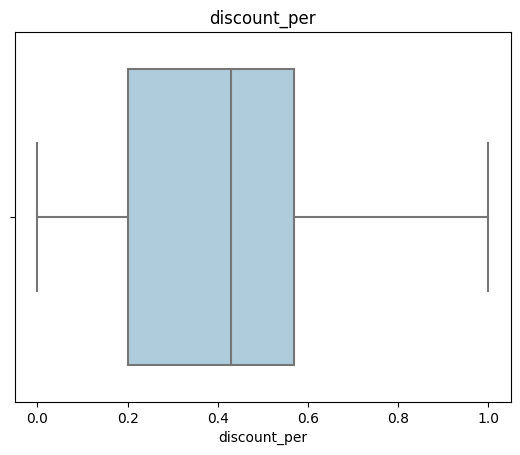

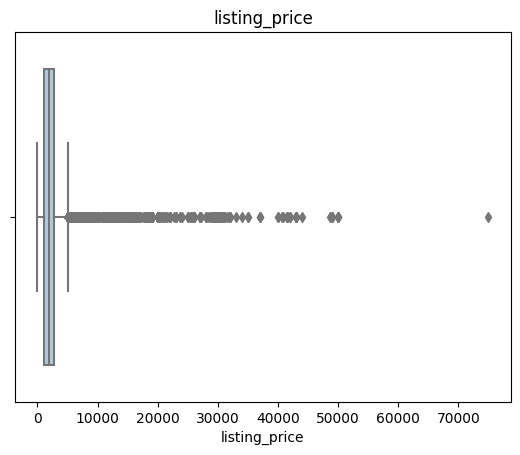

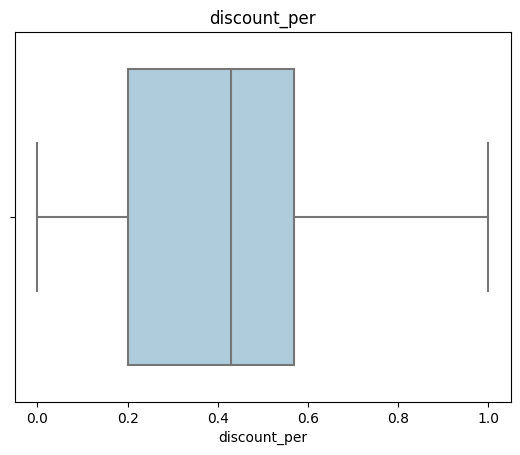

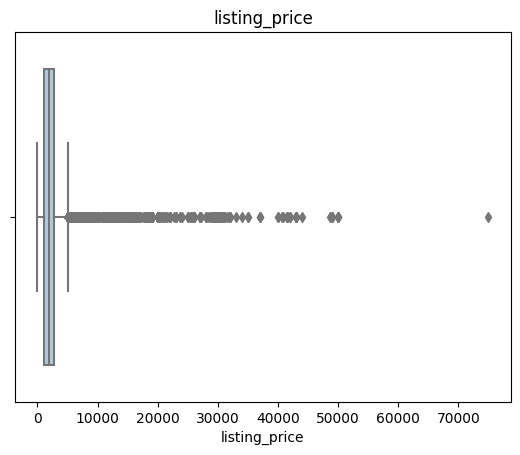

In [697]:
for i in num:
  sns.boxplot(x=ha[i])
  plt.title(i)
  plt.show()


In [1255]:


q1=ha['product_mrp'].quantile(0.25)
q3=ha['product_mrp'].quantile(0.75)
iqr=q3-q1
lw=q1-iqr*1.5
up=q3+iqr*1.5
print(lw," ",up)
# ha[ha['product_mrp']>112000]
ha.loc[ha['product_mrp']>up,'product_mrp']=up
ha.loc[ha['product_mrp']<lw,'product_mrp']=lw


q1=ha['gmv'].quantile(0.25)
q3=ha['gmv'].quantile(0.75)
iqr=q3-q1
lw=q1-iqr*1.5
up=q3+iqr*1.5
print(lw," ",up)
ha.loc[ha['gmv']>up,'gmv']=up
ha.loc[ha['gmv']<lw,'gmv']=lw


q1=ha['listing_price'].quantile(0.25)
q3=ha['listing_price'].quantile(0.75)
iqr=q3-q1
lw=q1-iqr*1.5
up=q3+iqr*1.5
print(lw," ",up)
ha.loc[ha['listing_price']>up,'listing_price']=up
ha.loc[ha['listing_price']<lw,'listing_price']=lw


q1=ha['discount_per'].quantile(0.25)
q3=ha['discount_per'].quantile(0.75)
iqr=q3-q1
lw=q1-iqr*1.5
up=q3+iqr*1.5
print(lw," ",up)
ha.loc[ha['discount_per']>up,'discount_per']=up
ha.loc[ha['discount_per']<lw,'discount_per']=lw

# ha[ha['discount_per']>1.39]
q1=ha['sla'].quantile(0.25)
q3=ha['sla'].quantile(0.75)
iqr=q3-q1
lw=q1-iqr*1.5
up=q3+iqr*1.5
print(lw," ",up)
ha.loc[ha['sla']>up,'sla']=up
ha.loc[ha['sla']<lw,'sla']=lw
q1=ha['product_procurement_sla'].quantile(0.25)
q3=ha['product_procurement_sla'].quantile(0.75)
iqr=q3-q1
lw=q1-iqr*1.5
up=q3+iqr*1.5
print(lw," ",up)
ha.loc[ha['product_procurement_sla']>up,'product_procurement_sla']=up
ha.loc[ha['product_procurement_sla']<lw,'product_procurement_sla']=lw

-3761.0   10895.0
-1309.5   5102.5
-1315.5   5072.5
-0.3549999999999999   1.125
-0.5   11.5
-3.5   8.5


In [141]:
ha.columns

Index(['order_date', 'Month', 'order_item_id', 'gmv', 'units',
       'order_payment_type', 'sla', 'product_analytic_category',
       'product_analytic_sub_category', 'product_mrp',
       'product_procurement_sla', 'product_analytic_vertical_derived', 'week',
       'listing_price', 'discount_per', 'sale_date', 'Stock_Index', 'NPS',
       'Year', 'pay_date_flag', 'Holiday_flag', 'Others', 'fmradio',
       'homeaudiospeaker'],
      dtype='object')

In [1256]:

ha_wk=ha.groupby(['week']).agg({"order_item_id":"nunique",'gmv':'sum','units':'sum','order_payment_type':'sum','sla':'mean',
                                        'product_mrp':'sum','product_procurement_sla':'mean','listing_price':'sum',
                                         'discount_per':'sum','Stock_Index':'max','NPS':'max','pay_date_flag':'max',
                                          "Holiday_flag": "nunique",'sale_date':"nunique","fmradio":"sum","homeaudiospeaker":"sum"}).round(2)

ha_wk=pd.merge(ha_wk,weekly_kpis,on='week')

ha_wk.rename(columns={"sales_date":"num_of_sales"},inplace=True)

ha_wk.drop(['heat_deg_c','mon_temp_c','Year','Month','Day','Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing',
       'Online marketing', 'Affiliates', 'SEM', 'Radio', 'Other'],1,inplace=True)

ha_wk.order_payment_type.value_counts()
ha_wk.rename(columns={'order_item_id':'order_count',"order_payment_type":"order_payment_cod",'mon_temp_c':"min_temp_c","pay_date_flag":"pay_day_in_wk"},inplace=True)
ha_wk["cod_per"]=ha_wk["order_payment_cod"]/ha_wk["order_count"]
ha_wk.drop("order_payment_cod",1,inplace=True)
ha_wk.rename(columns={'sale_date':"num_of_sales"},inplace=True)


In [1257]:
ha_wk['sales_per']=(ha_wk['num_of_sales']-1)/7
ha_wk.drop('num_of_sales',1,inplace=True)

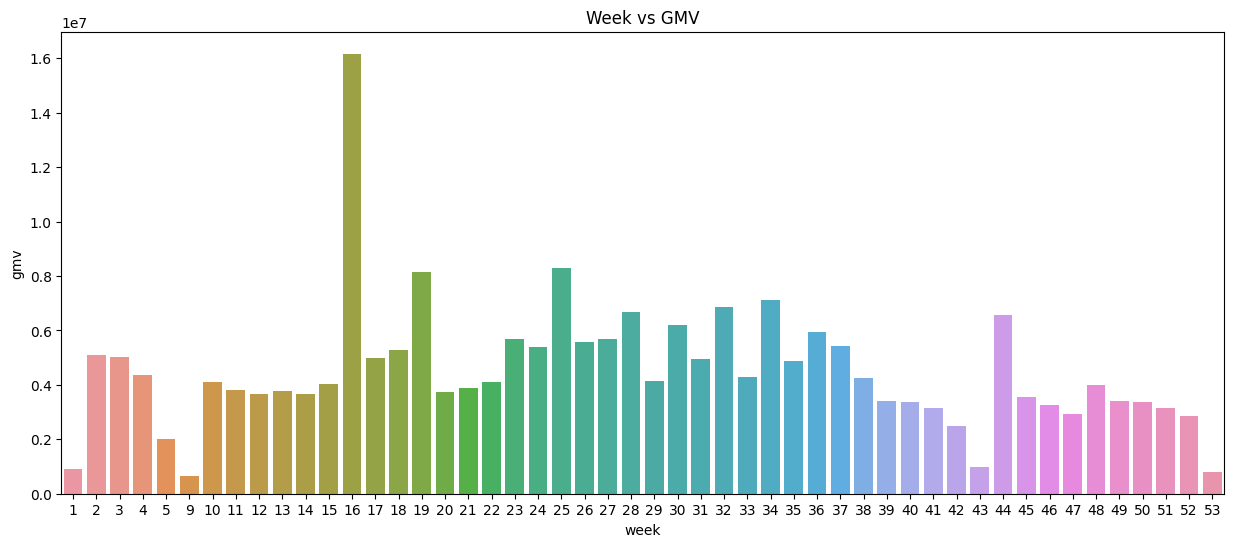

In [701]:
plt.figure(figsize=(15,6))
sns.barplot(x=ha_wk['week'],y=ha_wk['gmv'])
plt.title("Week vs GMV")
plt.show()

### 16 , 19 , 25, 30 ,32,34  ,44 week

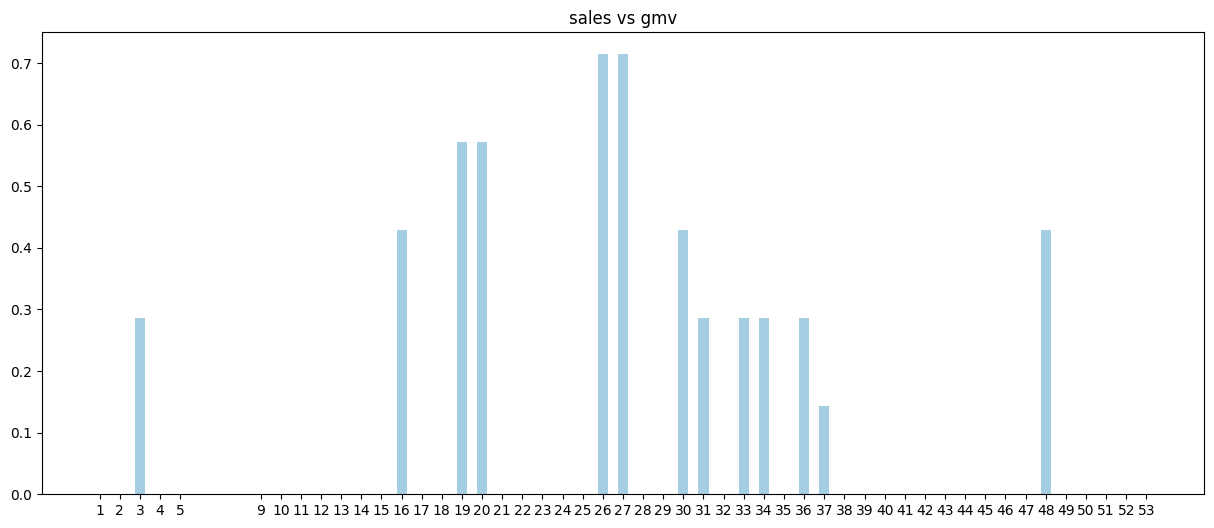

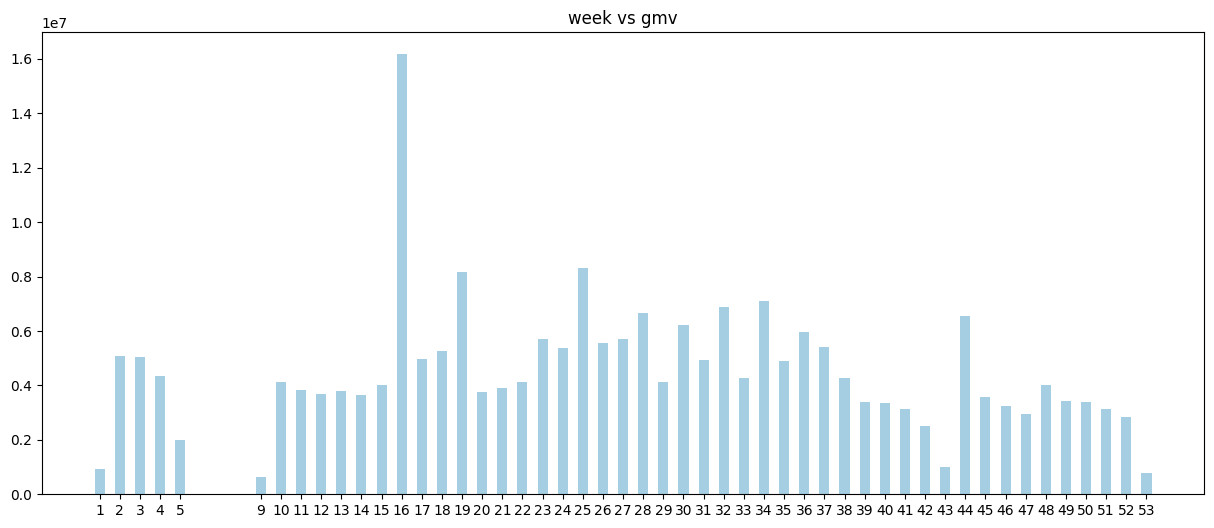

In [381]:
plt.figure(figsize=(15,6))
width=0.5
plt.bar(x=ha_wk['week'],height=ha_wk['sales_per'],width=width)
plt.xticks(ha_wk['week'])
plt.title('sales vs gmv')
plt.show()
plt.figure(figsize=(15,6))
plt.bar(x=ha_wk['week'],height=ha_wk['gmv'],width=width)
plt.xticks(ha_wk['week'])
plt.title('week vs gmv')
plt.show()


## sales 16 , 19, 20, 26,27,30,31, 33,34,48
## doesnt have much impact specially week 20 ,33,34 etc

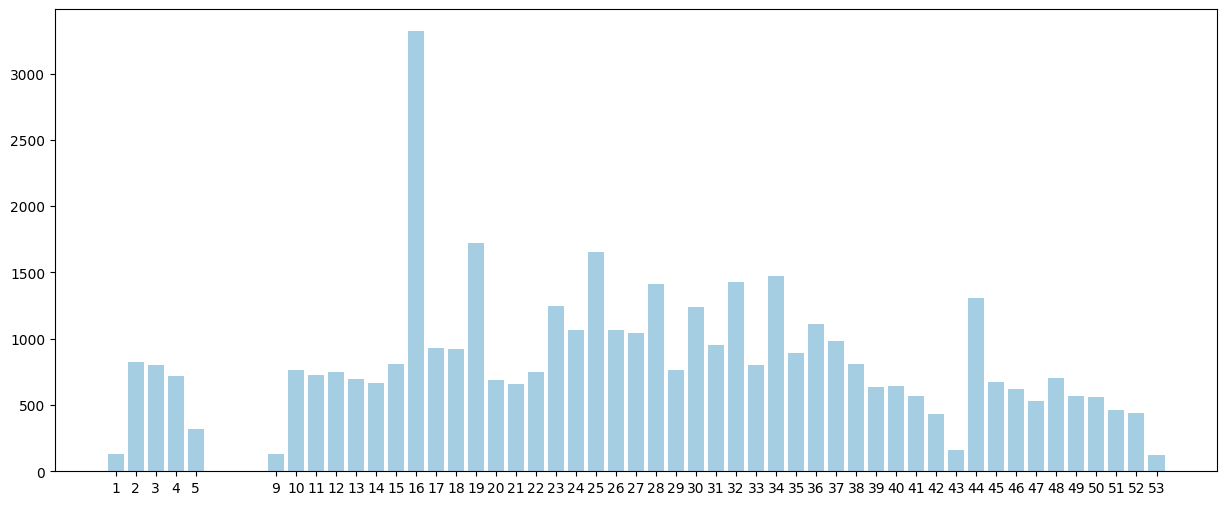

In [146]:
plt.figure(figsize=(15,6))
plt.bar(x=ha_wk['week'],height=ha_wk['discount_per'])
plt.xticks(ha_wk['week'])
plt.show()

# 16,19,23,25,28,30,32,34,44
## impacting gmv

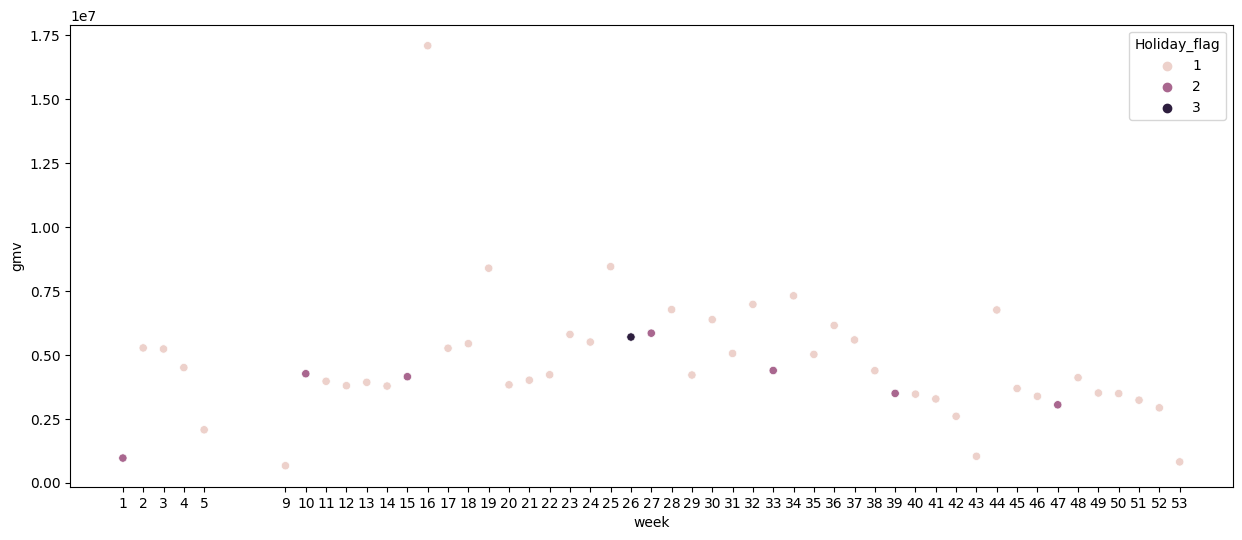

In [147]:
plt.figure(figsize=(15,6))
sns.scatterplot(x=ha_wk['week'],y=ha_wk['gmv'],hue=ha_wk['Holiday_flag'])
plt.xticks(ha_wk['week'])
plt.show()


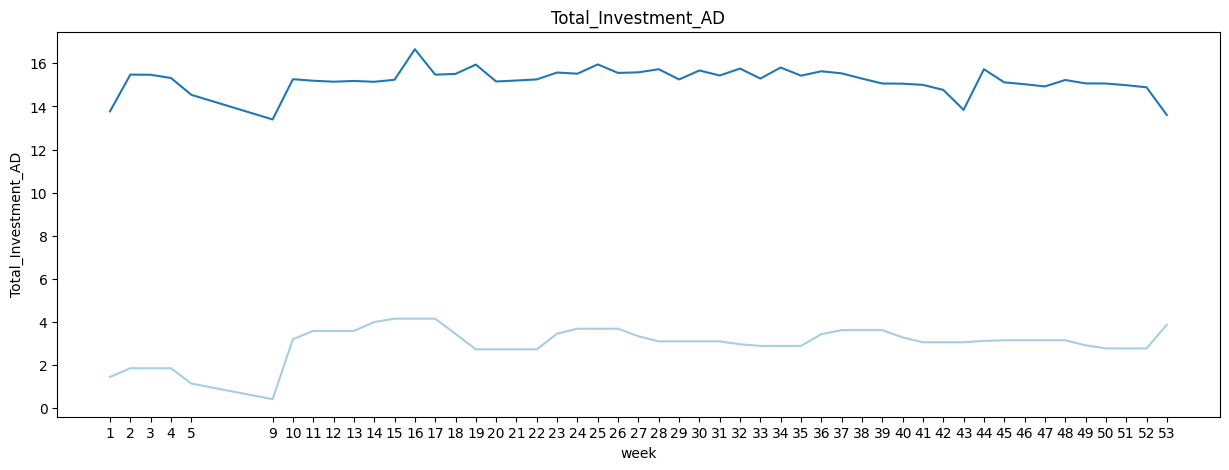

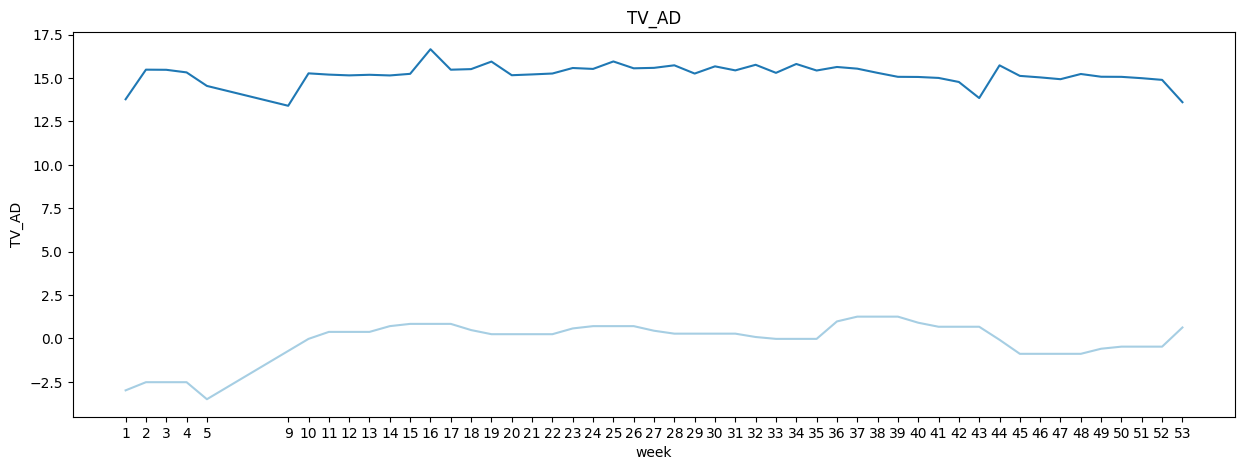

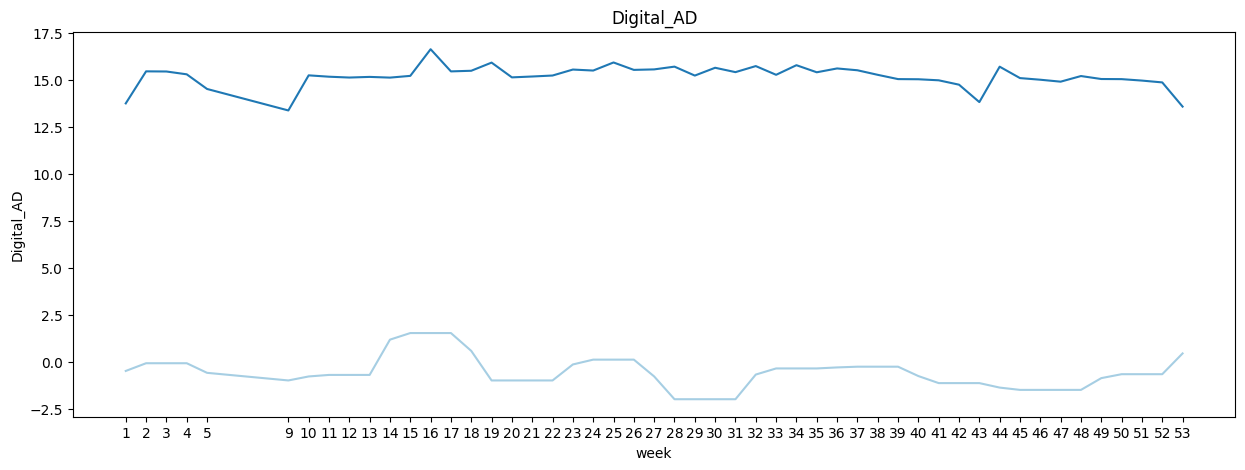

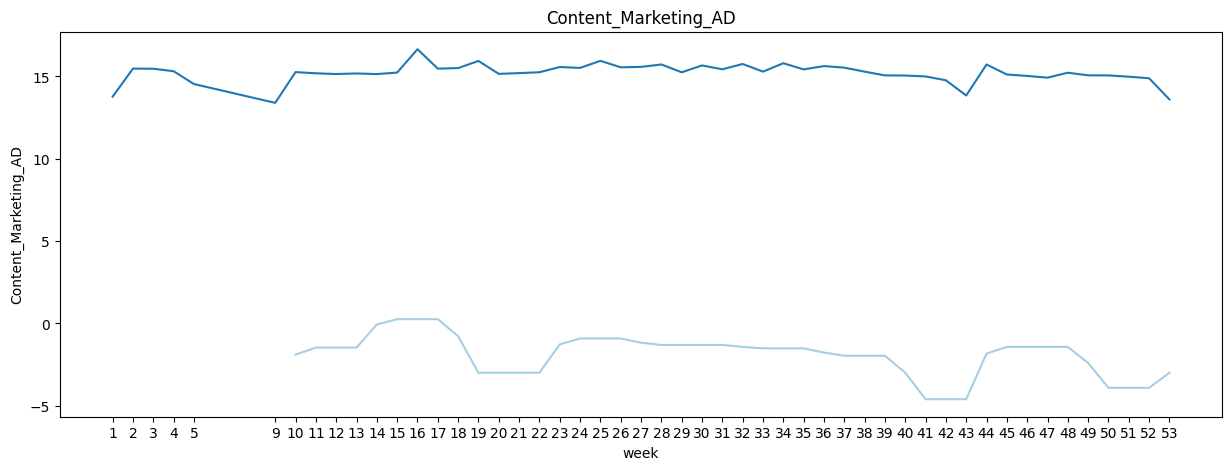

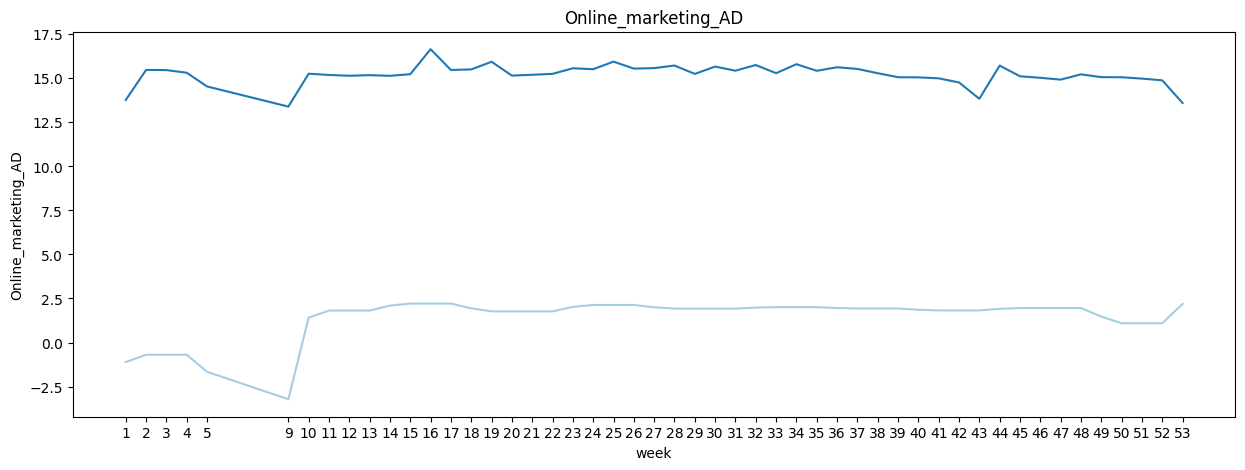

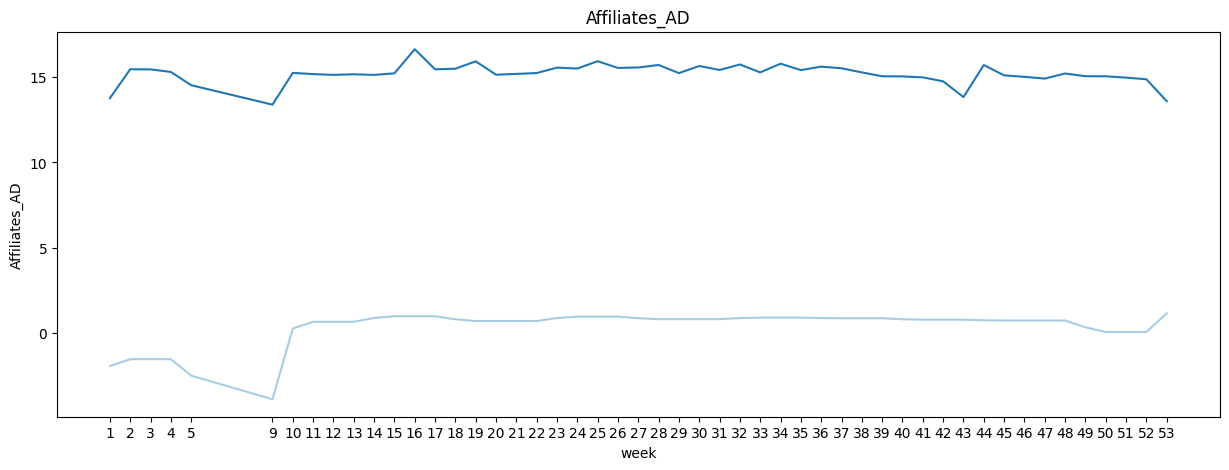

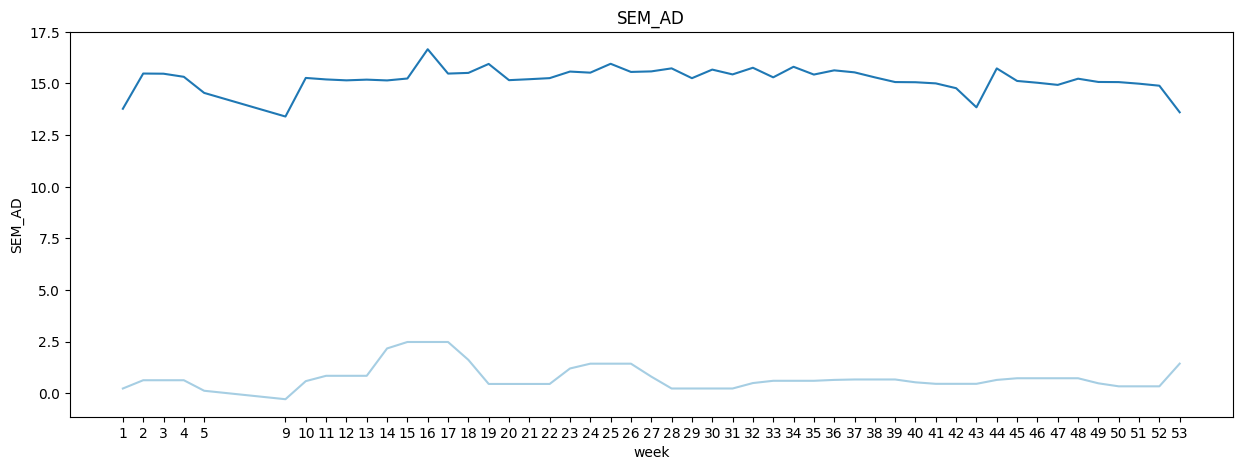

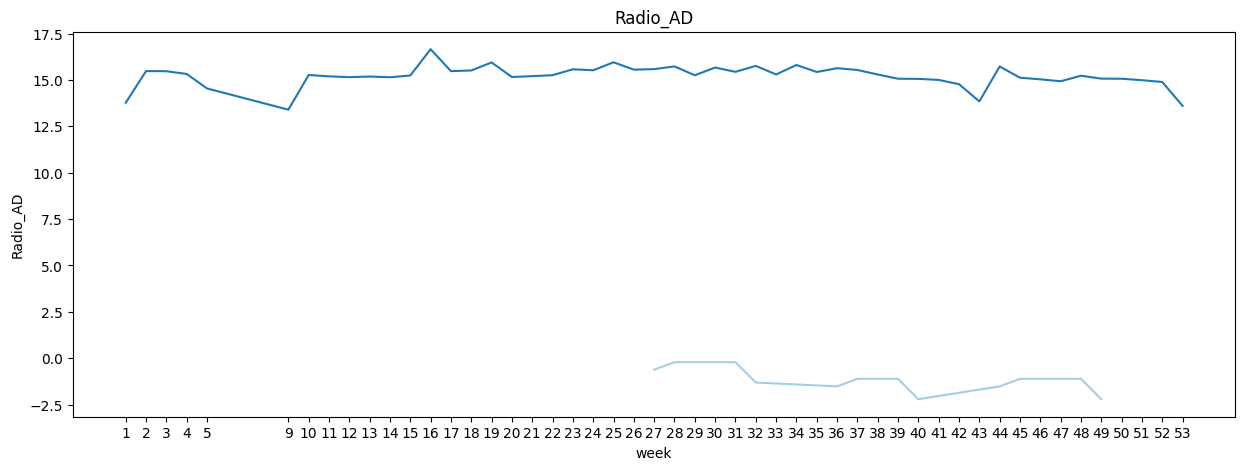

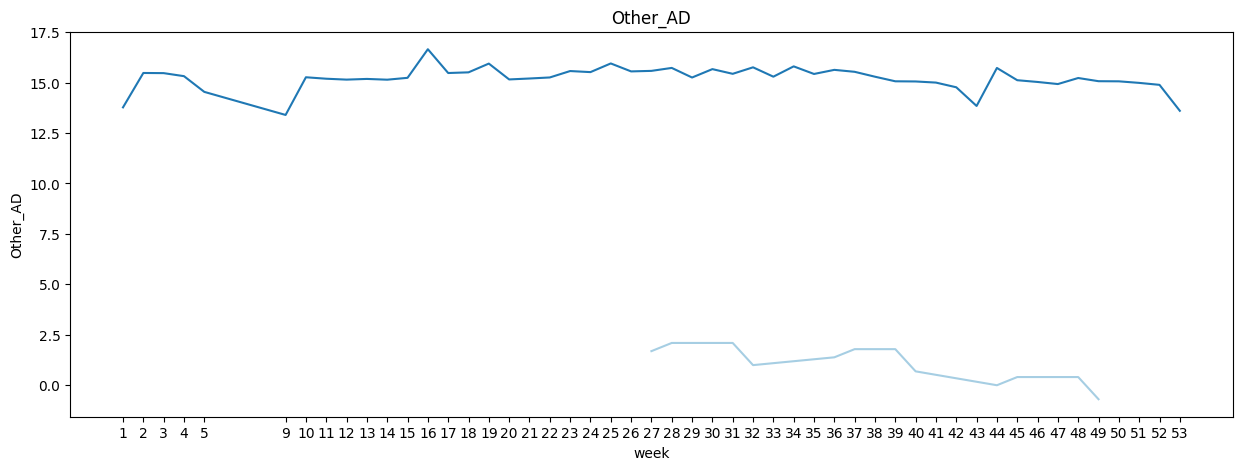

In [148]:
markinv = ['Total_Investment_AD', 'TV_AD','Digital_AD', 'Content_Marketing_AD', 'Online_marketing_AD','Affiliates_AD', 'SEM_AD', 'Radio_AD', 'Other_AD','gmv']

# average_sale_per_week
# plt.figure(figsize=(25, 19))
x=1
for i in markinv:
  if i != 'gmv':
    # plt.subplot(9,1,x)
    plt.figure(figsize=(15, 5))
    plt.title(i)
    sns.lineplot(x=ha_wk['week'],y=nm.log(ha_wk[i]))
    sns.lineplot(x=ha_wk['week'],y=nm.log(ha_wk['gmv']))
    plt.xticks(ha_wk['week'])
    x=x+1
    plt.show()

## radio , other , conent , digital and total : not required



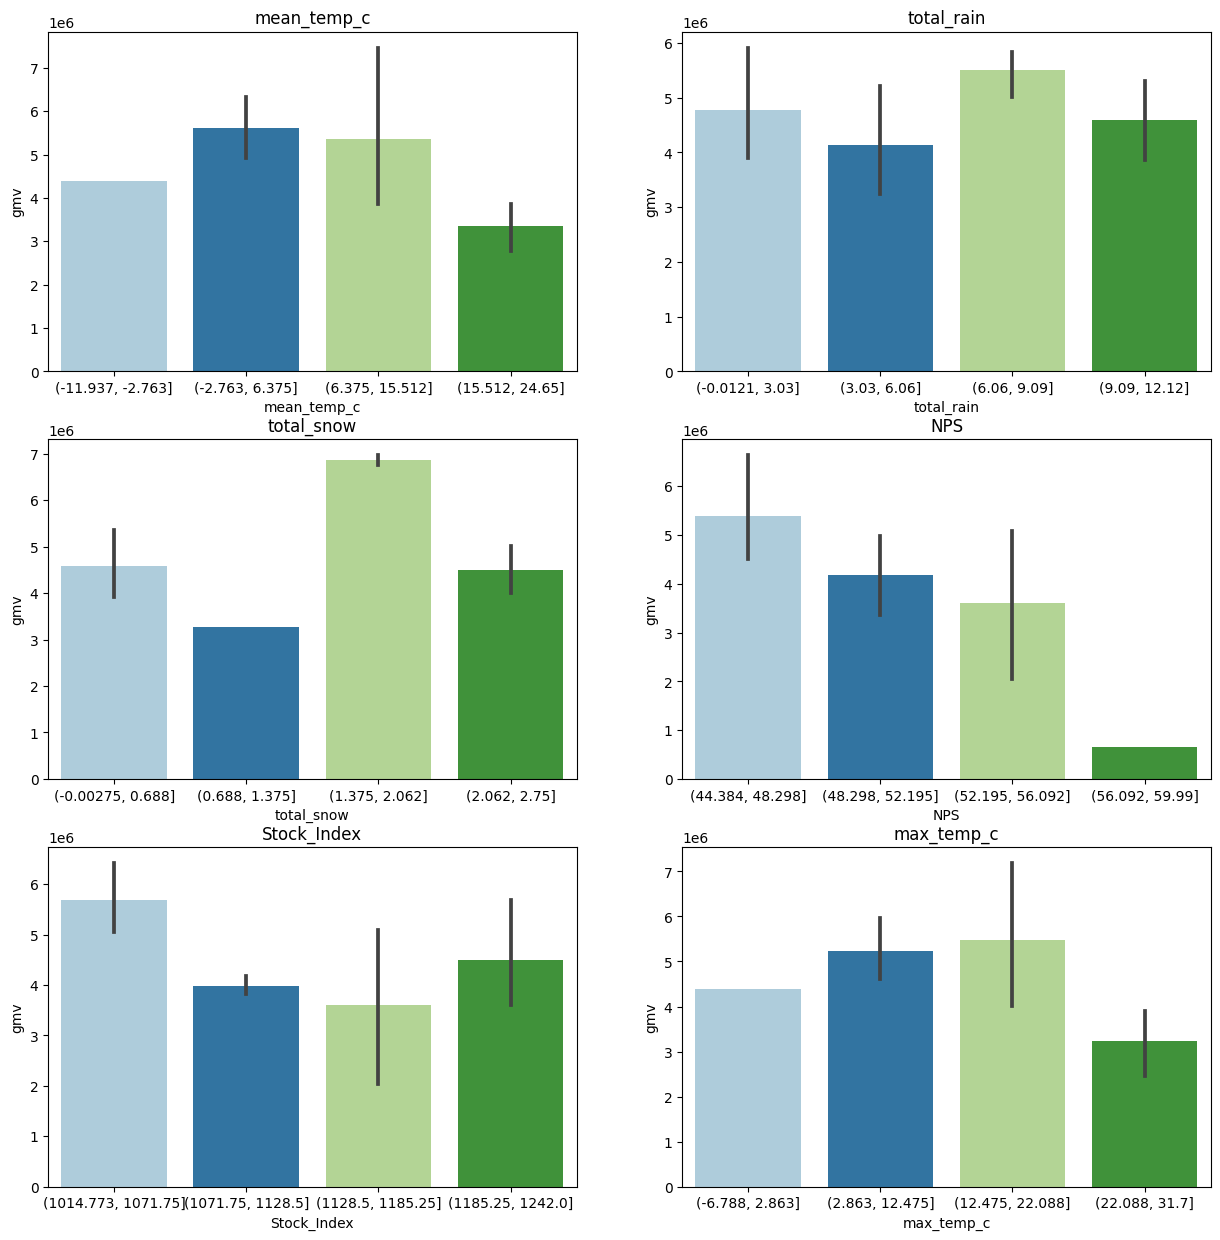

In [149]:
wc = ['mean_temp_c', 'total_rain', 'total_snow','NPS',"Stock_Index",'max_temp_c']

plt.figure(figsize=(15, 15))
x=1
for i in wc:
  plt.subplot(3,2,x)
  plt.title(i)
  sns.barplot(y=ha_wk['gmv'],x=pd.cut(ha_wk[i],bins=4))
  x=x+1


# max and mean almost same impact : so max temp can be remobed

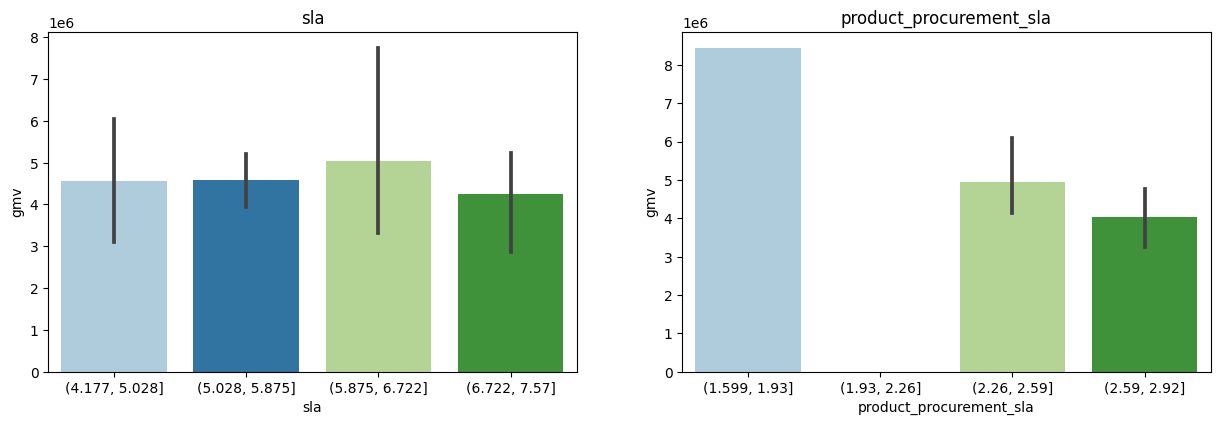

In [150]:
wc = ['sla','product_procurement_sla']

plt.figure(figsize=(15, 15))
x=1
for i in wc:
  plt.subplot(3,2,x)
  plt.title(i)
  sns.barplot(y=ha_wk['gmv'],x=pd.cut(ha_wk[i],bins=4))
  x=x+1

## product procurement sla has a impact

In [1258]:
ha_wk.drop(['max_temp_c',"Total_Investment_AD","Holiday_flag","units","order_count","product_mrp","sales_per",'week'],1,inplace=True)


In [1259]:
ha_wk.drop(['Other_AD'],1,inplace=True)

In [1276]:


df_train, df_test = train_test_split(ha_wk, train_size = 0.7, test_size = 0.3, random_state = 100)
scaler=MinMaxScaler()

scale_var=camera.columns
df_train[df_train.columns]=scaler.fit_transform(df_train[df_train.columns])
X_train=df_train.drop('gmv',1)
y_train=df_train['gmv']
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=15, step=1)
selector.fit(X_train, y_train)

# print(selector.support_)
# print(selector.ranking_)
df=pd.DataFrame(list(zip(X_train.columns,selector.support_,selector.ranking_)))
features =X_train.columns[selector.support_]
features



Index(['sla', 'product_procurement_sla', 'listing_price', 'discount_per',
       'NPS', 'pay_day_in_wk', 'fmradio', 'homeaudiospeaker', 'mean_temp_c',
       'total_rain', 'Digital_AD', 'Content_Marketing_AD',
       'Online_marketing_AD', 'SEM_AD', 'cod_per'],
      dtype='object')

In [1277]:
x_train_m =build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.635e+05
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           2.97e-47
Time:                        11:38:52   Log-Likelihood:                 228.31
No. Observations:                  35   AIC:                            -424.6
Df Residuals:                      19   BIC:                            -399.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features      VIF
2             listing_price  3789.34
7          homeaudiospeaker  3682.20
3              discount_per   646.13
13                   SEM_AD   512.72
10               Digital_AD   263.46
6                   fmradio   136.69
11     Content_Marketing_AD    78.85
14                  cod_per    76.99
4                       NPS    35.62
0                       sla    28.40
8               mean_temp_c    28.22
1   product_procurement_sla    27.82
12      Online_marketing_AD    27.22
5             pay_day_in_wk     2.50
9                total_rain     2.47

In [1278]:
features=features.drop('listing_price',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1456.
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           6.50e-27
Time:                        11:38:56   Log-Likelihood:                 135.26
No. Observations:                  35   AIC:                            -240.5
Df Residuals:                      20   BIC:                            -217.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features     VIF
2              discount_per  633.66
6          homeaudiospeaker  569.25
12                   SEM_AD  256.82
9                Digital_AD  150.67
10     Content_Marketing_AD   55.05
5                   fmradio   41.75
13                  cod_per   38.03
1   product_procurement_sla   27.65
7               mean_temp_c   20.05
11      Online_marketing_AD   19.78
0                       sla   17.01
3                       NPS   16.40
4             pay_day_in_wk    2.49
8                total_rain    2.43

In [1279]:
features=features.drop('homeaudiospeaker',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     288.2
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           1.28e-20
Time:                        11:39:06   Log-Likelihood:                 104.83
No. Observations:                  35   AIC:                            -181.7
Df Residuals:                      21   BIC:                            -159.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features     VIF
11                   SEM_AD  222.46
8                Digital_AD  123.86
9      Content_Marketing_AD   54.03
12                  cod_per   37.67
5                   fmradio   35.57
1   product_procurement_sla   22.64
10      Online_marketing_AD   19.61
6               mean_temp_c   17.97
0                       sla   16.67
3                       NPS   16.35
2              discount_per   15.50
7                total_rain    2.38
4             pay_day_in_wk    2.17

In [1280]:
features=features.drop('SEM_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     326.8
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           6.93e-22
Time:                        11:39:24   Log-Likelihood:                 104.82
No. Observations:                  35   AIC:                            -183.6
Df Residuals:                      22   BIC:                            -163.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
5                   fmradio  35.20
9      Content_Marketing_AD  33.58
11                  cod_per  26.16
1   product_procurement_sla  22.53
8                Digital_AD  20.44
10      Online_marketing_AD  17.04
0                       sla  15.99
2              discount_per  15.11
3                       NPS  10.61
6               mean_temp_c   9.82
7                total_rain   2.38
4             pay_day_in_wk   2.16

In [1281]:
features=features.drop('fmradio',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     320.9
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           1.91e-22
Time:                        11:39:32   Log-Likelihood:                 102.22
No. Observations:                  35   AIC:                            -180.4
Df Residuals:                      23   BIC:                            -161.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
8      Content_Marketing_AD  31.84
10                  cod_per  24.99
1   product_procurement_sla  20.87
7                Digital_AD  19.61
9       Online_marketing_AD  15.85
5               mean_temp_c   9.53
3                       NPS   9.38
0                       sla   7.83
2              discount_per   5.11
6                total_rain   2.19
4             pay_day_in_wk   2.13

In [1282]:
features=features.drop('cod_per',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     344.1
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           2.17e-23
Time:                        11:39:49   Log-Likelihood:                 101.03
No. Observations:                  35   AIC:                            -180.1
Df Residuals:                      24   BIC:                            -163.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
8     Content_Marketing_AD  31.84
7               Digital_AD  19.23
1  product_procurement_sla  18.37
9      Online_marketing_AD  14.01
3                      NPS   9.29
5              mean_temp_c   8.20
0                      sla   6.76
2             discount_per   4.55
6               total_rain   2.19
4            pay_day_in_wk   2.13

In [1283]:
features=features.drop('pay_day_in_wk',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     336.8
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           8.30e-24
Time:                        11:40:01   Log-Likelihood:                 98.125
No. Observations:                  35   AIC:                            -176.3
Df Residuals:                      25   BIC:                            -160.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
7     Content_Marketing_AD  28.10
1  product_procurement_sla  18.37
6               Digital_AD  17.53
8      Online_marketing_AD  13.79
3                      NPS   8.71
4              mean_temp_c   8.20
0                      sla   6.65
2             discount_per   4.55
5               total_rain   2.19

In [1284]:
features=features.drop('total_rain',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     394.0
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           4.02e-25
Time:                        11:40:11   Log-Likelihood:                 98.123
No. Observations:                  35   AIC:                            -178.2
Df Residuals:                      26   BIC:                            -164.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
6     Content_Marketing_AD  27.47
1  product_procurement_sla  18.05
5               Digital_AD  16.77
7      Online_marketing_AD  13.64
3                      NPS   8.51
4              mean_temp_c   7.94
0                      sla   6.55
2             discount_per   4.53

In [1285]:
features=features.drop('Content_Marketing_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     467.3
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           1.79e-26
Time:                        11:40:21   Log-Likelihood:                 98.110
No. Observations:                  35   AIC:                            -180.2
Df Residuals:                      27   BIC:                            -167.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
1  product_procurement_sla  17.97
6      Online_marketing_AD   8.69
4              mean_temp_c   7.85
3                      NPS   6.89
0                      sla   6.52
2             discount_per   4.50
5               Digital_AD   2.88

In [1286]:
features=features.drop('mean_temp_c',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     564.3
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           7.37e-28
Time:                        11:40:31   Log-Likelihood:                 98.077
No. Observations:                  35   AIC:                            -182.2
Df Residuals:                      28   BIC:                            -171.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
1  product_procurement_sla  15.33
5      Online_marketing_AD   8.66
0                      sla   6.44
3                      NPS   6.38
2             discount_per   4.50
4               Digital_AD   2.65

In [1287]:
features=features.drop('product_procurement_sla',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     606.9
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           2.09e-28
Time:                        11:40:40   Log-Likelihood:                 95.567
No. Observations:                  35   AIC:                            -179.1
Df Residuals:                      29   BIC:                            -169.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0367    

Features   VIF
0                  sla  5.86
1         discount_per  4.48
4  Online_marketing_AD  4.40
2                  NPS  3.73
3           Digital_AD  2.62

In [1288]:
features=features.drop('sla',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     782.6
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           7.26e-30
Time:                        11:40:56   Log-Likelihood:                 95.519
No. Observations:                  35   AIC:                            -181.0
Df Residuals:                      30   BIC:                            -173.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0396    

Features   VIF
0         discount_per  4.48
3  Online_marketing_AD  4.21
2           Digital_AD  1.95
1                  NPS  1.62

In [1289]:
features=features.drop('NPS',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     1068.
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           2.34e-31
Time:                        11:41:04   Log-Likelihood:                 95.354
No. Observations:                  35   AIC:                            -182.7
Df Residuals:                      31   BIC:                            -176.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0490    

Features   VIF
0         discount_per  4.37
2  Online_marketing_AD  3.84
1           Digital_AD  1.92

In [1290]:
lm = sm.OLS(y_train,X_train[features]).fit() # fitting the model
print(lm.summary()) # model summary
y_train_pred=lm.predict(X_train[features])

                                 OLS Regression Results                                
Dep. Variable:                    gmv   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                              1708.
Date:                Sun, 08 Oct 2023   Prob (F-statistic):                    2.22e-35
Time:                        11:41:22   Log-Likelihood:                          80.219
No. Observations:                  35   AIC:                                     -154.4
Df Residuals:                      32   BIC:                                     -149.8
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

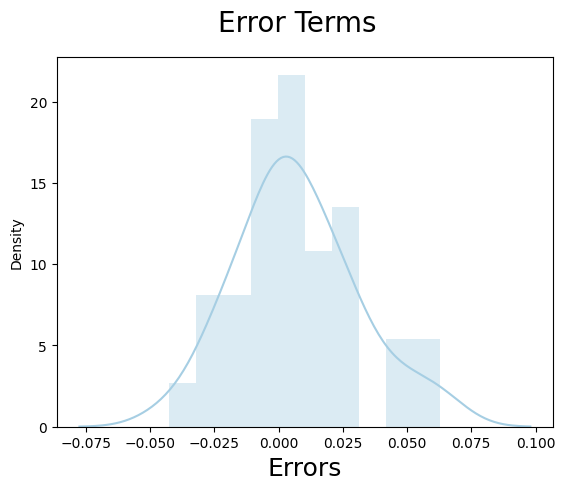

Text(0, 0.5, 'y_pred')

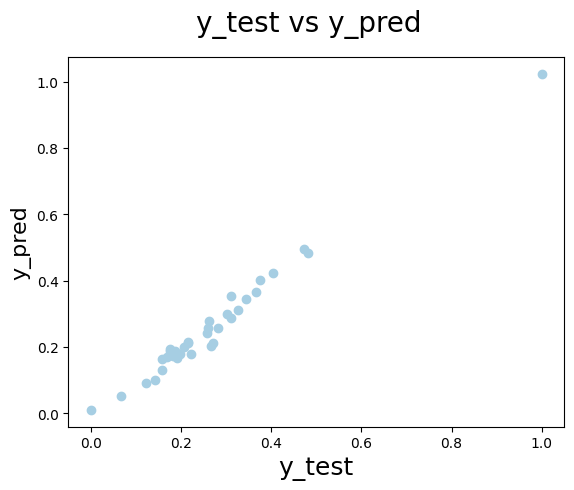

In [1291]:
fig=plt.figure()
sns.distplot((y_train-y_train_pred),bins=10)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()

# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_train ,y_train_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)


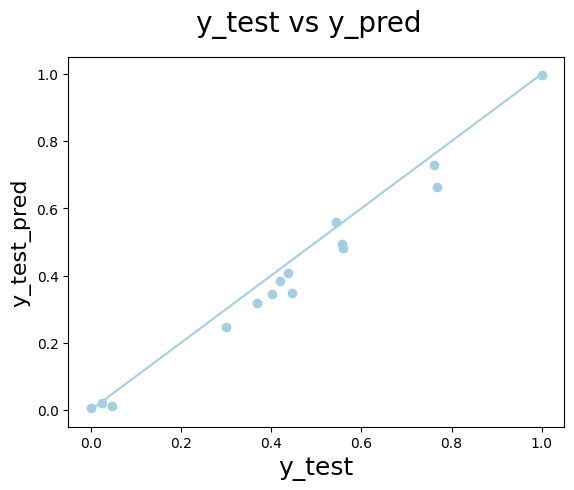

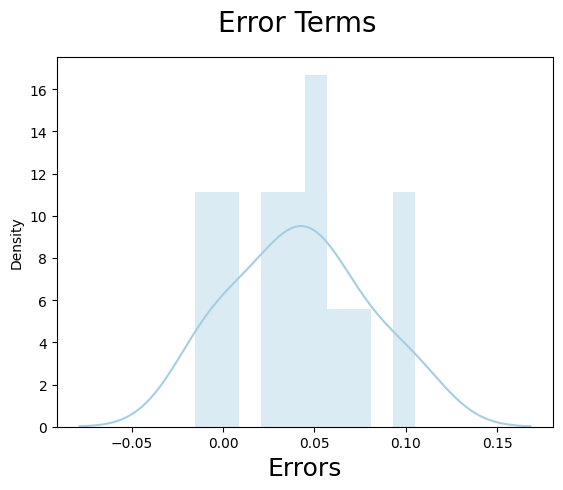

In [1292]:
df_test[df_train.columns]=scaler.fit_transform(df_test[df_train.columns])
X_test=df_test.drop('gmv',1)
y_test=df_test['gmv']
X_test=sm.add_constant(X_test)
X_test=X_test[features]
y_test_pred=lm.predict(X_test)

# Plotting y_test and y_pred to understand the spread

fig,ax = plt.subplots()
ax.scatter(y_test, y_test_pred )
fig.suptitle('y_test vs y_pred', fontsize = 20)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])#,  lw=1)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

fig=plt.figure()
sns.distplot((y_test-y_test_pred),bins=10)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()


Multiplicative

In [171]:

# ha_wk=ha.groupby(['week']).agg({"order_item_id":"nunique",'gmv':'sum','units':'sum','order_payment_type':'sum','sla':'mean',
#                                         'product_mrp':'sum','product_procurement_sla':'mean','listing_price':'sum',
#                                          'discount_per':'sum','Stock_Index':'max','NPS':'max','pay_date_flag':'max',
#                                           "Holiday_flag": "nunique",'sale_date':"nunique"}).round(2)

# ha_wk=pd.merge(ha_wk,weekly_kpis,on='week')

# ha_wk.rename(columns={"sales_date":"num_of_sales"},inplace=True)

# ha_wk.drop(['heat_deg_c','mon_temp_c','Year','Month','Day','Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing',
#        'Online marketing', 'Affiliates', 'SEM', 'Radio', 'Other'],1,inplace=True)

# ha_wk.order_payment_type.value_counts()
# ha_wk.rename(columns={'order_item_id':'order_count',"order_payment_type":"order_payment_cod",'mon_temp_c':"min_temp_c","pay_date_flag":"pay_day_in_wk"},inplace=True)
# ha_wk["cod_per"]=ha_wk["order_payment_cod"]/ha_wk["order_count"]
# ha_wk.drop("order_payment_cod",1,inplace=True)
# ha_wk.rename(columns={'sale_date':"num_of_sales"},inplace=True)
# ha_wk['sales_per']=(ha_wk['num_of_sales']-1)/7
# ha_wk.drop('num_of_sales',1,inplace=True)

In [1293]:
ha_wk[ha_wk.columns]=nm.log(ha_wk[ha_wk.columns])

ha_wk=ha_wk.replace([nm.inf, -nm.inf], 0)
ha_wk=ha_wk.fillna(0)

# ha_wk.drop(['product_mrp','order_count','Other_AD','units'],1,inplace=True)

In [1340]:
df_train, df_test = train_test_split(ha_wk, train_size = 0.7, test_size = 0.3, random_state = 100)
scaler=MinMaxScaler()
scale_var=camera.columns
df_train[df_train.columns]=scaler.fit_transform(df_train[df_train.columns])
X_train=df_train.drop('gmv',1)
y_train=df_train['gmv']
# X_train


In [1341]:
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=15, step=1)
selector.fit(X_train, y_train)

df=pd.DataFrame(list(zip(X_train.columns,selector.support_,selector.ranking_)))
features =X_train.columns[selector.support_]
features


Index(['sla', 'product_procurement_sla', 'listing_price', 'discount_per',
       'NPS', 'fmradio', 'homeaudiospeaker', 'mean_temp_c', 'total_rain',
       'Digital_AD', 'Content_Marketing_AD', 'Sponsorship_AD',
       'Online_marketing_AD', 'SEM_AD', 'cod_per'],
      dtype='object')

In [1342]:
x_train_m =build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.806e+05
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           1.08e-45
Time:                        11:49:50   Log-Likelihood:                 222.11
No. Observations:                  35   AIC:                            -412.2
Df Residuals:                      19   BIC:                            -387.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features      VIF
6          homeaudiospeaker  8178.53
2             listing_price  7521.84
3              discount_per  2010.97
5                   fmradio   388.00
14                  cod_per   150.68
12      Online_marketing_AD   108.89
13                   SEM_AD   105.00
10     Content_Marketing_AD    92.80
9                Digital_AD    79.44
0                       sla    53.00
11           Sponsorship_AD    41.05
4                       NPS    33.23
1   product_procurement_sla    30.63
7               mean_temp_c    18.28
8                total_rain     9.50

In [1343]:
features=features.drop('homeaudiospeaker',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.954e+05
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           3.49e-48
Time:                        11:49:54   Log-Likelihood:                 221.39
No. Observations:                  35   AIC:                            -412.8
Df Residuals:                      20   BIC:                            -389.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features      VIF
2             listing_price  1602.05
3              discount_per  1569.47
5                   fmradio   215.56
13                  cod_per   150.18
12                   SEM_AD    84.07
9      Content_Marketing_AD    81.96
11      Online_marketing_AD    66.58
8                Digital_AD    61.12
0                       sla    49.39
10           Sponsorship_AD    33.24
1   product_procurement_sla    29.19
4                       NPS    27.17
6               mean_temp_c    16.82
7                total_rain     9.17

In [1344]:
features=features.drop('listing_price',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     204.3
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           4.59e-19
Time:                        11:49:57   Log-Likelihood:                 99.269
No. Observations:                  35   AIC:                            -170.5
Df Residuals:                      21   BIC:                            -148.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features     VIF
4                   fmradio  214.61
12                  cod_per  110.58
2              discount_per  107.11
11                   SEM_AD   72.43
8      Content_Marketing_AD   69.79
10      Online_marketing_AD   62.33
7                Digital_AD   60.58
0                       sla   49.39
9            Sponsorship_AD   30.59
1   product_procurement_sla   27.61
3                       NPS   21.22
5               mean_temp_c   16.42
6                total_rain    9.17

In [1345]:
features=features.drop('fmradio',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     231.7
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           2.95e-20
Time:                        11:50:01   Log-Likelihood:                 99.254
No. Observations:                  35   AIC:                            -172.5
Df Residuals:                      22   BIC:                            -152.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
11                  cod_per  83.60
10                   SEM_AD  66.01
9       Online_marketing_AD  55.80
6                Digital_AD  52.65
7      Content_Marketing_AD  50.63
2              discount_per  29.16
1   product_procurement_sla  26.25
8            Sponsorship_AD  25.19
3                       NPS  20.44
4               mean_temp_c  14.93
0                       sla  13.03
5                total_rain   8.74

In [1346]:
features=features.drop('product_procurement_sla',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     243.3
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           4.47e-21
Time:                        11:50:14   Log-Likelihood:                 97.824
No. Observations:                  35   AIC:                            -171.6
Df Residuals:                      23   BIC:                            -153.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0024 

Features    VIF
10               cod_per  80.53
9                 SEM_AD  66.00
5             Digital_AD  52.62
6   Content_Marketing_AD  50.48
8    Online_marketing_AD  49.99
1           discount_per  27.96
7         Sponsorship_AD  25.12
2                    NPS  18.96
3            mean_temp_c  14.74
0                    sla  12.85
4             total_rain   8.67

In [1347]:
features=features.drop('cod_per',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     216.2
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           5.35e-21
Time:                        11:50:22   Log-Likelihood:                 93.389
No. Observations:                  35   AIC:                            -164.8
Df Residuals:                      24   BIC:                            -147.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0496 

Features    VIF
5            Digital_AD  33.01
8   Online_marketing_AD  32.84
9                SEM_AD  32.23
6  Content_Marketing_AD  29.12
7        Sponsorship_AD  24.75
1          discount_per  24.35
2                   NPS  13.54
0                   sla  12.76
3           mean_temp_c   9.91
4            total_rain   8.64

In [1348]:
features=features.drop('SEM_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     249.6
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           3.37e-22
Time:                        11:50:32   Log-Likelihood:                 93.343
No. Observations:                  35   AIC:                            -166.7
Df Residuals:                      25   BIC:                            -151.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0429 

Features    VIF
8   Online_marketing_AD  30.53
7        Sponsorship_AD  24.73
1          discount_per  22.34
6  Content_Marketing_AD  17.96
5            Digital_AD  12.45
0                   sla  12.01
3           mean_temp_c   9.47
4            total_rain   8.53
2                   NPS   5.53

In [1349]:
features=features.drop('total_rain',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     291.2
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           1.96e-23
Time:                        11:50:42   Log-Likelihood:                 93.297
No. Observations:                  35   AIC:                            -168.6
Df Residuals:                      26   BIC:                            -154.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0388 

Features    VIF
6        Sponsorship_AD  23.75
7   Online_marketing_AD  22.74
1          discount_per  21.81
5  Content_Marketing_AD  17.49
4            Digital_AD  12.41
0                   sla  11.75
3           mean_temp_c   9.46
2                   NPS   5.07

In [1350]:
features=features.drop('NPS',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     344.5
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           1.05e-24
Time:                        11:50:50   Log-Likelihood:                 93.239
No. Observations:                  35   AIC:                            -170.5
Df Residuals:                      27   BIC:                            -158.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0490 

Features    VIF
1          discount_per  21.74
6   Online_marketing_AD  20.65
5        Sponsorship_AD  18.71
4  Content_Marketing_AD  17.43
3            Digital_AD  12.18
0                   sla  11.59
2           mean_temp_c   5.96

In [1351]:
features=features.drop('Content_Marketing_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     400.3
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           8.56e-26
Time:                        11:50:59   Log-Likelihood:                 92.539
No. Observations:                  35   AIC:                            -171.1
Df Residuals:                      28   BIC:                            -160.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0417    

Features    VIF
5  Online_marketing_AD  20.40
4       Sponsorship_AD  18.70
1         discount_per  15.63
3           Digital_AD  11.75
0                  sla   8.09
2          mean_temp_c   5.92

In [1352]:
features=features.drop('Online_marketing_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     483.4
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           5.47e-27
Time:                        11:51:11   Log-Likelihood:                 92.041
No. Observations:                  35   AIC:                            -172.1
Df Residuals:                      29   BIC:                            -162.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0223      0.017      1.

Features   VIF
4  Sponsorship_AD  9.61
3      Digital_AD  8.71
0             sla  7.78
1    discount_per  6.21
2     mean_temp_c  5.70

In [1354]:
features=features.drop('sla',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     580.1
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           6.15e-28
Time:                        11:51:21   Log-Likelihood:                 90.751
No. Observations:                  35   AIC:                            -171.5
Df Residuals:                      30   BIC:                            -163.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0126      0.016      0.

Features   VIF
3  Sponsorship_AD  7.49
2      Digital_AD  6.60
0    discount_per  4.23
1     mean_temp_c  4.03

In [1355]:
lm = sm.OLS(y_train,X_train[features]).fit() # fitting the model
print(lm.summary()) # model summary
y_train_pred=lm.predict(X_train[features])


                                 OLS Regression Results                                
Dep. Variable:                    gmv   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                              7487.
Date:                Sun, 08 Oct 2023   Prob (F-statistic):                    8.75e-46
Time:                        11:51:26   Log-Likelihood:                          90.379
No. Observations:                  35   AIC:                                     -172.8
Df Residuals:                      31   BIC:                                     -166.5
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

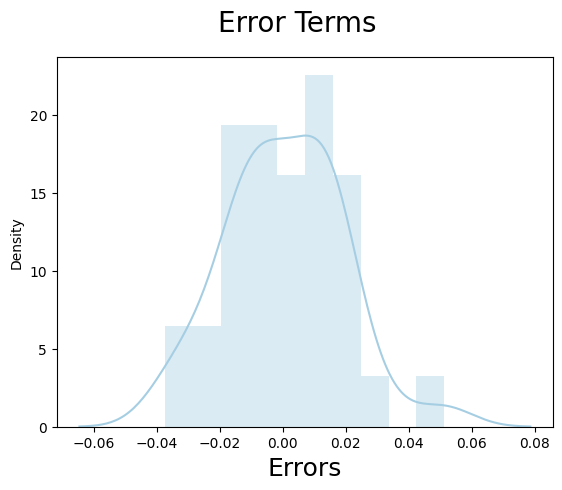

Text(0, 0.5, 'y_pred')

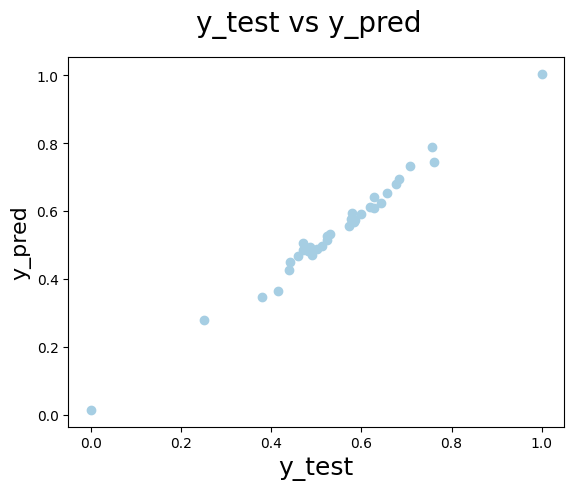

In [1356]:
fig=plt.figure()
sns.distplot((y_train-y_train_pred),bins=10)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()

# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_train ,y_train_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)


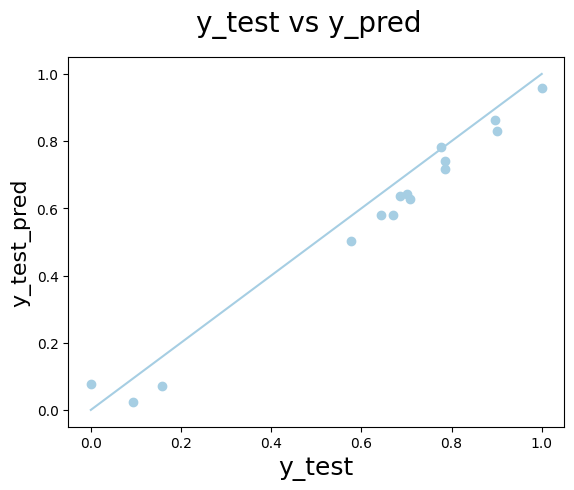

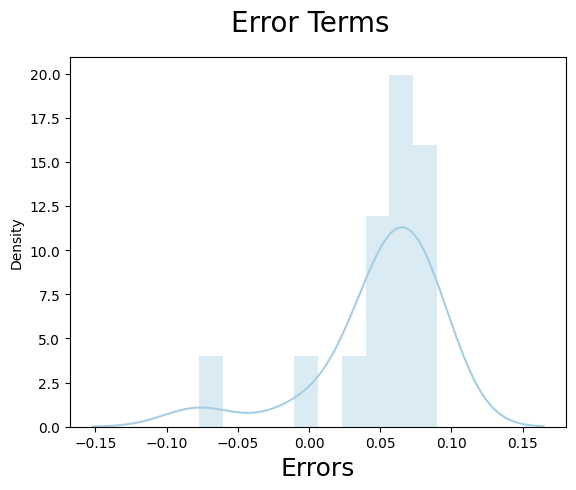

In [1357]:
df_test[df_train.columns]=scaler.fit_transform(df_test[df_train.columns])
X_test=df_test.drop('gmv',1)
y_test=df_test['gmv']
X_test=sm.add_constant(X_test)
X_test=X_test[features]

y_test_pred=lm.predict(X_test)

# Plotting y_test and y_pred to understand the spread

fig,ax = plt.subplots()
ax.scatter(y_test, y_test_pred )
fig.suptitle('y_test vs y_pred', fontsize = 20)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])#,  lw=1)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

fig=plt.figure()
sns.distplot((y_test-y_test_pred),bins=10)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()


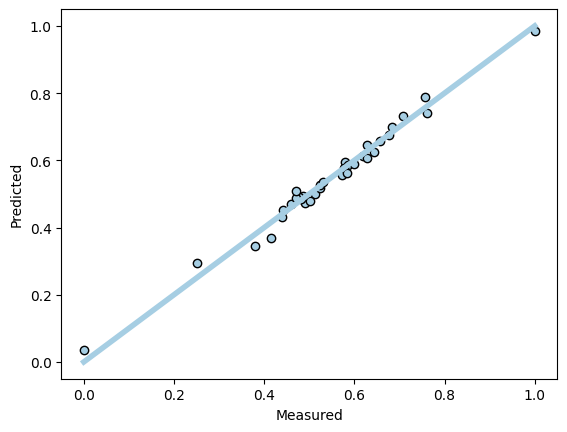

array([0.9904142 , 0.97440846, 0.97422425, 0.94072766, 0.96886949])

In [1358]:
f = KFold(n_splits = 5, shuffle = True, random_state = 100)
lm=LinearRegression()
scores = cross_val_score(lm, X_train[features], y_train, scoring='r2', cv=f)

y_pred = cross_val_predict(lm, X_train[features], y_train, cv=f)



fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],  lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

scores

In [1359]:
ha_features=features

In [1360]:
ha_features

Index(['discount_per', 'mean_temp_c', 'Digital_AD', 'Sponsorship_AD'], dtype='object')

Gaming Accessories

In [1361]:
game=EleData3[EleData3.product_analytic_sub_category=='gamingaccessory']
# game.discount_per


In [1362]:
# game.columns
game_dum=pd.get_dummies(game.product_analytic_vertical_derived)
game=pd.concat([game,game_dum],axis=1)

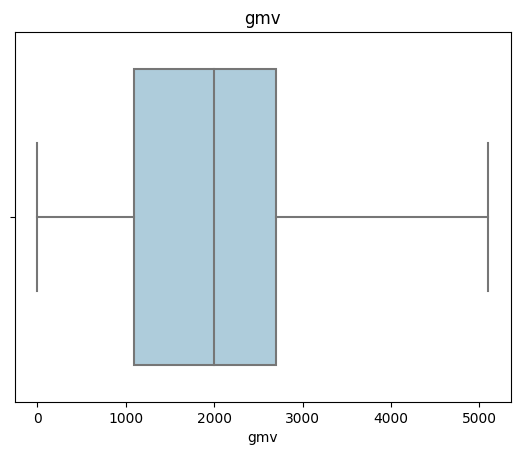

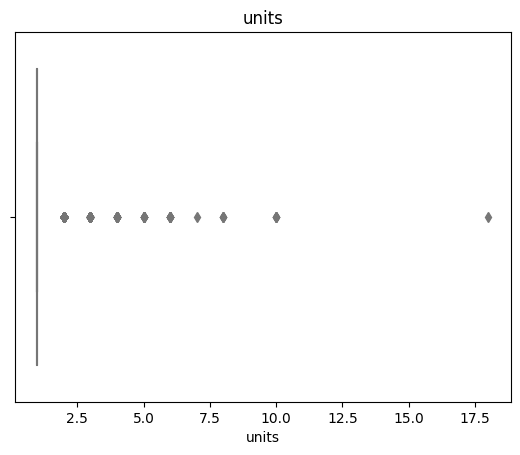

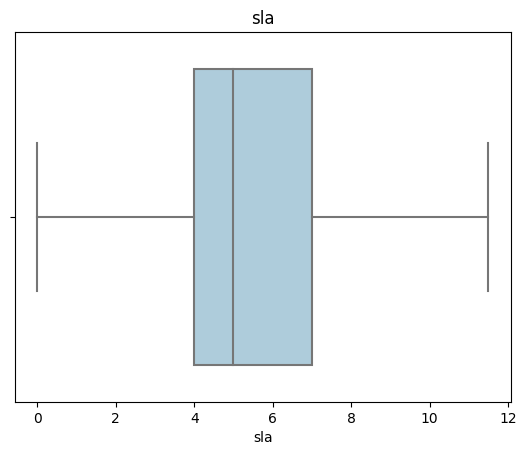

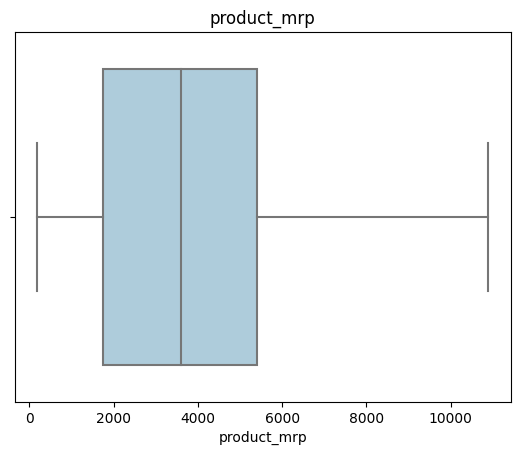

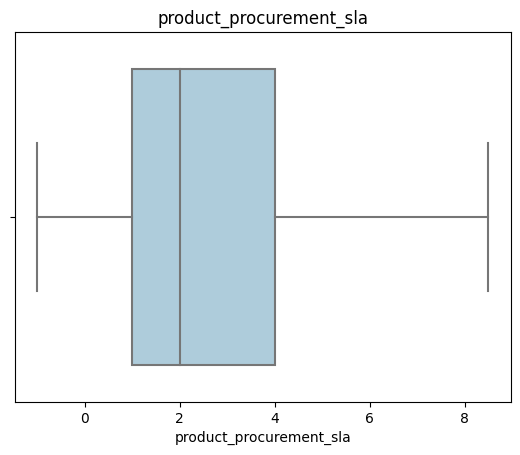

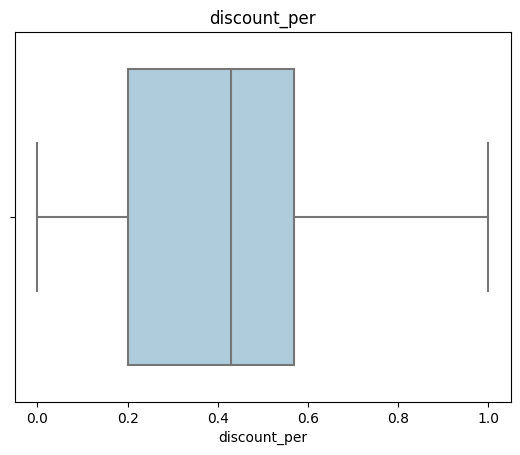

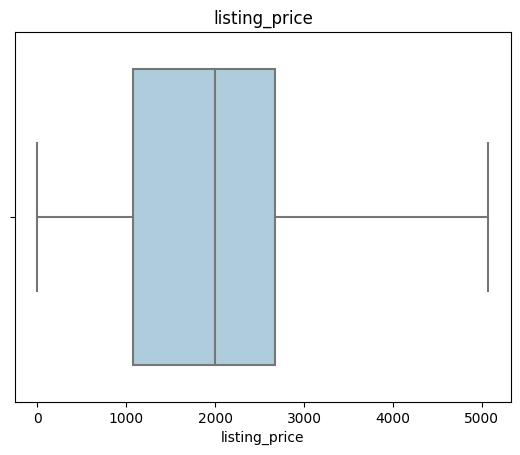

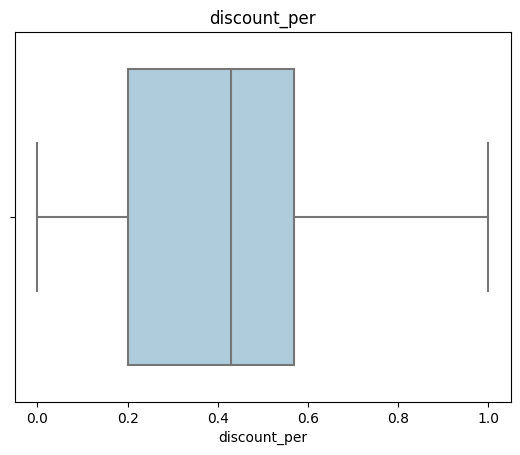

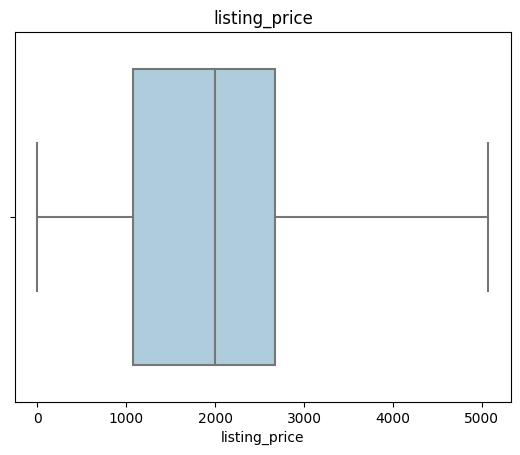

In [790]:
for i in num:
  sns.boxplot(x=ha[i])
  plt.title(i)
  plt.show()

In [1363]:


q1=game['product_mrp'].quantile(0.25)
q3=game['product_mrp'].quantile(0.75)
iqr=q3-q1
lw=q1-iqr*1.5
up=q3+iqr*1.5
print(lw," ",up)
game.loc[game['product_mrp']>up,'product_mrp']=up
game.loc[game['product_mrp']<lw,'product_mrp']=lw


q1=game['gmv'].quantile(0.25)
q3=game['gmv'].quantile(0.75)
iqr=q3-q1
lw=q1-iqr*1.5
up=q3+iqr*1.5
print(lw," ",up)
game.loc[game['gmv']>up,'gmv']=up
game.loc[game['gmv']<lw,'gmv']=lw


q1=game['listing_price'].quantile(0.25)
q3=game['listing_price'].quantile(0.75)
iqr=q3-q1
lw=q1-iqr*1.5
up=q3+iqr*1.5
print(lw," ",up)
game.loc[game['listing_price']>up,'listing_price']=up
game.loc[game['listing_price']<lw,'listing_price']=lw


q1=game['discount_per'].quantile(0.25)
q3=game['discount_per'].quantile(0.75)
iqr=q3-q1
lw=q1-iqr*1.5
up=q3+iqr*1.5
print(lw," ",up)
game.loc[game['discount_per']>up,'discount_per']=up
game.loc[game['discount_per']<lw,'discount_per']=lw

# game[game['discount_per']>1.39]
q1=game['sla'].quantile(0.25)
q3=game['sla'].quantile(0.75)
iqr=q3-q1
lw=q1-iqr*1.5
up=q3+iqr*1.5
print(lw," ",up)
game.loc[game['sla']>up,'sla']=up
game.loc[game['sla']<lw,'sla']=lw
q1=game['product_procurement_sla'].quantile(0.25)
q3=game['product_procurement_sla'].quantile(0.75)
iqr=q3-q1
lw=q1-iqr*1.5
up=q3+iqr*1.5
print(lw," ",up)
game.loc[game['product_procurement_sla']>up,'product_procurement_sla']=up
game.loc[game['product_procurement_sla']<lw,'product_procurement_sla']=lw


-1127.5   3476.5
-700.0   1924.0
-648.5   1827.5
-0.22999999999999998   1.13
-0.5   11.5
0.5   4.5


In [281]:
game.gmv.describe()

284-1.5*(284+940)

-1552.0

In [1364]:
game_wk=game.groupby(['week']).agg({"order_item_id":"nunique",'gmv':'sum','units':'sum','order_payment_type':'sum','sla':'mean',
                                        'product_mrp':'sum','product_procurement_sla':'mean','listing_price':'sum',
                                         'discount_per':'sum','Stock_Index':'max','NPS':'max','pay_date_flag':'max',
                                          "Holiday_flag": "nunique",'sale_date':"nunique"}).round(2)

game_wk=pd.merge(game_wk,weekly_kpis,on='week')

game_wk.rename(columns={"sales_date":"num_of_sales"},inplace=True)

# game_wk.drop(['heat_deg_c','mon_temp_c','Year','Month','Day','Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing',
      #  'Online marketing', 'Affiliates', 'SEM', 'Radio', 'Other'],1,inplace=True)

game_wk.drop(['heat_deg_c','mon_temp_c','Year','Month','Day'],1,inplace=True)

game_wk.order_payment_type.value_counts()
game_wk.rename(columns={'order_item_id':'order_count',"order_payment_type":"order_payment_cod",'mon_temp_c':"min_temp_c","pay_date_flag":"pay_day_in_wk"},inplace=True)
game_wk["cod_per"]=game_wk["order_payment_cod"]/game_wk["order_count"]
game_wk.drop("order_payment_cod",1,inplace=True)
game_wk.rename(columns={'sale_date':"num_of_sales"},inplace=True)

game_wk['sales_per']=(game_wk['num_of_sales']-1)/7
game_wk.drop('num_of_sales',1,inplace=True)

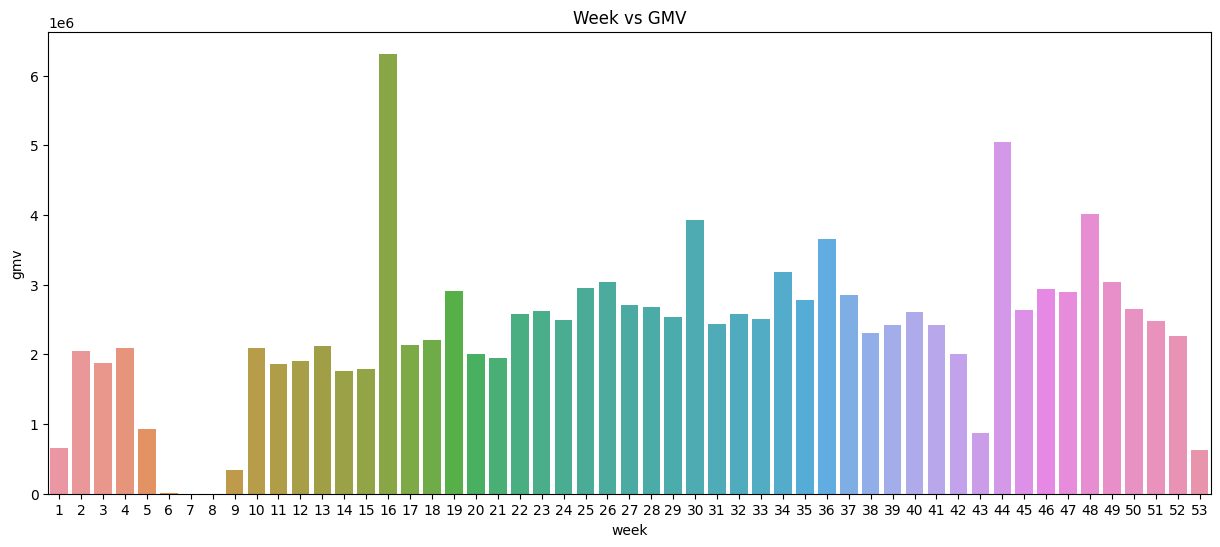

In [468]:
plt.figure(figsize=(15,6))
sns.barplot(x=game_wk['week'],y=game_wk['gmv'])
plt.title("Week vs GMV")
plt.show()
## 16 , 19, 20, 34, 36, 44

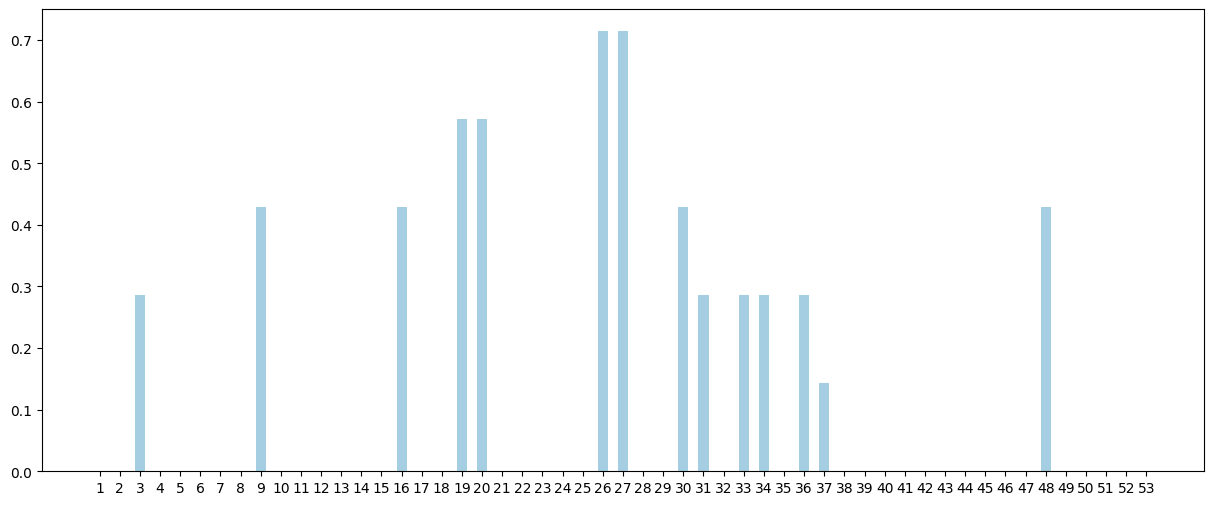

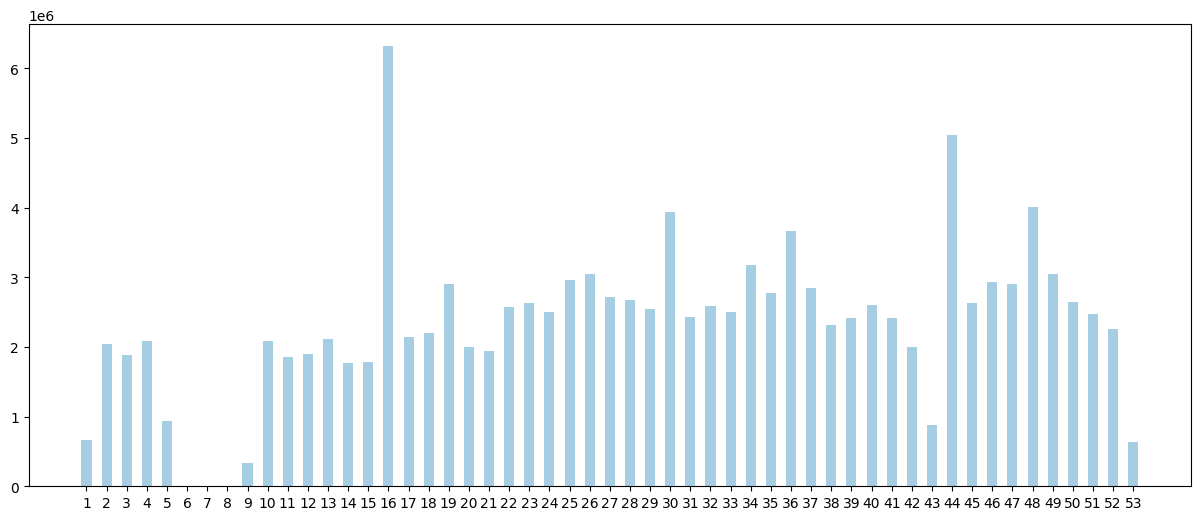

In [469]:
plt.figure(figsize=(15,6))
width=0.5
plt.bar(x=game_wk['week'],height=game_wk['sales_per'],width=width)
plt.xticks(game_wk['week'])
plt.show()
plt.figure(figsize=(15,6))
plt.bar(x=game_wk['week'],height=game_wk['gmv'],width=width)
plt.xticks(game_wk['week'])
plt.show()


## sales per as impact

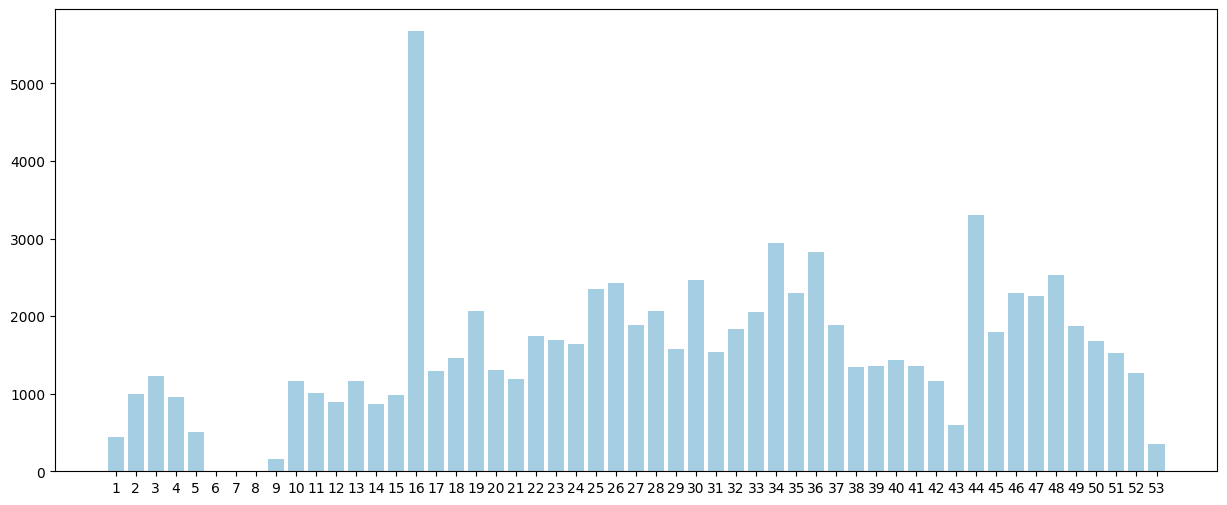

In [201]:
plt.figure(figsize=(15,6))
plt.bar(x=game_wk['week'],height=game_wk['discount_per'])
plt.xticks(game_wk['week'])
plt.show()

## not very much changes because of discount


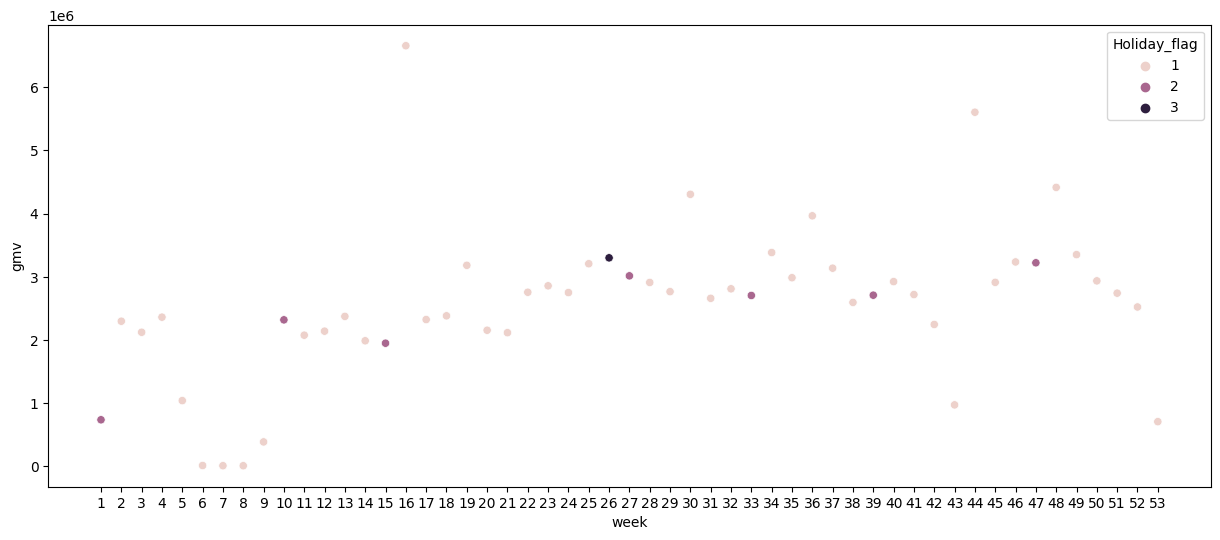

In [202]:
plt.figure(figsize=(15,6))
sns.scatterplot(x=game_wk['week'],y=game_wk['gmv'],hue=game_wk['Holiday_flag'])
plt.xticks(game_wk['week'])
plt.show()


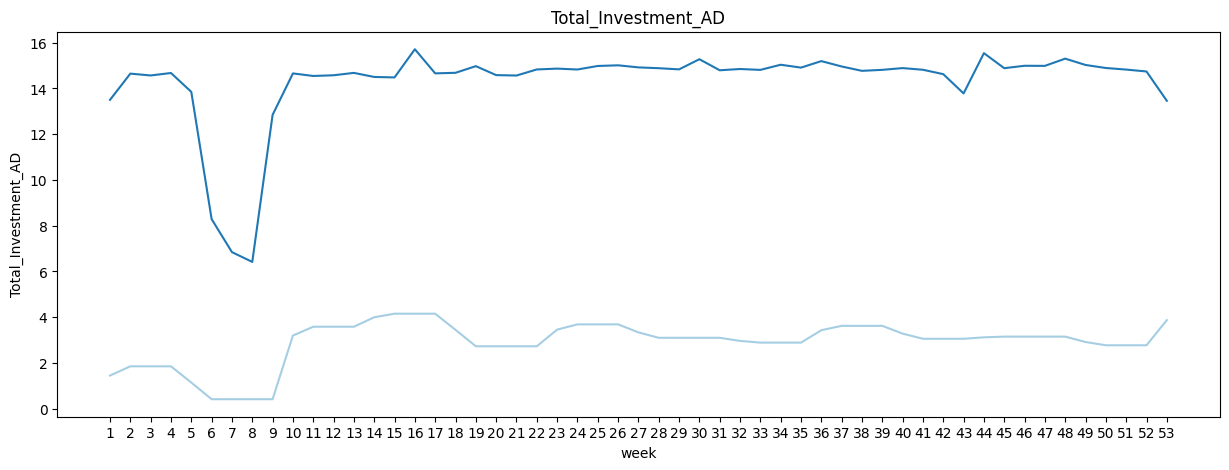

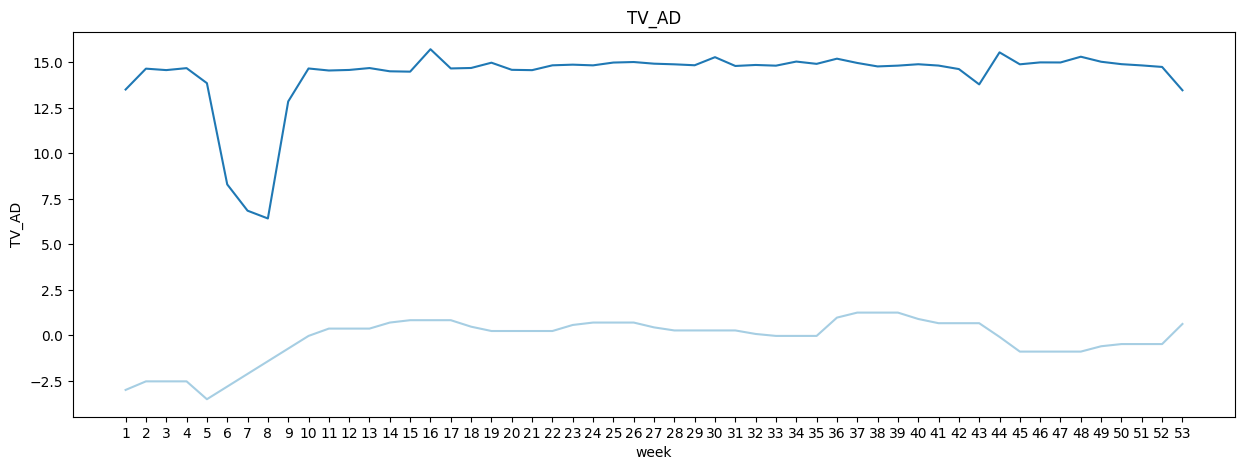

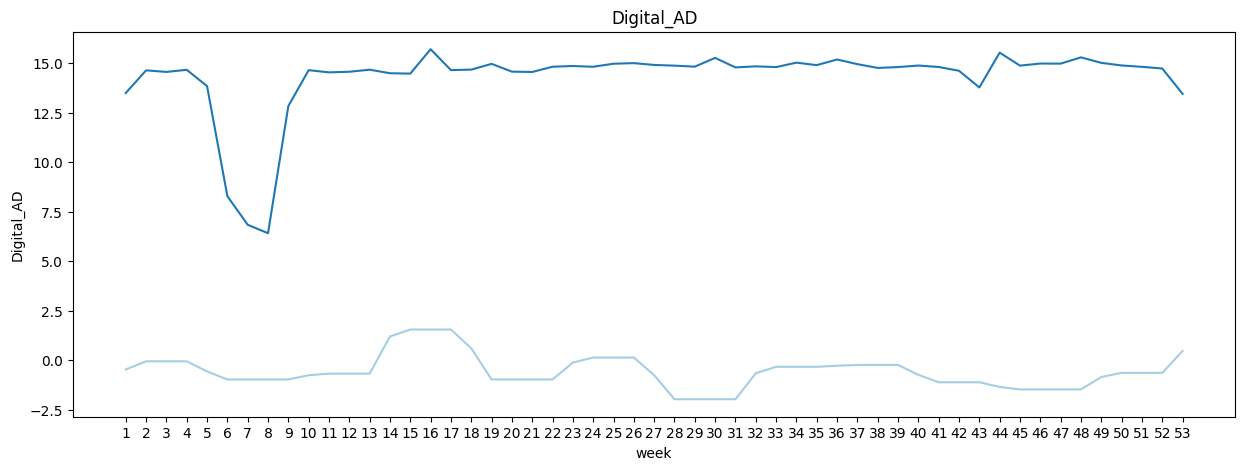

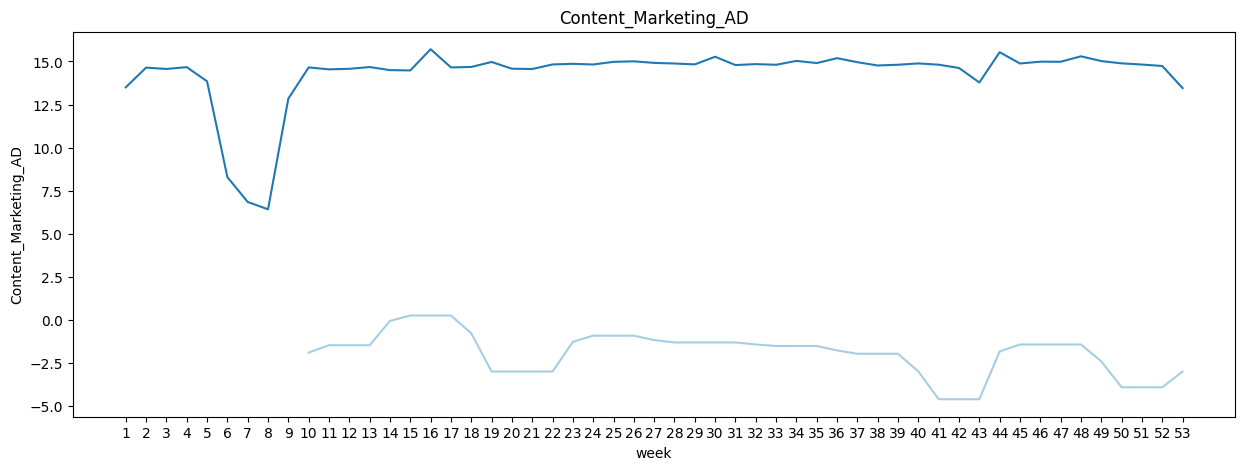

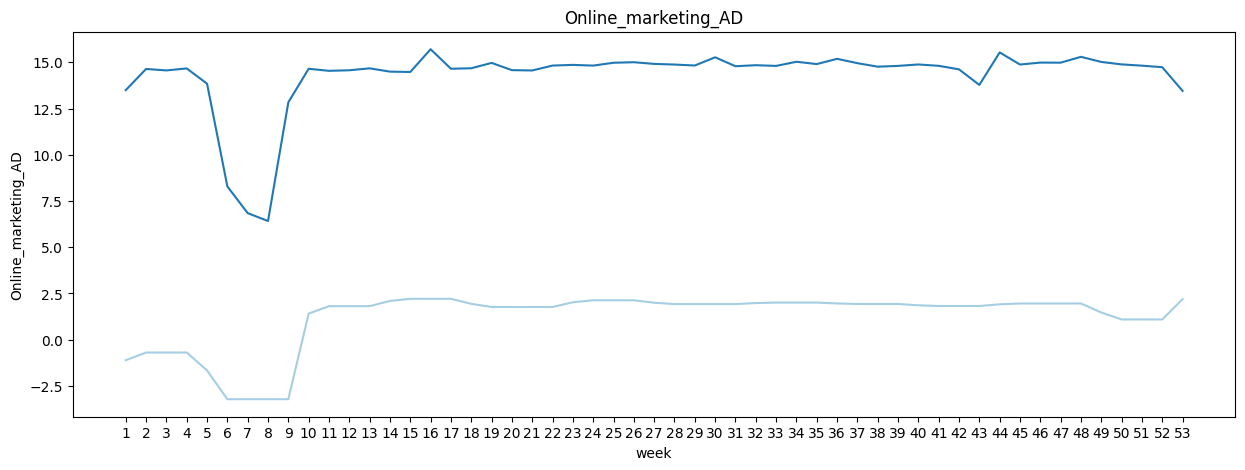

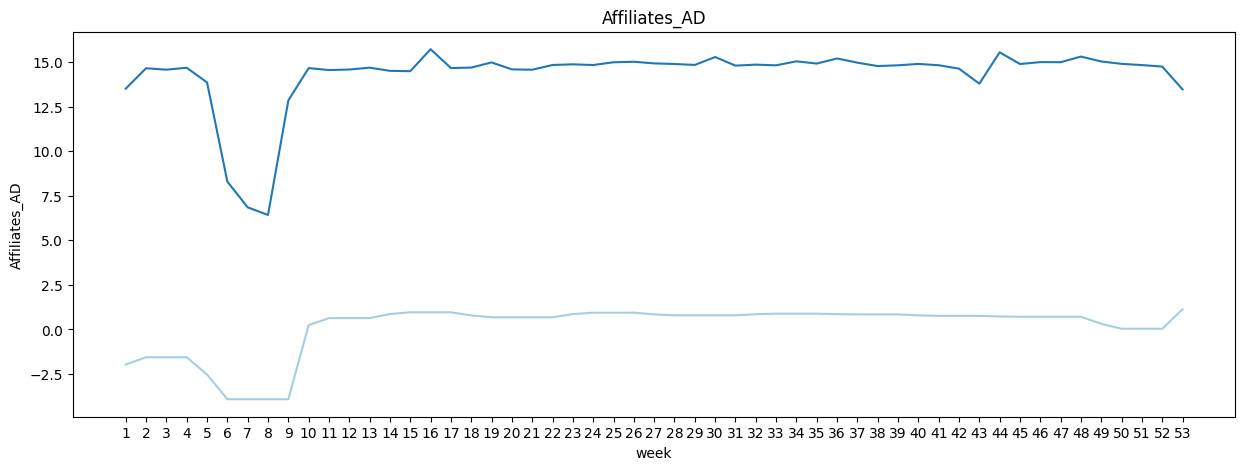

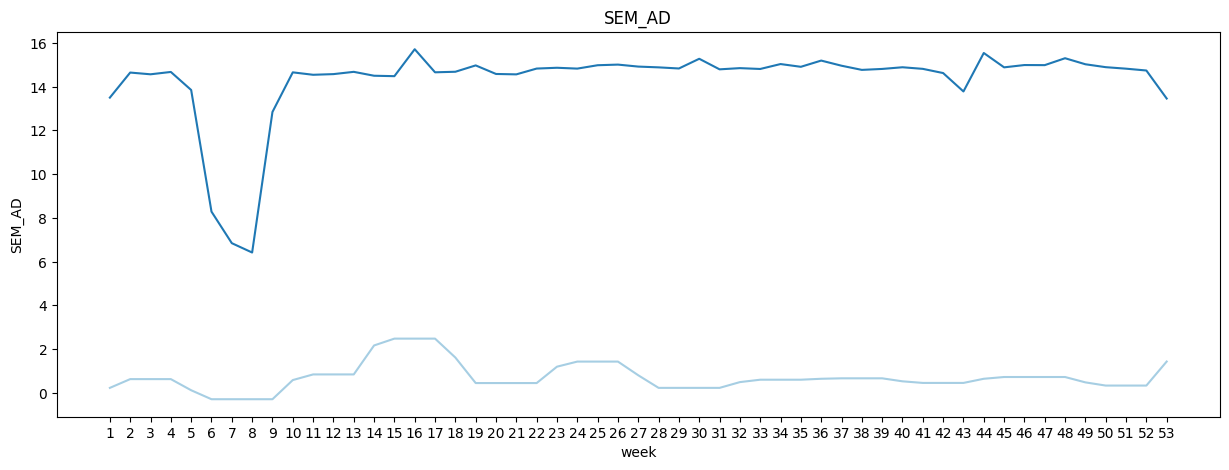

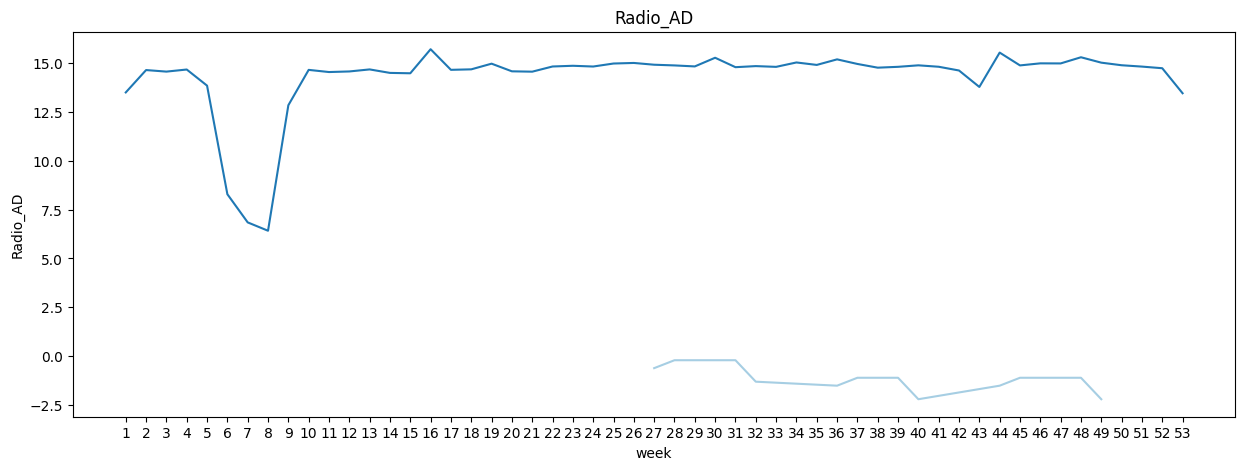

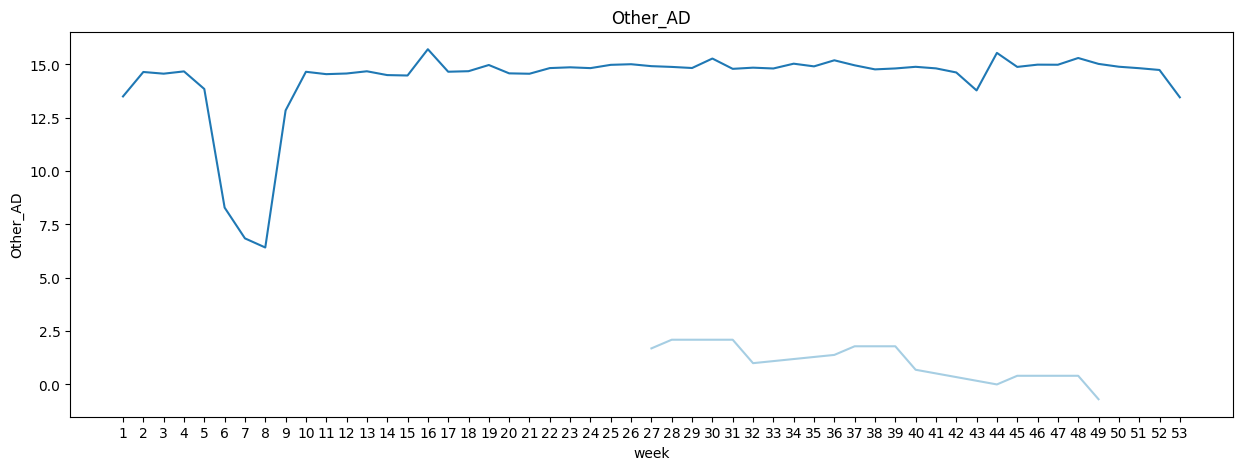

In [203]:
markinv = ['Total_Investment_AD', 'TV_AD','Digital_AD', 'Content_Marketing_AD', 'Online_marketing_AD','Affiliates_AD', 'SEM_AD', 'Radio_AD', 'Other_AD','gmv']

# average_sale_per_week
# plt.figure(figsize=(25, 19))
x=1
for i in markinv:
  if i != 'gmv':
    # plt.subplot(9,1,x)
    plt.figure(figsize=(15, 5))
    plt.title(i)
    sns.lineplot(x=game_wk['week'],y=nm.log(game_wk[i]))
    sns.lineplot(x=game_wk['week'],y=nm.log(game_wk['gmv']))
    plt.xticks(game_wk['week'])
    x=x+1
    plt.show()

## affiliates , digital and other and total


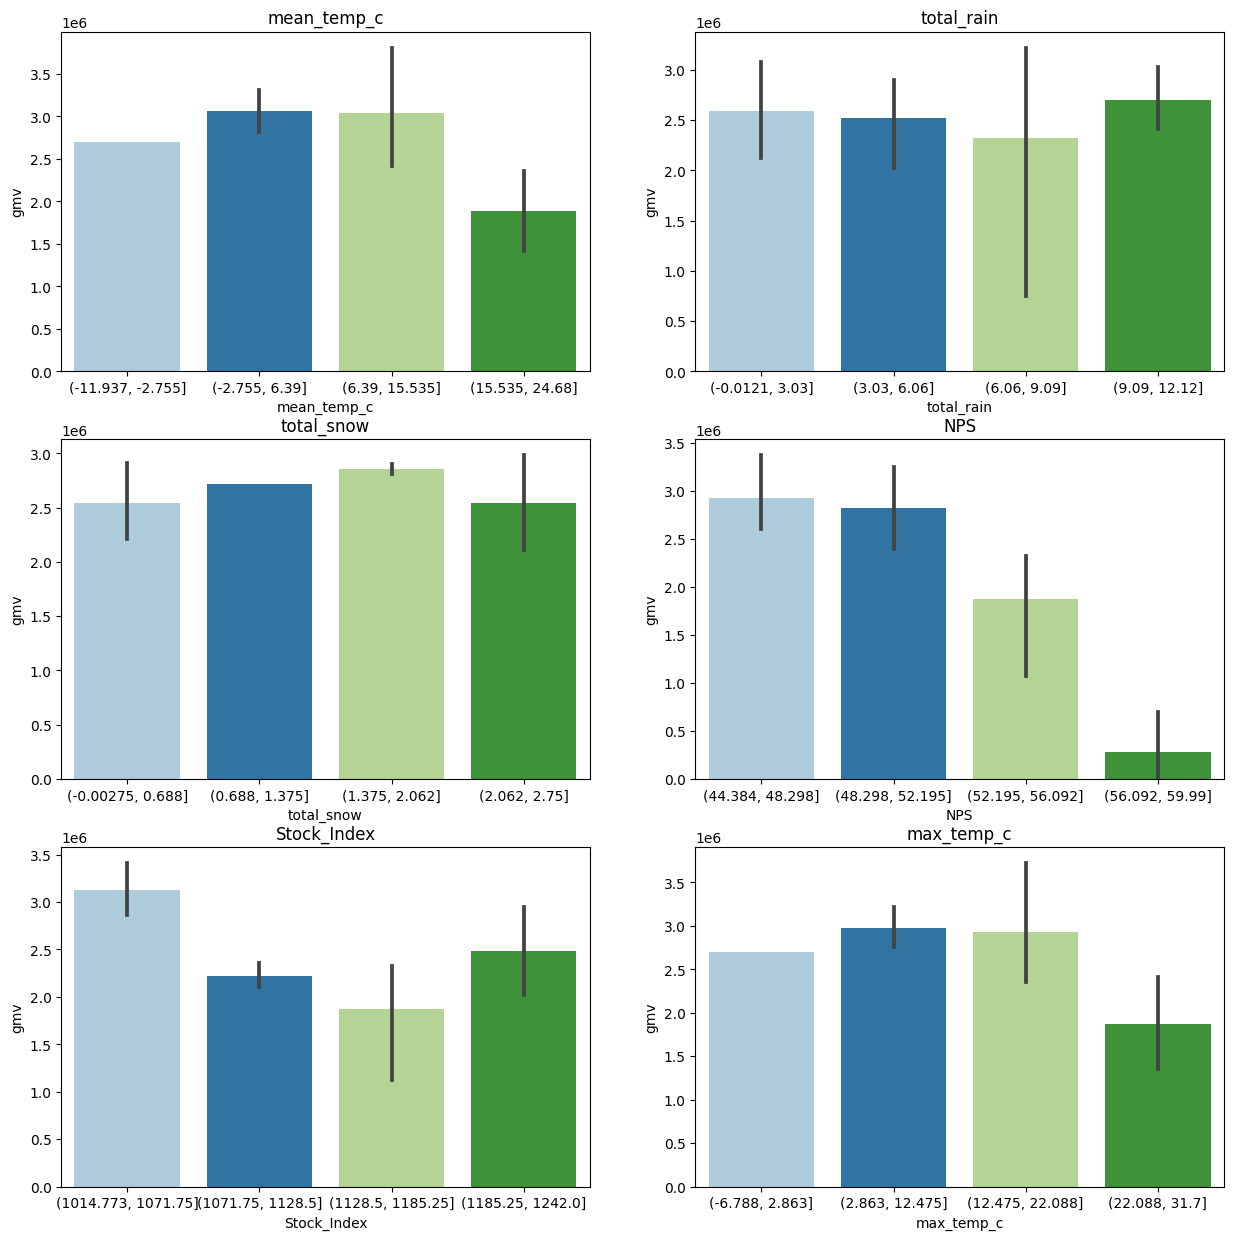

In [204]:
wc = ['mean_temp_c', 'total_rain', 'total_snow','NPS',"Stock_Index",'max_temp_c']

plt.figure(figsize=(15, 15))
x=1
for i in wc:
  plt.subplot(3,2,x)
  plt.title(i)
  sns.barplot(y=game_wk['gmv'],x=pd.cut(game_wk[i],bins=4))
  x=x+1

  ## max temp can be kept


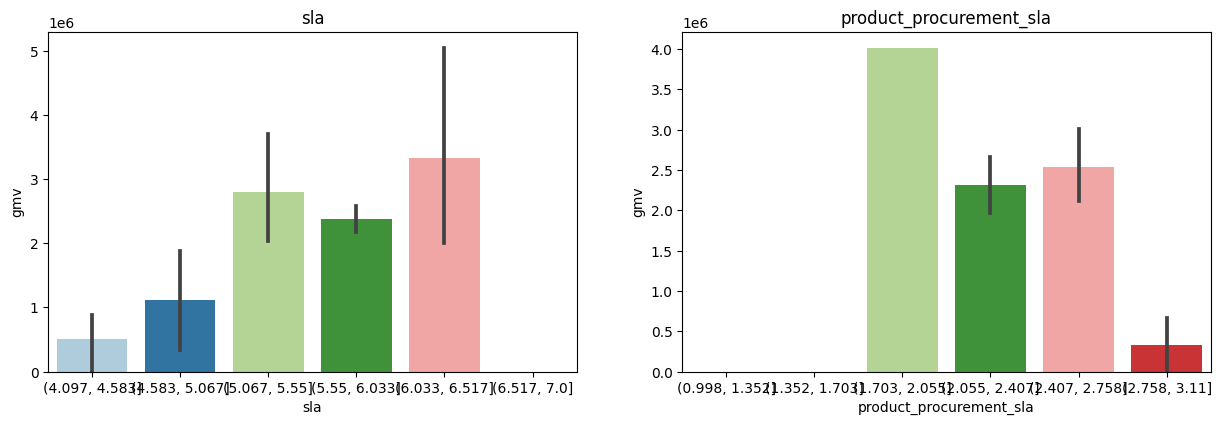

In [449]:
wc = ['sla','product_procurement_sla']

plt.figure(figsize=(15, 15))
x=1
for i in wc:
  plt.subplot(3,2,x)
  plt.title(i)
  sns.barplot(y=game_wk['gmv'],x=pd.cut(game_wk[i],bins=6))
  x=x+1

## sla not required

In [1366]:
game_wk.drop(['order_count','units','Other_AD','product_mrp','sla','total_snow','total_rain','cool_deg_c','max_temp_c','Other_AD','Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing',
       'Online marketing', 'Affiliates', 'SEM', 'Radio', 'Other','week'],1,inplace=True)
game_wk.columns

Index(['gmv', 'product_procurement_sla', 'listing_price', 'discount_per',
       'Stock_Index', 'NPS', 'pay_day_in_wk', 'Holiday_flag', 'mean_temp_c',
       'Total_Investment_AD', 'TV_AD', 'Digital_AD', 'Content_Marketing_AD',
       'Sponsorship_AD', 'Online_marketing_AD', 'Affiliates_AD', 'SEM_AD',
       'Radio_AD', 'cod_per', 'sales_per'],
      dtype='object')

In [1367]:
game_wk.drop('Total_Investment_AD',1,inplace=True)

In [1384]:
df_train, df_test = train_test_split(game_wk, train_size = 0.7, test_size = 0.3, random_state = 100)

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

scale_var=camera.columns
df_train[df_train.columns]=scaler.fit_transform(df_train[df_train.columns])
# df_train
X_train=df_train.drop('gmv',1)
y_train=df_train['gmv']


In [1401]:
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=12, step=1)
selector.fit(X_train, y_train)


RFE(estimator=SVR(kernel='linear'), n_features_to_select=12)

In [1402]:
df=pd.DataFrame(list(zip(X_train.columns,selector.support_,selector.ranking_)))
features =X_train.columns[selector.support_]
features


Index(['listing_price', 'discount_per', 'Stock_Index', 'NPS', 'pay_day_in_wk',
       'mean_temp_c', 'TV_AD', 'Online_marketing_AD', 'Affiliates_AD',
       'SEM_AD', 'Radio_AD', 'cod_per'],
      dtype='object')

In [1403]:
x_train_m =build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.206e+04
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           1.29e-51
Time:                        12:00:15   Log-Likelihood:                 206.16
No. Observations:                  37   AIC:                            -386.3
Df Residuals:                      24   BIC:                            -365.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0018    

Features      VIF
8         Affiliates_AD  1886.21
7   Online_marketing_AD  1531.42
0         listing_price    97.66
1          discount_per    64.83
6                 TV_AD    39.39
2           Stock_Index    19.86
11              cod_per    15.85
5           mean_temp_c    15.24
9                SEM_AD    13.52
3                   NPS     8.36
10             Radio_AD     2.94
4         pay_day_in_wk     2.59

In [1404]:
features=features.drop('listing_price',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     42.25
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           2.26e-13
Time:                        12:00:20   Log-Likelihood:                 67.095
No. Observations:                  37   AIC:                            -110.2
Df Residuals:                      25   BIC:                            -90.86
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3538    

Features      VIF
7         Affiliates_AD  1875.16
6   Online_marketing_AD  1528.35
5                 TV_AD    39.39
1           Stock_Index    19.82
10              cod_per    15.67
8                SEM_AD    13.30
4           mean_temp_c    12.26
2                   NPS     8.29
0          discount_per     5.75
9              Radio_AD     2.63
3         pay_day_in_wk     2.54

In [1405]:
features=features.drop('mean_temp_c',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     48.34
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           3.13e-14
Time:                        12:00:32   Log-Likelihood:                 67.095
No. Observations:                  37   AIC:                            -112.2
Df Residuals:                      26   BIC:                            -94.47
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3544    

Features      VIF
6        Affiliates_AD  1534.78
5  Online_marketing_AD  1299.97
4                TV_AD    32.04
1          Stock_Index    14.52
7               SEM_AD    11.83
2                  NPS     8.27
9              cod_per     7.76
0         discount_per     5.73
3        pay_day_in_wk     2.53
8             Radio_AD     2.25

In [1406]:
features=features.drop('pay_day_in_wk',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     55.66
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           4.14e-15
Time:                        12:00:39   Log-Likelihood:                 67.057
No. Observations:                  37   AIC:                            -114.1
Df Residuals:                      27   BIC:                            -98.01
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3467    

Features      VIF
5        Affiliates_AD  1529.19
4  Online_marketing_AD  1295.19
3                TV_AD    31.80
1          Stock_Index    14.03
6               SEM_AD    11.63
2                  NPS     8.27
8              cod_per     7.72
0         discount_per     5.52
7             Radio_AD     2.25

In [1407]:
features=features.drop('Radio_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     59.03
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           1.71e-15
Time:                        12:00:56   Log-Likelihood:                 65.389
No. Observations:                  37   AIC:                            -112.8
Df Residuals:                      28   BIC:                            -98.28
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3203    

Features      VIF
5        Affiliates_AD  1518.35
4  Online_marketing_AD  1294.86
3                TV_AD    30.15
1          Stock_Index    12.20
6               SEM_AD    11.51
2                  NPS     7.86
7              cod_per     7.72
0         discount_per     5.46

In [1408]:
features=features.drop('TV_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     66.96
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           3.49e-16
Time:                        12:01:07   Log-Likelihood:                 64.645
No. Observations:                  37   AIC:                            -113.3
Df Residuals:                      29   BIC:                            -100.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3203    

Features     VIF
3  Online_marketing_AD  667.84
4        Affiliates_AD  590.20
6              cod_per    7.18
1          Stock_Index    6.12
2                  NPS    5.76
0         discount_per    5.27
5               SEM_AD    4.36

In [1409]:
features=features.drop('Stock_Index',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     80.73
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           3.74e-17
Time:                        12:01:19   Log-Likelihood:                 64.627
No. Observations:                  37   AIC:                            -115.3
Df Residuals:                      30   BIC:                            -104.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3150    

Features     VIF
2  Online_marketing_AD  667.47
3        Affiliates_AD  590.16
5              cod_per    6.98
0         discount_per    5.21
4               SEM_AD    4.01
1                  NPS    3.09

In [1410]:
features=features.drop('Online_marketing_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     95.68
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           6.78e-18
Time:                        12:01:28   Log-Likelihood:                 63.840
No. Observations:                  37   AIC:                            -115.7
Df Residuals:                      31   BIC:                            -106.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2848      0.083      3.429

Features   VIF
2  Affiliates_AD  6.07
4        cod_per  6.02
0   discount_per  5.11
1            NPS  2.34
3         SEM_AD  2.10

In [1411]:
features=features.drop('cod_per',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     110.5
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           2.96e-18
Time:                        12:01:41   Log-Likelihood:                 61.924
No. Observations:                  37   AIC:                            -113.8
Df Residuals:                      32   BIC:                            -105.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1607      0.050      3.200

Features   VIF
2  Affiliates_AD  5.23
0   discount_per  4.85
3         SEM_AD  1.99
1            NPS  1.45

In [1412]:
features=features.drop('Affiliates_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     151.4
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           2.31e-19
Time:                        12:01:53   Log-Likelihood:                 61.863
No. Observations:                  37   AIC:                            -115.7
Df Residuals:                      33   BIC:                            -109.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1470      0.027      5.514   

Features   VIF
0  discount_per  2.28
2        SEM_AD  1.75
1           NPS  1.41

                                 OLS Regression Results                                
Dep. Variable:                    gmv   R-squared (uncentered):                   0.978
Model:                            OLS   Adj. R-squared (uncentered):              0.976
Method:                 Least Squares   F-statistic:                              494.7
Date:                Sun, 08 Oct 2023   Prob (F-statistic):                    4.23e-28
Time:                        12:02:03   Log-Likelihood:                          49.781
No. Observations:                  37   AIC:                                     -93.56
Df Residuals:                      34   BIC:                                     -88.73
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

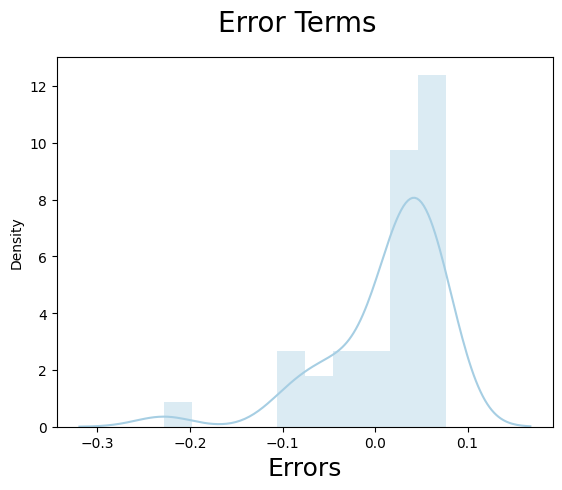

Text(0, 0.5, 'y_pred')

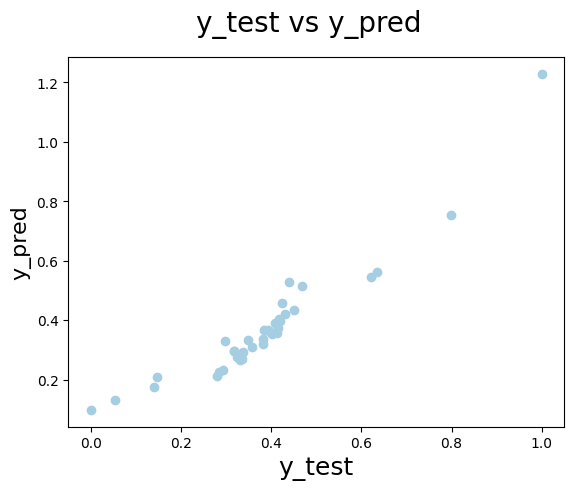

In [1413]:
lm = sm.OLS(y_train,X_train[features]).fit() # fitting the model
print(lm.summary()) # model summary
y_train_pred=lm.predict(X_train[features])

fig=plt.figure()
sns.distplot((y_train-y_train_pred),bins=10)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()

# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_train ,y_train_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)


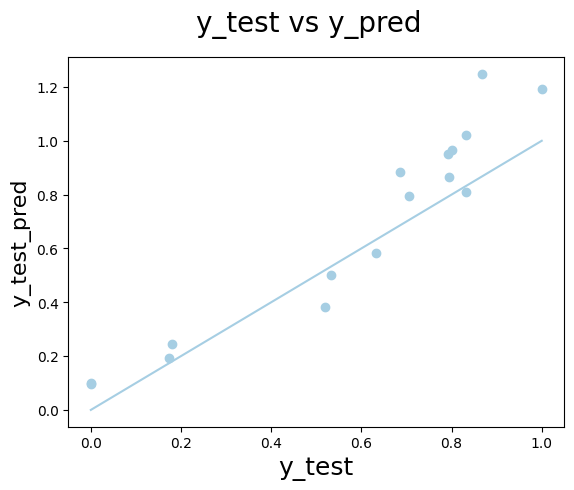

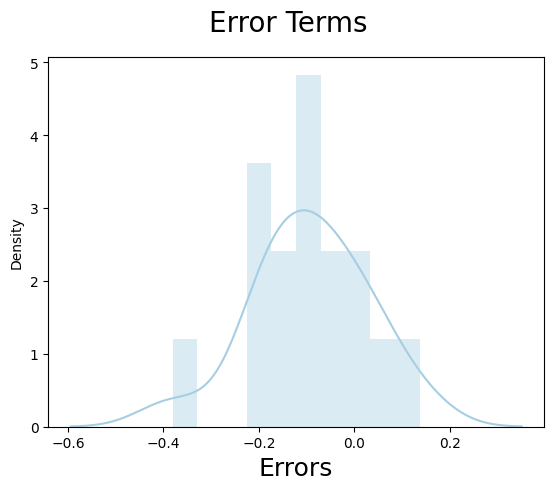

In [1414]:
df_test[df_train.columns]=scaler.fit_transform(df_test[df_train.columns])
X_test=df_test.drop('gmv',1)
y_test=df_test['gmv']
X_test=sm.add_constant(X_test)
X_test=X_test[features]
y_test_pred=lm.predict(X_test)

# Plotting y_test and y_pred to understand the spread

fig,ax = plt.subplots()
ax.scatter(y_test, y_test_pred )
fig.suptitle('y_test vs y_pred', fontsize = 20)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])#,  lw=1)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

fig=plt.figure()
sns.distplot((y_test-y_test_pred),bins=10)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()


In [868]:
y_test

25    0.977657
48    0.977780
52    0.787750
37    0.944480
6     0.000000
18    0.972042
20    0.923593
46    0.971950
5     0.161661
31    0.957890
33    0.982869
45    0.973270
35    1.000000
32    0.954202
0     0.793126
11    0.920668
Name: gmv, dtype: float64

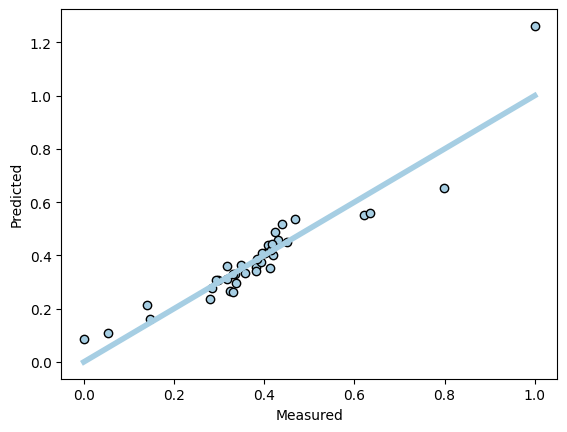

In [1415]:
f = KFold(n_splits = 10, shuffle = True, random_state = 100)
lm=LinearRegression()
scores = cross_val_score(lm, X_train[features], y_train, scoring='r2', cv=f)
scores
y_pred = cross_val_predict(lm, X_train[features], y_train, cv=f)



fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],  lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [ ]:
# game_wk=game.groupby(['week']).agg({"order_item_id":"nunique",'gmv':'sum','units':'sum','order_payment_type':'sum','sla':'mean',
#                                         'product_mrp':'sum','product_procurement_sla':'mean','listing_price':'sum',
#                                          'discount_per':'sum','Stock_Index':'max','NPS':'max','pay_date_flag':'max',
#                                           "Holiday_flag": "nunique",'sale_date':"nunique"}).round(2)

# game_wk=pd.merge(game_wk,weekly_kpis,on='week')

# game_wk.rename(columns={"sales_date":"num_of_sales"},inplace=True)

# game_wk.drop(['heat_deg_c','mon_temp_c','Year','Month','Day','Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing',
#        'Online marketing', 'Affiliates', 'SEM', 'Radio', 'Other'],1,inplace=True)

# game_wk.order_payment_type.value_counts()
# game_wk.rename(columns={'order_item_id':'order_count',"order_payment_type":"order_payment_cod",'mon_temp_c':"min_temp_c","pay_date_flag":"pay_day_in_wk"},inplace=True)
# game_wk["cod_per"]=game_wk["order_payment_cod"]/game_wk["order_count"]
# game_wk.drop("order_payment_cod",1,inplace=True)
# game_wk.rename(columns={'sale_date':"num_of_sales"},inplace=True)

# game_wk['sales_per']=(game_wk['num_of_sales']-1)/7
# game_wk.drop('num_of_sales',1,inplace=True)
# game_wk.drop(['order_count','units','Other_AD','product_mrp'],1,inplace=True)

In [1416]:
# multiplicative
game_wk[game_wk.columns]=nm.log(game_wk[game_wk.columns])


In [1417]:

game_wk=game_wk.replace([nm.inf, -nm.inf], 0)
game_wk=game_wk.fillna(0)



In [1441]:
df_train, df_test = train_test_split(game_wk, train_size = 0.7, test_size = 0.3, random_state = 100)
scaler=MinMaxScaler()

scale_var=camera.columns
df_train[df_train.columns]=scaler.fit_transform(df_train[df_train.columns])
# df_train
X_train=df_train.drop('gmv',1)
y_train=df_train['gmv']
# X_train


In [1464]:
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=12, step=1)
selector.fit(X_train, y_train)
df=pd.DataFrame(list(zip(X_train.columns,selector.support_,selector.ranking_)))
features =X_train.columns[selector.support_]
features


Index(['product_procurement_sla', 'listing_price', 'discount_per', 'NPS',
       'TV_AD', 'Digital_AD', 'Sponsorship_AD', 'Online_marketing_AD',
       'Affiliates_AD', 'SEM_AD', 'cod_per', 'sales_per'],
      dtype='object')

In [1465]:
x_train_m =build_model(X_train[features],y_train)
checkVIF(X_train[features])



                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.869e+05
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           2.25e-60
Time:                        12:12:29   Log-Likelihood:                 242.18
No. Observations:                  37   AIC:                            -458.4
Df Residuals:                      24   BIC:                            -437.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features       VIF
7       Online_marketing_AD  45444.97
8             Affiliates_AD  41090.44
2              discount_per   2624.34
1             listing_price   2334.05
9                    SEM_AD    138.08
5                Digital_AD    115.34
6            Sponsorship_AD     64.22
10                  cod_per     33.32
4                     TV_AD     25.91
11                sales_per     16.26
3                       NPS     10.49
0   product_procurement_sla      8.87

In [1466]:
features=features.drop('listing_price',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     155.4
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           3.62e-20
Time:                        12:12:36   Log-Likelihood:                 95.411
No. Observations:                  37   AIC:                            -166.8
Df Residuals:                      25   BIC:                            -147.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features       VIF
6       Online_marketing_AD  44431.13
7             Affiliates_AD  40420.39
8                    SEM_AD    135.03
4                Digital_AD    112.17
1              discount_per    106.61
5            Sponsorship_AD     60.22
9                   cod_per     33.29
3                     TV_AD     25.05
10                sales_per     15.27
2                       NPS     10.32
0   product_procurement_sla      8.79

In [1467]:
features=features.drop('cod_per',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     177.7
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           2.62e-21
Time:                        12:12:43   Log-Likelihood:                 95.409
No. Observations:                  37   AIC:                            -168.8
Df Residuals:                      26   BIC:                            -151.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features       VIF
6      Online_marketing_AD  20121.49
7            Affiliates_AD  17906.68
1             discount_per     93.94
8                   SEM_AD     78.66
4               Digital_AD     60.20
5           Sponsorship_AD     39.36
3                    TV_AD     24.53
9                sales_per     15.19
2                      NPS     10.11
0  product_procurement_sla      8.62

In [1468]:
features=features.drop('sales_per',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     195.8
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           3.26e-22
Time:                        12:12:55   Log-Likelihood:                 94.563
No. Observations:                  37   AIC:                            -169.1
Df Residuals:                      27   BIC:                            -153.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features       VIF
6      Online_marketing_AD  18395.05
7            Affiliates_AD  16583.58
1             discount_per     89.57
8                   SEM_AD     76.70
4               Digital_AD     57.91
5           Sponsorship_AD     39.36
3                    TV_AD     24.37
0  product_procurement_sla      8.62
2                      NPS      7.77

In [1469]:
features=features.drop('NPS',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     227.8
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           2.15e-23
Time:                        12:13:09   Log-Likelihood:                 94.514
No. Observations:                  37   AIC:                            -171.0
Df Residuals:                      28   BIC:                            -156.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features       VIF
5      Online_marketing_AD  18394.25
6            Affiliates_AD  16556.61
7                   SEM_AD     63.82
1             discount_per     61.19
3               Digital_AD     52.56
4           Sponsorship_AD     39.36
2                    TV_AD     21.86
0  product_procurement_sla      8.23

In [1470]:
features=features.drop('TV_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     268.4
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           1.34e-24
Time:                        12:13:18   Log-Likelihood:                 94.429
No. Observations:                  37   AIC:                            -172.9
Df Residuals:                      29   BIC:                            -160.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features       VIF
4      Online_marketing_AD  17841.62
5            Affiliates_AD  16325.41
6                   SEM_AD     54.98
1             discount_per     49.24
2               Digital_AD     43.96
3           Sponsorship_AD     38.12
0  product_procurement_sla      7.21

In [1471]:
features=features.drop('SEM_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     315.4
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           1.05e-25
Time:                        12:13:25   Log-Likelihood:                 93.945
No. Observations:                  37   AIC:                            -173.9
Df Residuals:                      30   BIC:                            -162.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features      VIF
4      Online_marketing_AD  8111.92
5            Affiliates_AD  8064.38
1             discount_per    34.39
3           Sponsorship_AD    34.20
2               Digital_AD     8.16
0  product_procurement_sla     6.99

In [1472]:
features=features.drop('Digital_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     384.2
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           6.55e-27
Time:                        12:13:34   Log-Likelihood:                 93.620
No. Observations:                  37   AIC:                            -175.2
Df Residuals:                      31   BIC:                            -165.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features      VIF
3      Online_marketing_AD  8077.77
4            Affiliates_AD  7976.13
1             discount_per    33.39
2           Sponsorship_AD    15.93
0  product_procurement_sla     6.22

In [1473]:
features=features.drop('Affiliates_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     485.4
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           3.82e-28
Time:                        12:13:42   Log-Likelihood:                 93.235
No. Observations:                  37   AIC:                            -176.5
Df Residuals:                      32   BIC:                            -168.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
3      Online_marketing_AD  35.03
1             discount_per  32.64
2           Sponsorship_AD  14.31
0  product_procurement_sla   6.22

In [1474]:
features=features.drop('product_procurement_sla',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     656.4
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           1.77e-29
Time:                        12:13:51   Log-Likelihood:                 92.933
No. Observations:                  37   AIC:                            -177.9
Df Residuals:                      33   BIC:                            -171.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0385    

Features    VIF
2  Online_marketing_AD  34.32
0         discount_per  23.61
1       Sponsorship_AD  14.29

In [1475]:
features=features.drop('Sponsorship_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     948.6
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           1.50e-30
Time:                        12:13:57   Log-Likelihood:                 91.714
No. Observations:                  37   AIC:                            -177.4
Df Residuals:                      34   BIC:                            -172.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0404    

Features    VIF
0         discount_per  23.48
1  Online_marketing_AD  23.48

                                 OLS Regression Results                                
Dep. Variable:                    gmv   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          2.910e+04
Date:                Sun, 08 Oct 2023   Prob (F-statistic):                    4.27e-57
Time:                        12:14:09   Log-Likelihood:                          89.514
No. Observations:                  37   AIC:                                     -175.0
Df Residuals:                      35   BIC:                                     -171.8
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

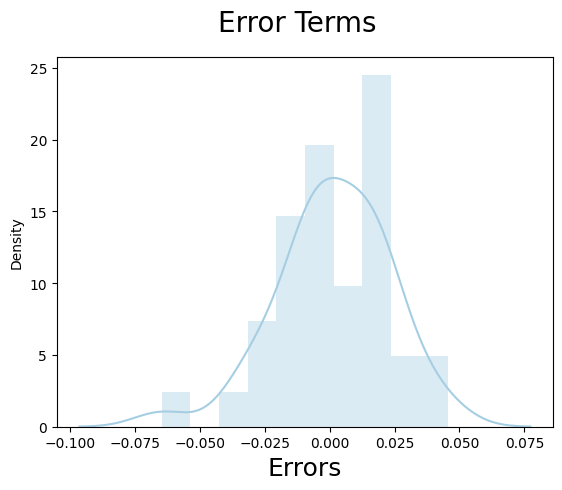

Text(0, 0.5, 'y_pred')

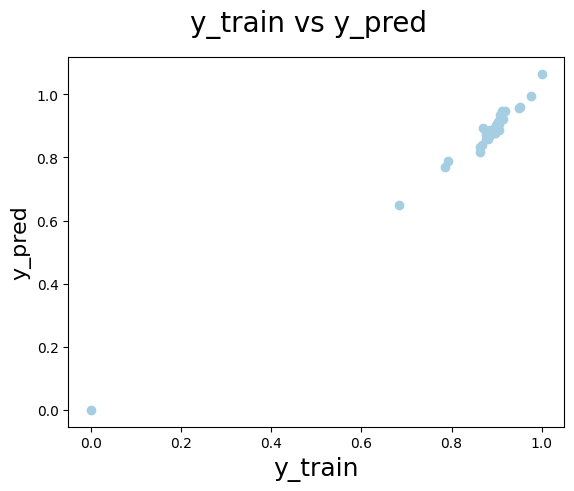

In [1476]:
lm = sm.OLS(y_train,X_train[features]).fit() # fitting the model
print(lm.summary()) # model summary
y_train_pred=lm.predict(X_train[features])

fig=plt.figure()
sns.distplot((y_train-y_train_pred),bins=10)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()

# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_train ,y_train_pred)
fig.suptitle('y_train vs y_pred', fontsize = 20)
# Plot heading
plt.xlabel('y_train', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)


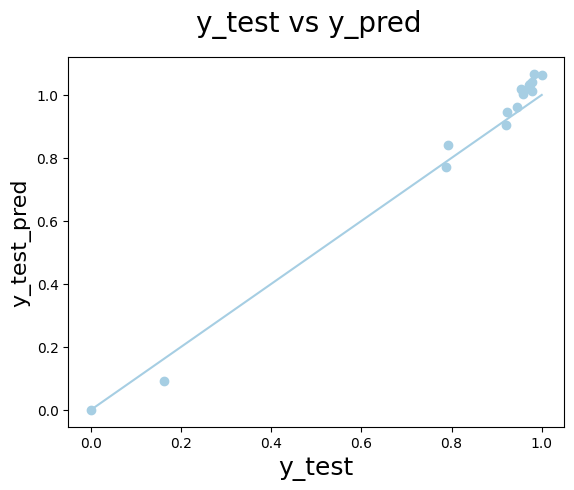

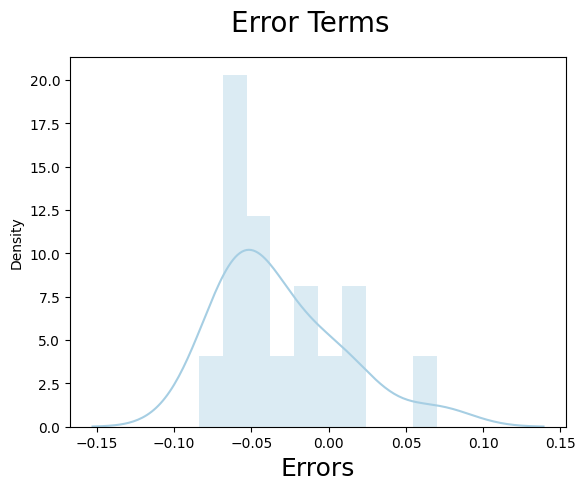

In [1478]:
df_test[df_train.columns]=scaler.fit_transform(df_test[df_train.columns])
X_test=df_test.drop('gmv',1)
y_test=df_test['gmv']
X_test=sm.add_constant(X_test)
X_test=X_test[features]
y_test_pred=lm.predict(X_test)

# Plotting y_test and y_pred to understand the spread

fig,ax = plt.subplots()
ax.scatter(y_test, y_test_pred )
fig.suptitle('y_test vs y_pred', fontsize = 20)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])#,  lw=1)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

fig=plt.figure()
sns.distplot((y_test-y_test_pred),bins=10)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()



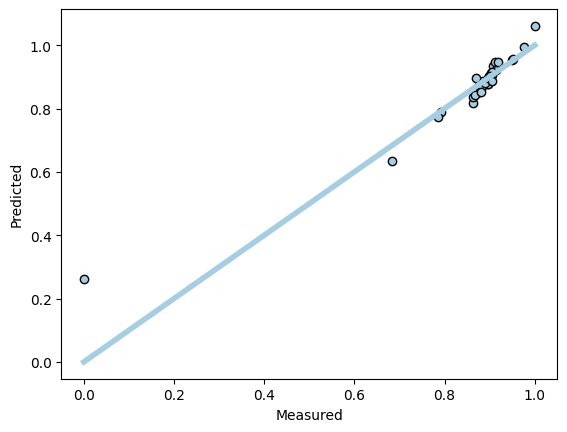

In [1479]:
f = KFold(n_splits = 10, shuffle = True, random_state = 100)
lm=LinearRegression()
scores = cross_val_score(lm, X_train[features], y_train, scoring='r2', cv=f)
scores
y_pred = cross_val_predict(lm, X_train[features], y_train, cv=f)



fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],  lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()